<h1 style="color: green;">Summary</h1>
There are several objectives of exploratory data analysis:<br>
<ol>
<li>Tell the data story i.e. what useful information we can extract<br>from the data baring in mind
       statistical assumptions about the data</li><br>
<li>Find what's wrong with the data so that we can fix it later.</li>
</ol>  
<p style="color: black;">
In this section the following are accomplished:
<ul>
<li>Separate features into numeric and categorical</li>
<li>Perform exploratory data analysis</li>
<li>Explore interesting relationships between the target and the features</li>
</ul>
All of this is done with the raw data extracted in <b>Data Extraction</b>
</p>


<h1 style="color: green;">Import libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# for Q-Q plots
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green;">Setting seaborn colour palette</h1>

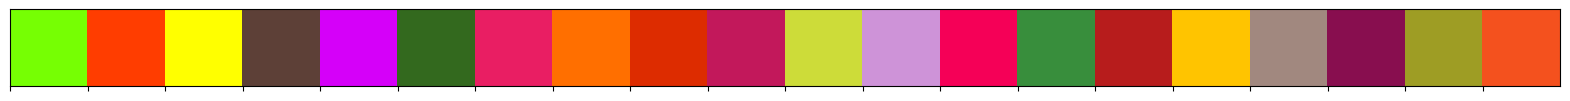

In [2]:
palette = ['#76FF03','#FF3D00','#FFFF00','#5D4037','#D500F9','#33691E','#E91E63','#FF6F00','#DD2C00','#C2185B',
           '#CDDC39','#CE93D8','#F50057','#388E3C','#B71C1C','#FFC400','#A1887F','#880E4F','#9E9D24','#F4511E'
          ]
sb.palplot(palette)
sb.set_palette(palette)

<h1 style="color: green;">Reading data</h1>

In [3]:
raw0 = pd.read_csv("../2. Data/homeshopping.csv")
raw0.head()

Total_Nbr_of_Items  Total_Price         Venue Payment_Type Card_Source  \
0                   1         3.29          eBay         Card          DD   
1                   1        10.89          eBay         Card          DD   
2                   1         2.98          eBay         Card          DD   
3                   1        10.00  Abbey Sports         Card          DB   
4                   1         5.91          eBay         Card          DD   

   Date_diff Week_day_name  Nbr_trips_per_wk  Nbr_items_per_wk  \
0        0.0        Friday                 3                 3   
1        0.0        Friday                 3                 3   
2        0.0        Friday                 3                 3   
3        5.0     Wednesday                 4                 4   
4        1.0      Thursday                 4                 4   

   Nbr_items_wk_perc  ...  Clothes_and_shoes_wk_perc  \
0           0.333333  ...                        0.0   
1           0.333333  ...                        0.0   
2           0.333333  ...                        0.0   
3           0.250000  ...                        0.0   
4           0.250000  ...                        0.0   

   Clothes_and_shoes_exp_receipt  Clothes_and_shoes_exp_wk  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   

   Clothes_and_shoes_wk_exp_perc  House_and_kitchen_receipt  \
0                            0.0                          0   
1                            0.0                          0   
2                            0.0                          0   
3                            0.0                          0   
4                            0.0                          0   

  House_and_kitchen_wk  House_and_kitchen_wk_perc  \
0                    0                        0.0   
1                    0                        0.0   
2                    0                        0.0   
3                    0                        0.0   
4                    0                        0.0   

   House_and_kitchen_exp_receipt  House_and_kitchen_exp_wk  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   

   House_and_kitchen_wk_exp_perc  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  

[5 rows x 156 columns]

<h4 style="color: green;">Drop classifier target</h4>
The regressor target is "Expenditure_per_wk"

In [4]:
raw0.drop(['Trips_response_lt_5'], axis=1, inplace=True)

In [5]:
raw0.Expenditure_per_wk.head()

0    17.16
1    17.16
2    17.16
3    28.69
4    28.69
Name: Expenditure_per_wk, dtype: float64

<h4 style="color: green;">Check for missing values</h4>

In [6]:
sum(raw0.isnull().mean()>0)
# there are no missing values

0

<h4 style="color: green;">Separate numeric and categorical features</h4>

In [7]:
num_feats = [var for var in raw0.columns if raw0[var].dtype != 'O']
cat_feats = [var for var in raw0.columns if raw0[var].dtype == 'O']

In [8]:
len(num_feats)

150

In [9]:
cat_feats

['Venue', 'Payment_Type', 'Card_Source', 'Week_day_name', 'Part_of_day']

<h1 style="color: green;">Exploring numerical features</h1>

In [10]:
raw0[num_feats[:19]].describe()

Total_Nbr_of_Items  Total_Price   Date_diff  Nbr_trips_per_wk  \
count          936.000000   936.000000  936.000000        936.000000   
mean             5.481838    18.360524    1.496795          6.927350   
std              5.625352    73.300073    2.734214          3.578764   
min              1.000000     0.390000    0.000000          1.000000   
25%              1.000000     4.500000    0.000000          5.000000   
50%              3.000000     8.965000    1.000000          6.000000   
75%              9.000000    14.990000    2.000000          9.000000   
max             31.000000  1303.400000   44.000000         18.000000   

       Nbr_items_per_wk  Nbr_items_wk_perc  Expenditure_per_wk  \
count        936.000000         936.000000          936.000000   
mean          33.354701           0.191239          121.979316   
std           13.395914           0.208652          265.985992   
min            1.000000           0.013699            1.600000   
25%           25.000000           0.038462           40.470000   
50%           32.000000           0.100000           65.200000   
75%           42.000000           0.281250          121.950000   
max           73.000000           1.000000         2683.720000   

       Total_Exp_wk_perc  AVG_exp_item_per_wk        hour       Bread  \
count         936.000000           936.000000  936.000000  936.000000   
mean            0.191239             4.735784   13.153846    0.263889   
std             0.194444            14.507078    3.944786    0.497931   
min             0.001118             0.617949    0.000000    0.000000   
25%             0.060391             1.354815   10.000000    0.000000   
50%             0.130568             2.163750   13.000000    0.000000   
75%             0.258492             3.602308   16.000000    0.000000   
max             1.000000           299.495000   23.000000    2.000000   

       Cooked_meats   Raw_meats  Eating_out      Snacks      Drinks  \
count    936.000000  936.000000  936.000000  936.000000  936.000000   
mean       0.261752    0.476496    0.077991    0.715812    0.443376   
std        0.678840    0.868635    0.452334    1.562394    0.827986   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.000000    0.000000    0.000000    0.000000    0.000000   
50%        0.000000    0.000000    0.000000    0.000000    0.000000   
75%        0.000000    1.000000    0.000000    1.000000    1.000000   
max       12.000000    6.000000    7.000000    8.000000    8.000000   

       Vegetables       Fruit  Cooking_base  
count  936.000000  936.000000    936.000000  
mean     1.307692    0.228632      0.132479  
std      2.476280    0.682142      0.520769  
min      0.000000    0.000000      0.000000  
25%      0.000000    0.000000      0.000000  
50%      0.000000    0.000000      0.000000  
75%      1.000000    0.000000      0.000000  
max     13.000000    7.000000      4.000000

In [11]:
# feature lists for plotting
list1 = ['Total_Price','Expenditure_per_wk']

list2 = ['Total_Nbr_of_Items','Date_diff','Nbr_trips_per_wk','Nbr_items_per_wk','AVG_exp_item_per_wk','hour']

list3 = ['Bread','Cooked_meats','Raw_meats','Eating_out','Snacks','Drinks','Vegetables','Fruit','Cooking_base',
         'Dairy_produce','Seasoning','Breakfast','Transport','DIY','Electronics','Education','Tech_and_services',
         'Cosmetics_and_selfcare','Clothes_and_shoes','House_and_kitchen']

list4 = ['Bread_receipt','Cooked_meats_receipt','Raw_meats_receipt','Eating_out_receipt','Snacks_receipt',
         'Drinks_receipt','Vegetables_receipt','Fruit_receipt','Cooking_base_receipt','Dairy_produce_receipt',
         'Seasoning_receipt','Breakfast_receipt','Transport_receipt','DIY_receipt','Electronics_receipt',
         'Education_receipt','Tech_and_services_receipt','Cosmetics_and_selfcare_receipt',
         'Clothes_and_shoes_receipt','House_and_kitchen_receipt']

list5 = ['Bread_wk','Cooked_meats_wk','Raw_meats_wk','Eating_out_wk','Snacks_wk','Drinks_wk','Vegetables_wk',
         'Fruit_wk','Cooking_base_wk','Dairy_produce_wk','Seasoning_wk','Breakfast_wk','Transport_wk','DIY_wk',
         'Electronics_wk','Education_wk','Tech_and_services_wk','Cosmetics_and_selfcare_wk',
         'Clothes_and_shoes_wk','House_and_kitchen_wk']

list6 = ['Bread_wk_perc','Cooked_meats_wk_perc','Raw_meats_wk_perc','Eating_out_wk_perc','Snacks_wk_perc',
         'Drinks_wk_perc','Vegetables_wk_perc','Fruit_wk_perc','Cooking_base_wk_perc','Dairy_produce_wk_perc',
         'Seasoning_wk_perc','Breakfast_wk_perc','Transport_wk_perc','DIY_wk_perc','Electronics_wk_perc',
         'Education_wk_perc','Tech_and_services_wk_perc','Cosmetics_and_selfcare_wk_perc',
         'Clothes_and_shoes_wk_perc','House_and_kitchen_wk_perc','Nbr_items_wk_perc','Total_Exp_wk_perc']

list7 = ['Cooked_meats_exp_receipt','Bread_exp_receipt','Raw_meats_exp_receipt','Eating_out_exp_receipt',
         'Snacks_exp_receipt','Drinks_exp_receipt','Vegetables_exp_receipt','Fruit_exp_receipt',
         'Cooking_base_exp_receipt','Dairy_produce_exp_receipt','Seasoning_exp_receipt','Breakfast_exp_receipt',
         'Transport_exp_receipt','DIY_exp_receipt','Electronics_exp_receipt','Education_exp_receipt',
         'Tech_and_services_exp_receipt','Cosmetics_and_selfcare_exp_receipt','Clothes_and_shoes_exp_receipt',
         'House_and_kitchen_exp_receipt']

list8 = ['Bread_exp_wk','Cooked_meats_exp_wk','Raw_meats_exp_wk','Eating_out_exp_wk','Snacks_exp_wk',
         'Drinks_exp_wk','Vegetables_exp_wk','Fruit_exp_wk','Cooking_base_exp_wk','Dairy_produce_exp_wk',
         'Seasoning_exp_wk','Breakfast_exp_wk','Transport_exp_wk','DIY_exp_wk','Electronics_exp_wk',
         'Education_exp_wk','Tech_and_services_exp_wk','Cosmetics_and_selfcare_exp_wk','Clothes_and_shoes_exp_wk',
         'House_and_kitchen_exp_wk']

list9 = ['Bread_wk_exp_perc','Cooked_meats_wk_exp_perc','Raw_meats_wk_exp_perc','Eating_out_wk_exp_perc',
         'Snacks_wk_exp_perc','Drinks_wk_exp_perc','Vegetables_wk_exp_perc','Fruit_wk_exp_perc',
         'Cooking_base_wk_exp_perc','Dairy_produce_wk_exp_perc','Seasoning_wk_exp_perc','Breakfast_wk_exp_perc',
         'Transport_wk_exp_perc','DIY_wk_exp_perc','Electronics_wk_exp_perc','Education_wk_exp_perc',
         'Tech_and_services_wk_exp_perc','Cosmetics_and_selfcare_wk_exp_perc','Clothes_and_shoes_wk_exp_perc',
         'House_and_kitchen_wk_exp_perc']

<h3 style="color: green;">Plotting the lists</h3>

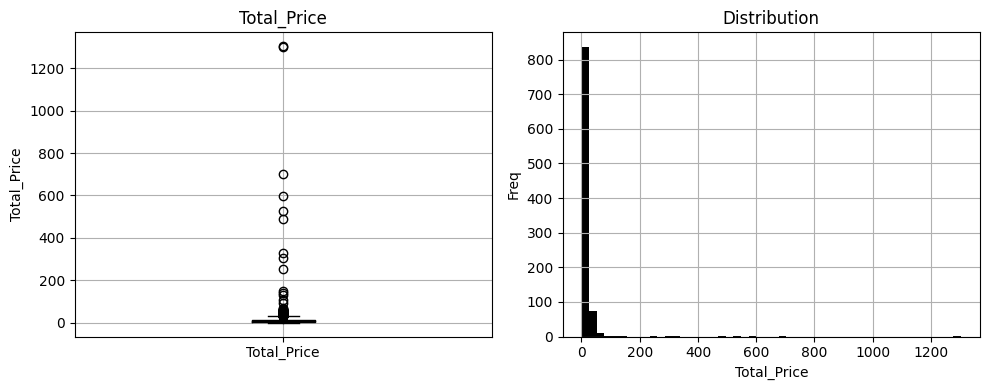

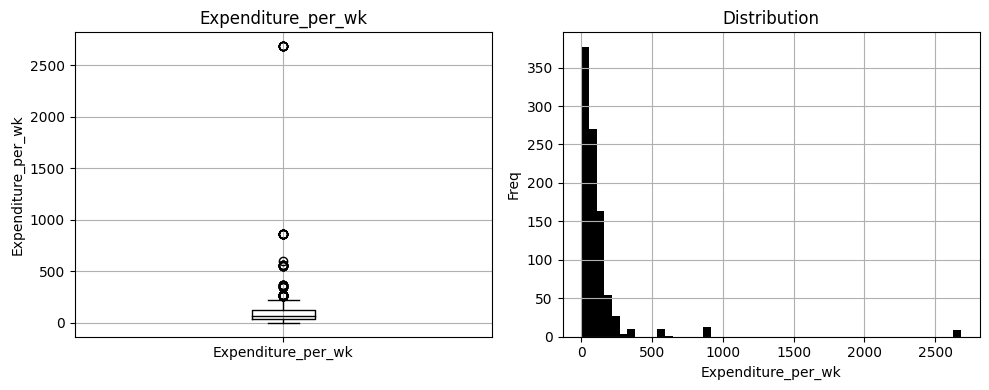

In [12]:
for var in list1:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)    
    
    plt.subplot(1, 2, 2)
    # applying the log scale transformation
    #fig = np.log(raw0[var]).hist(bins=50, color='black')
    fig = raw0[var].hist(bins=50, color='black')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    plt.tight_layout()

    plt.show()

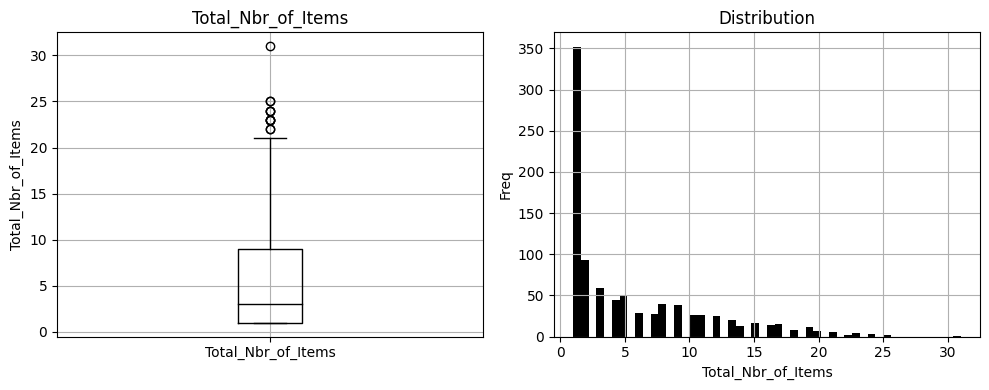

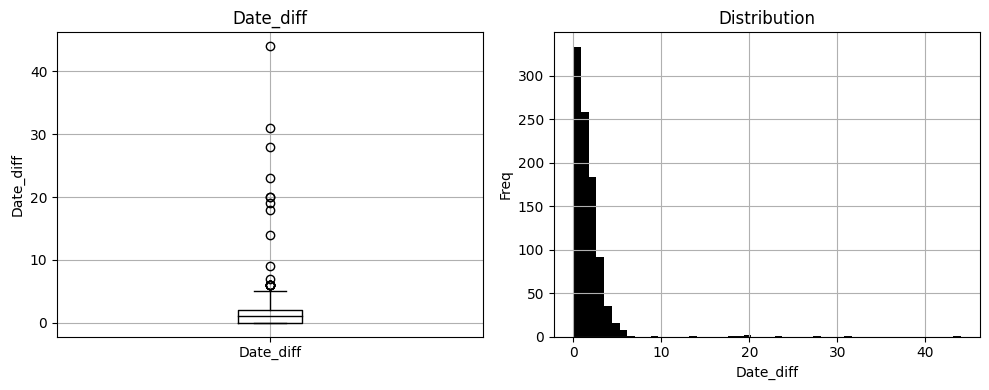

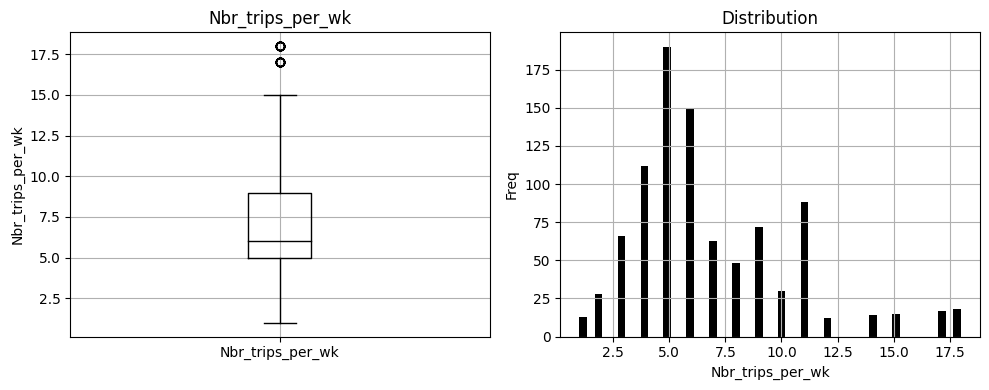

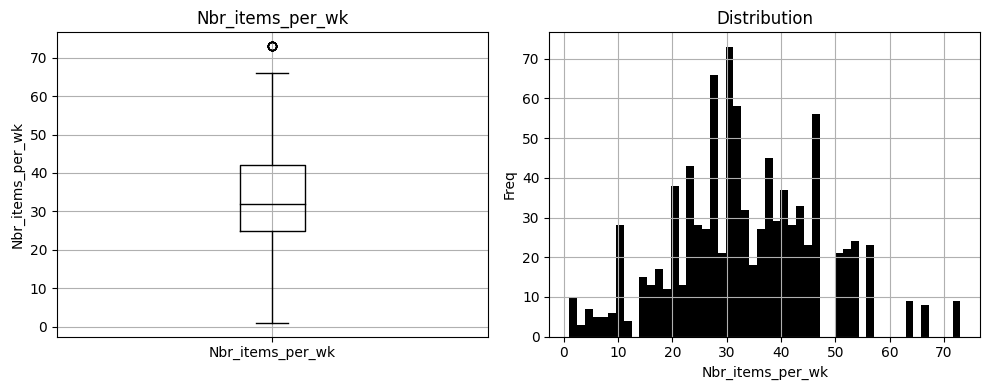

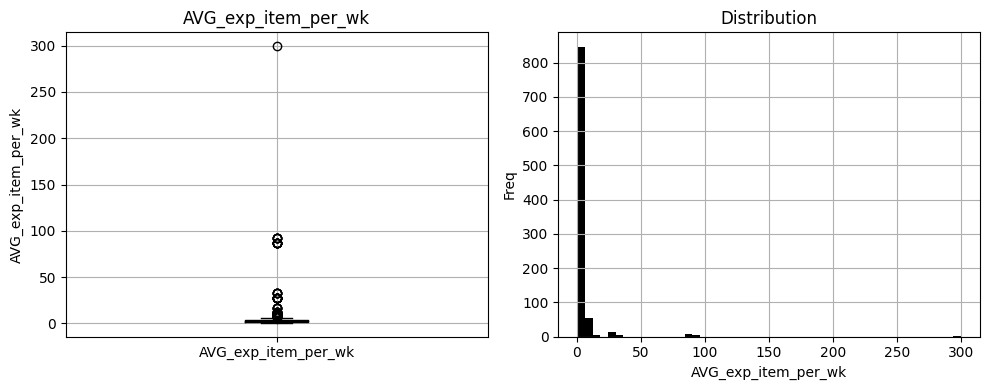

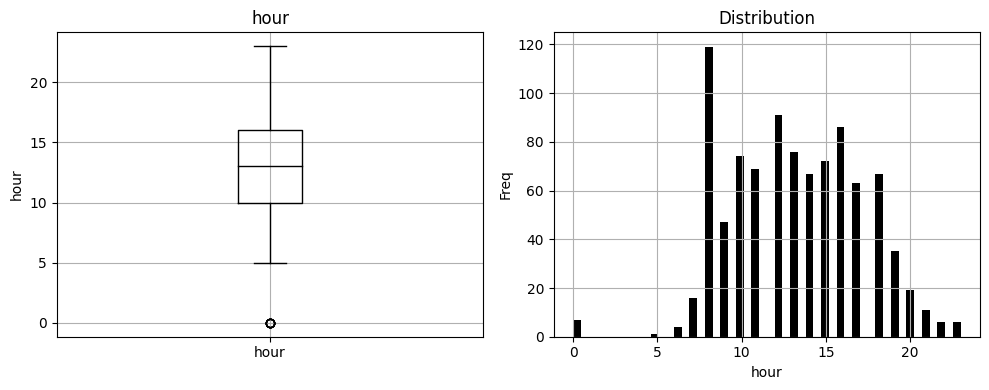

In [13]:
for var in list2:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)
       
    
    plt.subplot(1, 2, 2)
    # applying the log scale transformation
    #fig = np.log(raw0[var]).hist(bins=50, color='black')
    fig = raw0[var].hist(bins=50, color='black')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    
    plt.tight_layout()
    plt.show()

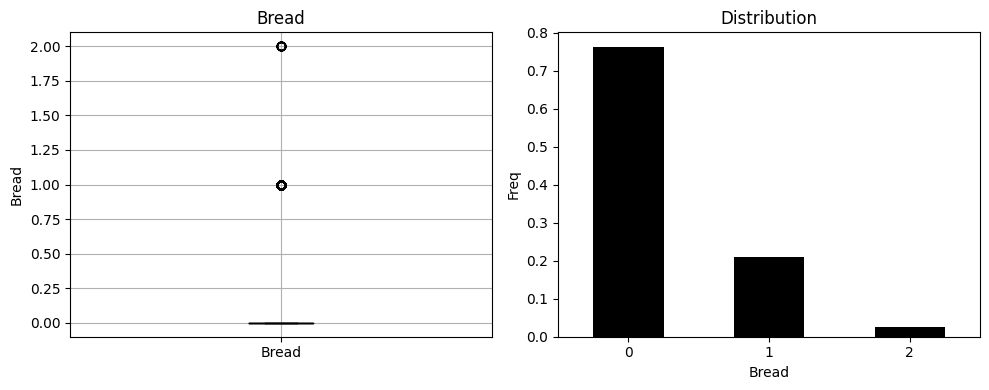

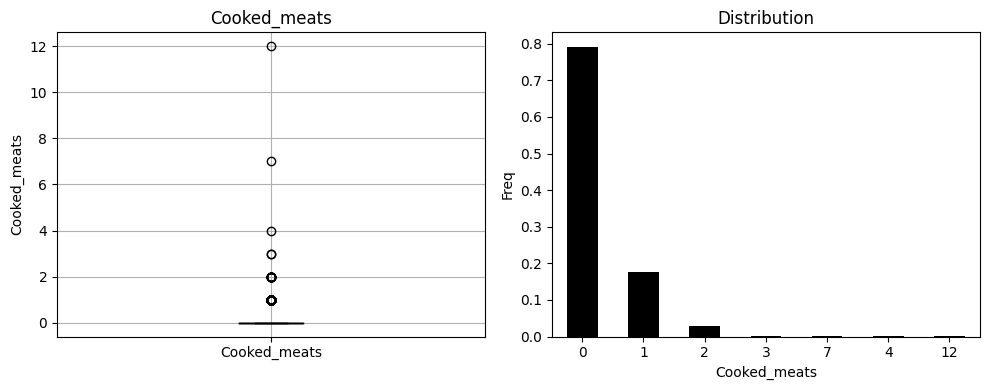

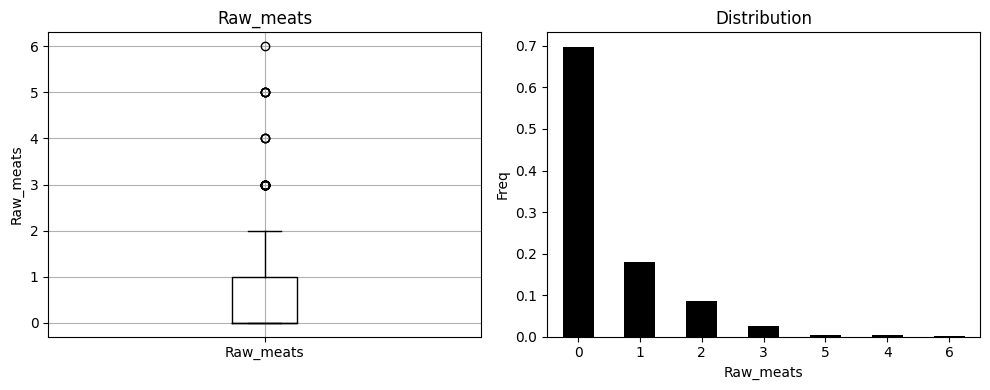

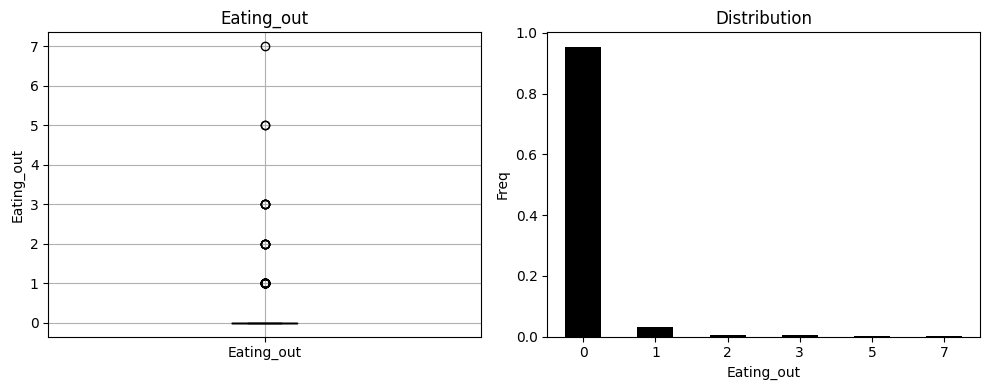

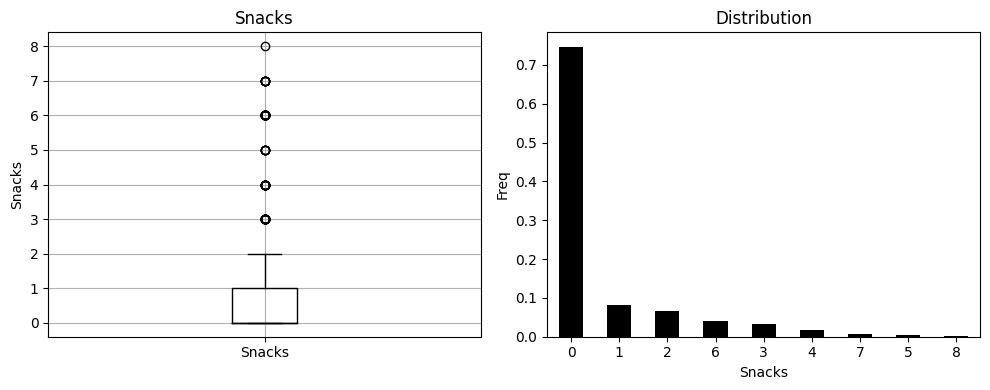

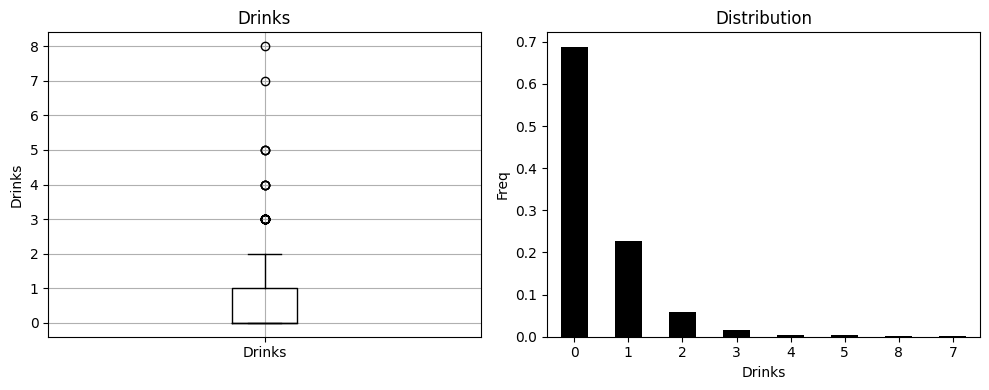

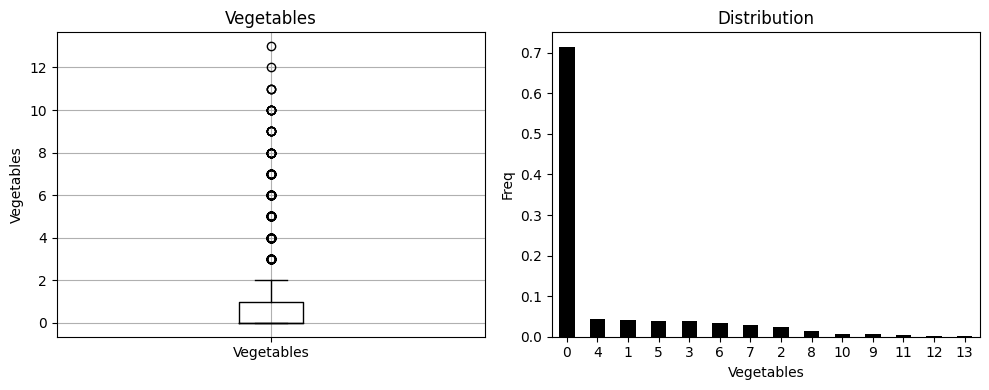

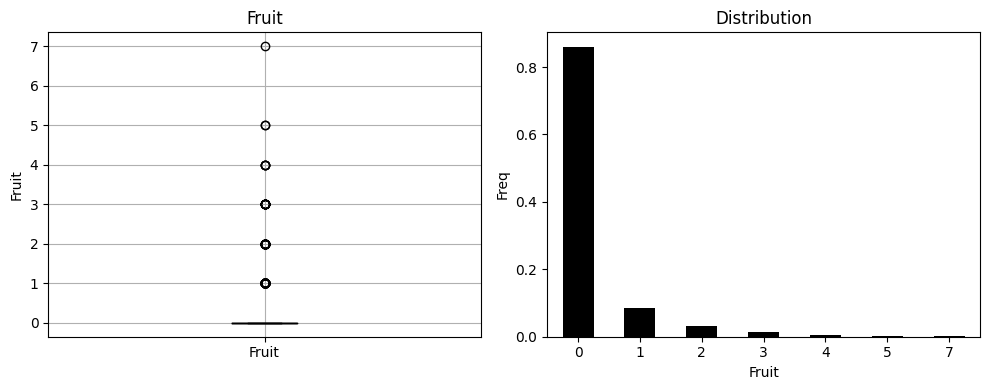

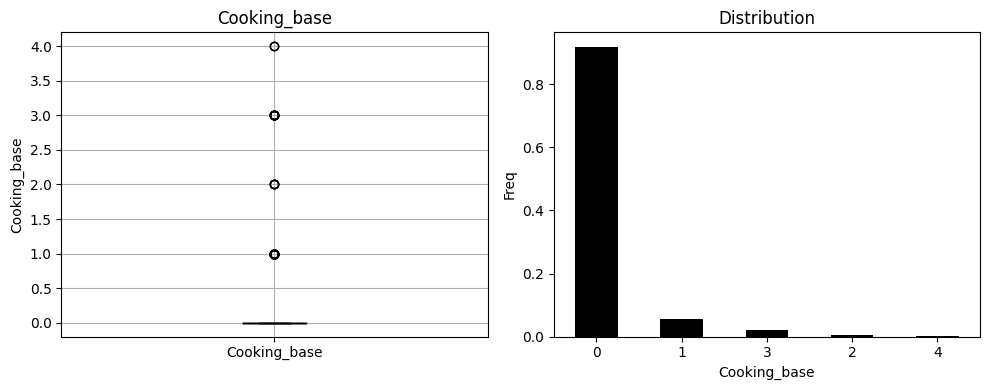

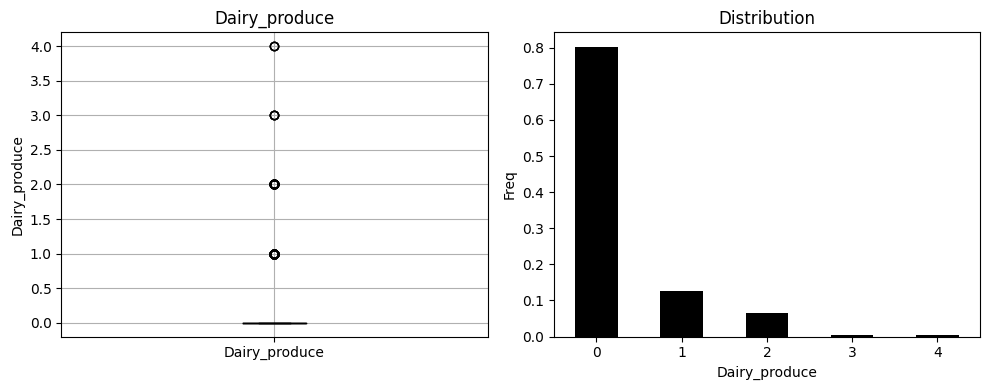

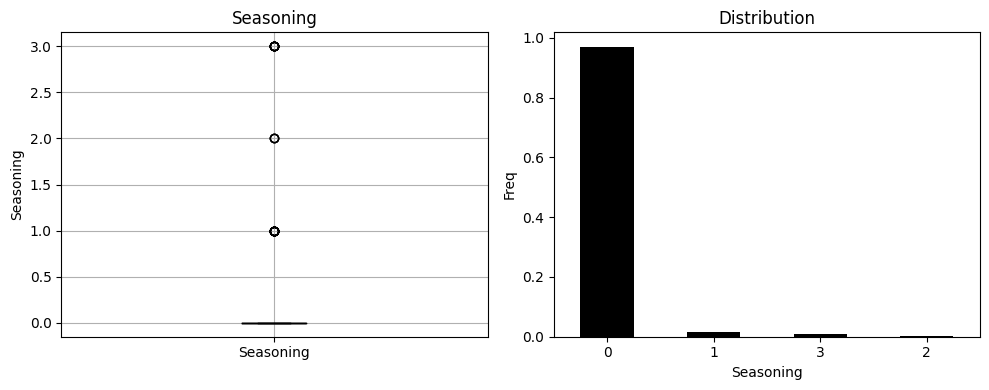

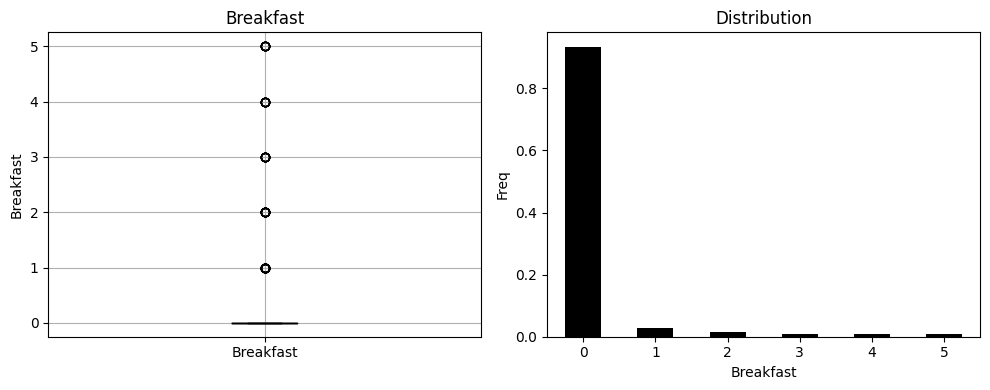

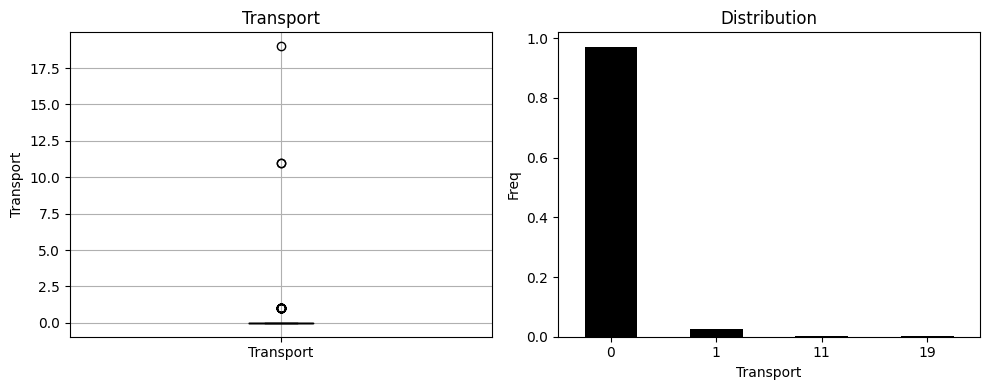

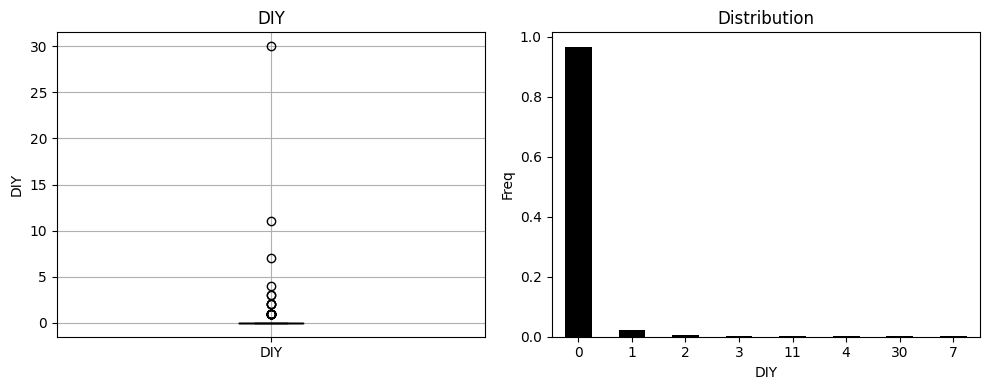

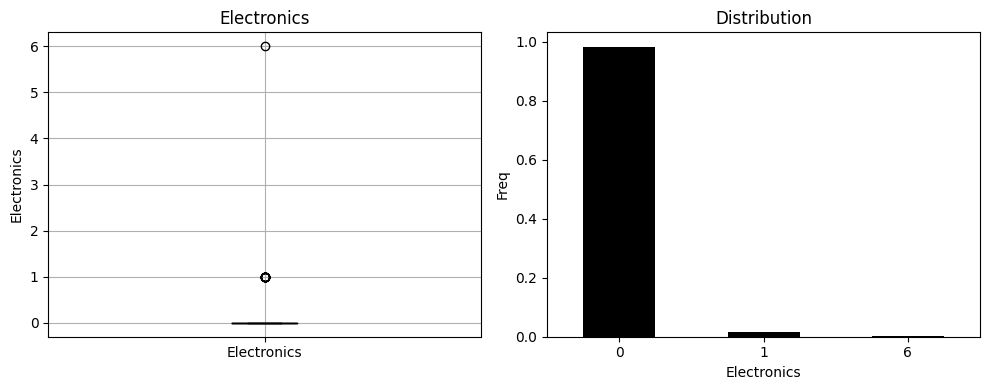

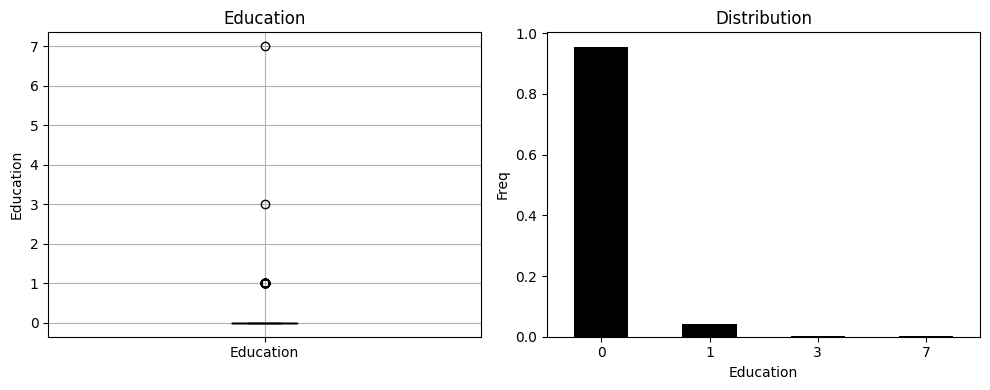

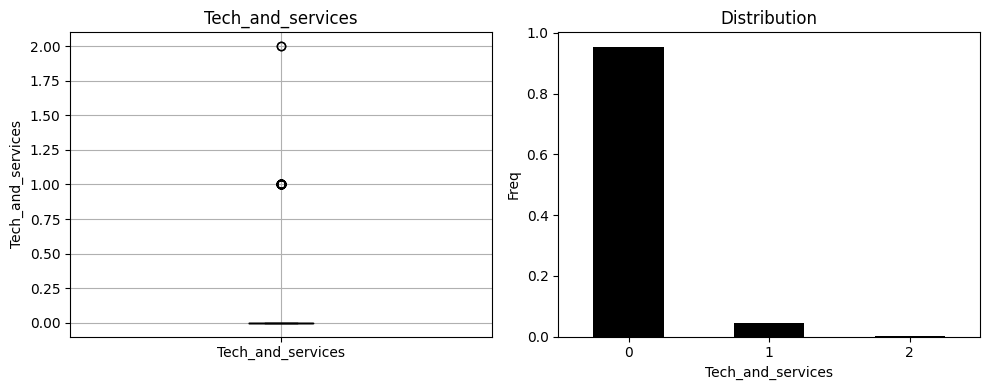

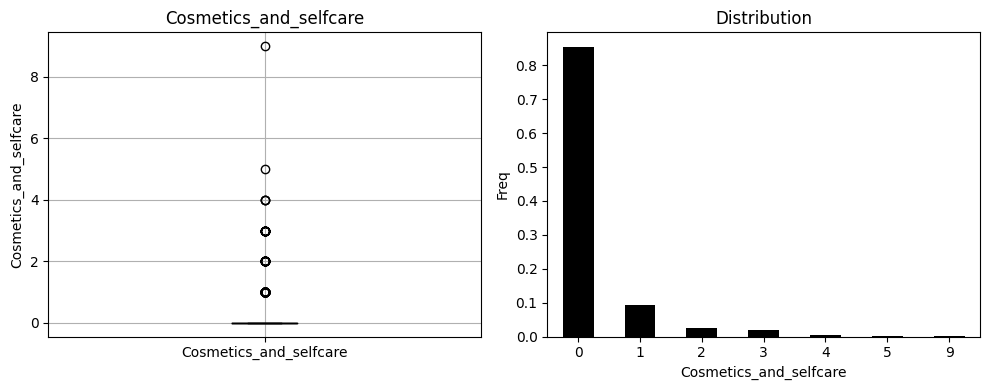

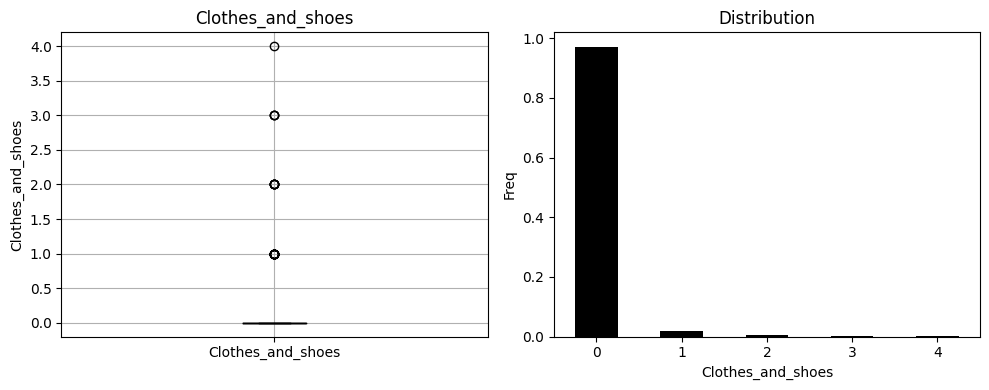

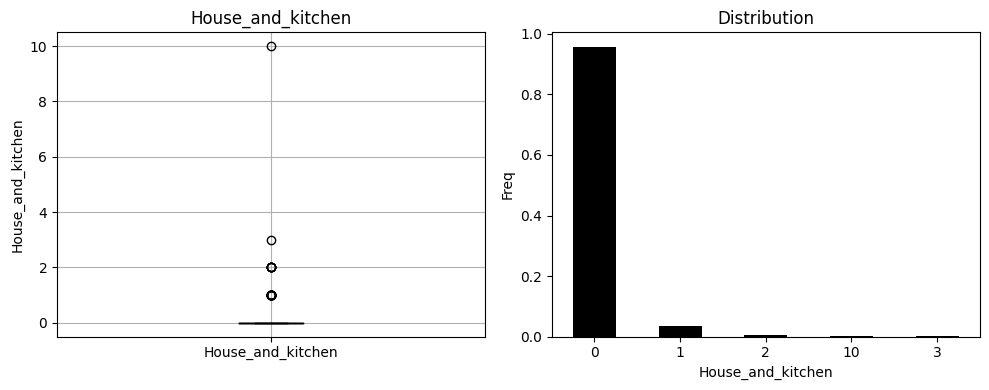

In [14]:
for var in list3:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)   
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].value_counts(normalize=True).plot(color='black', kind='bar', title=f'{var}')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    
    plt.show()
    

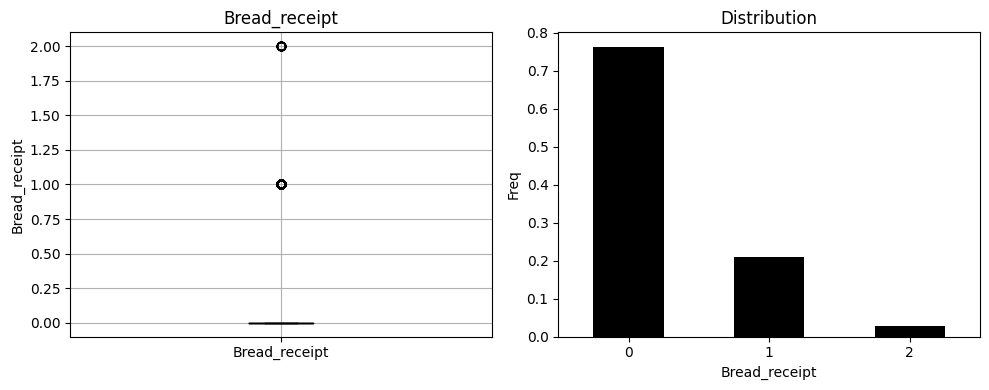

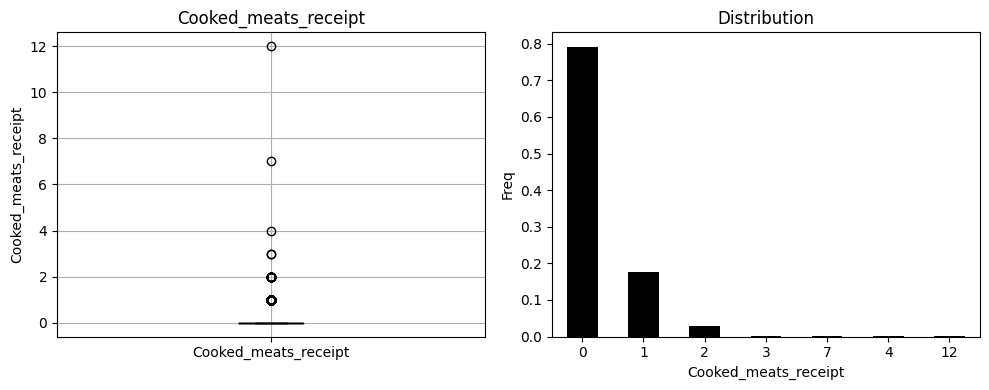

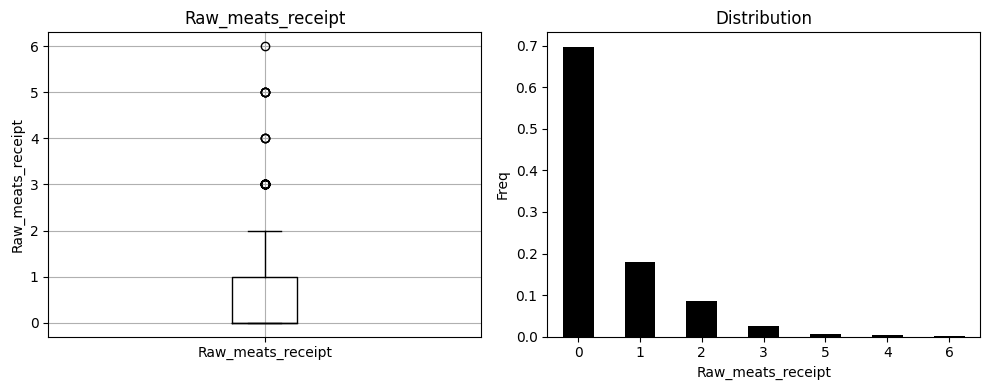

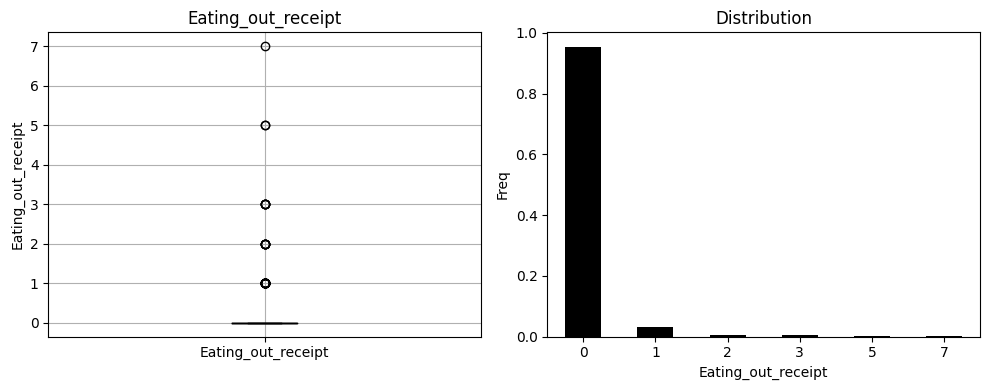

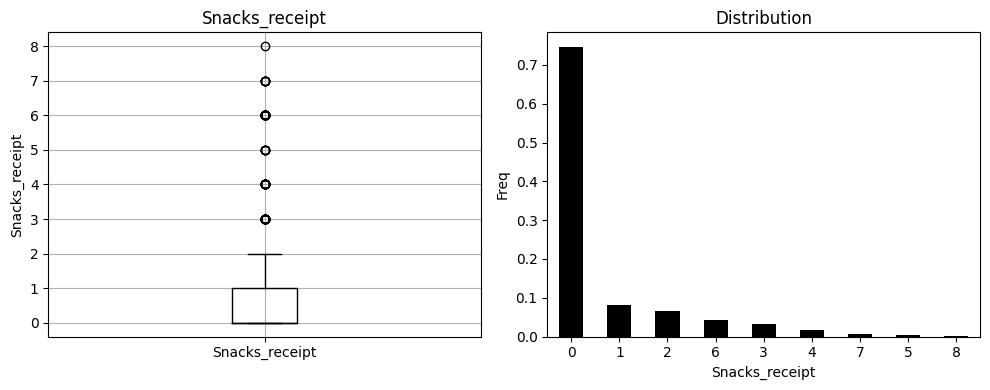

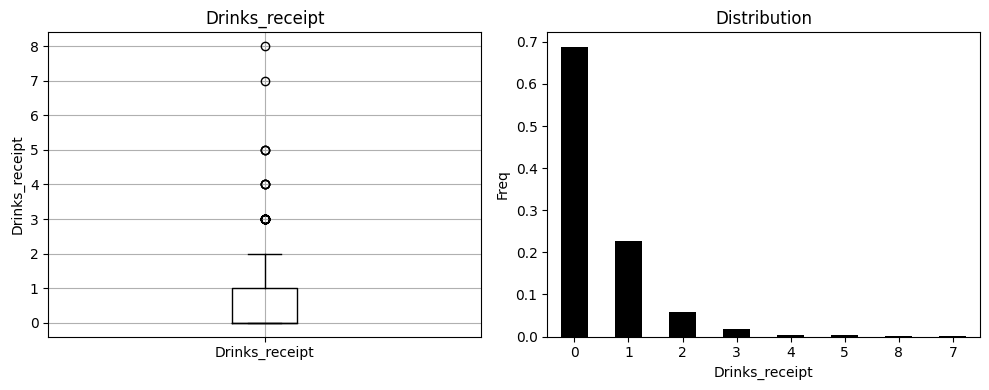

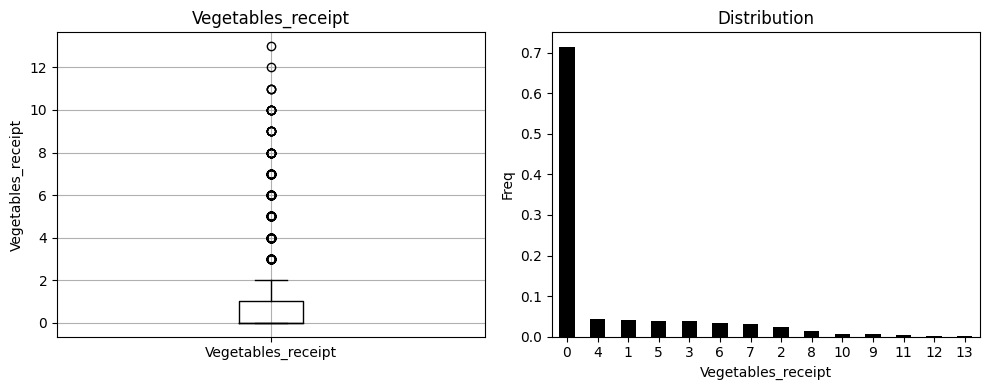

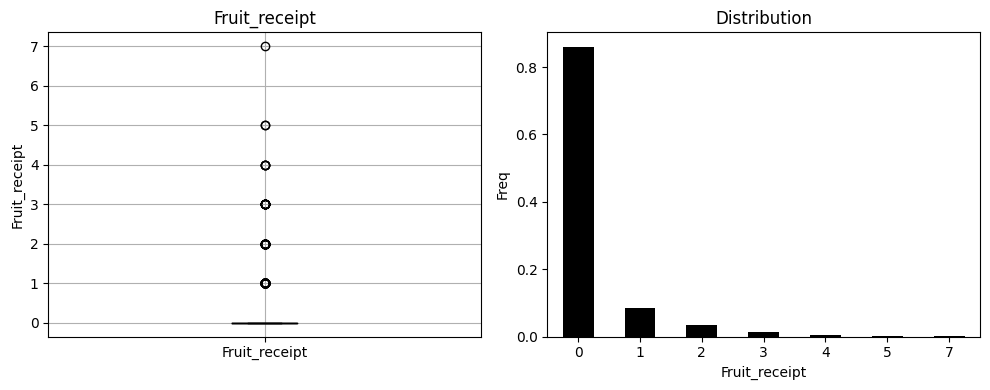

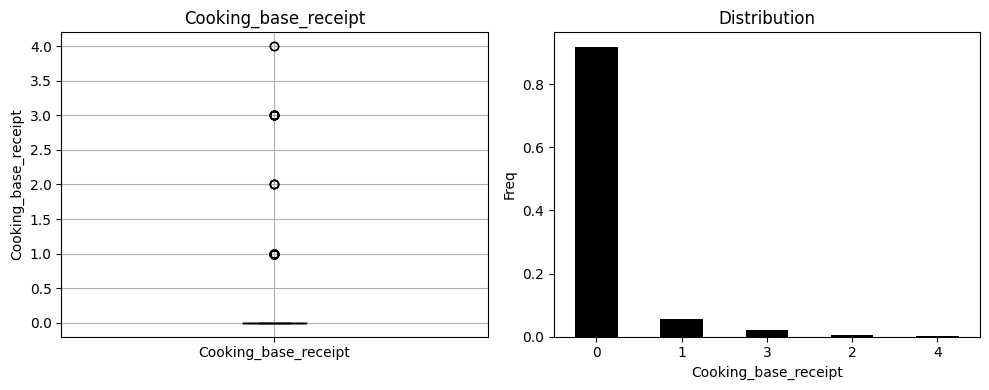

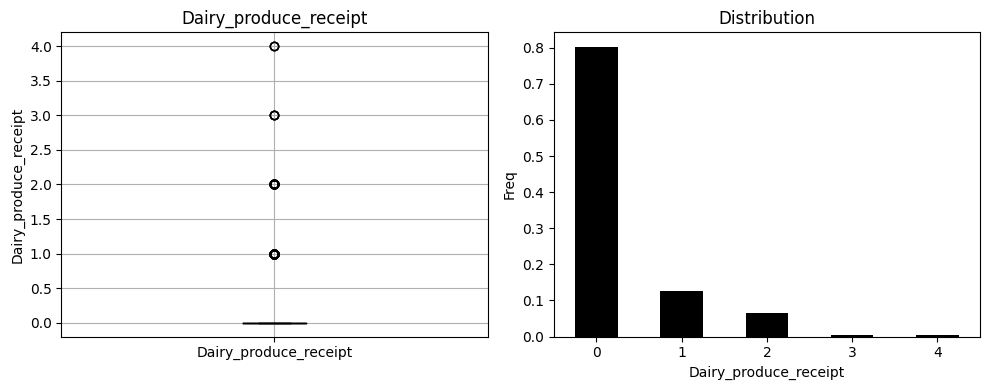

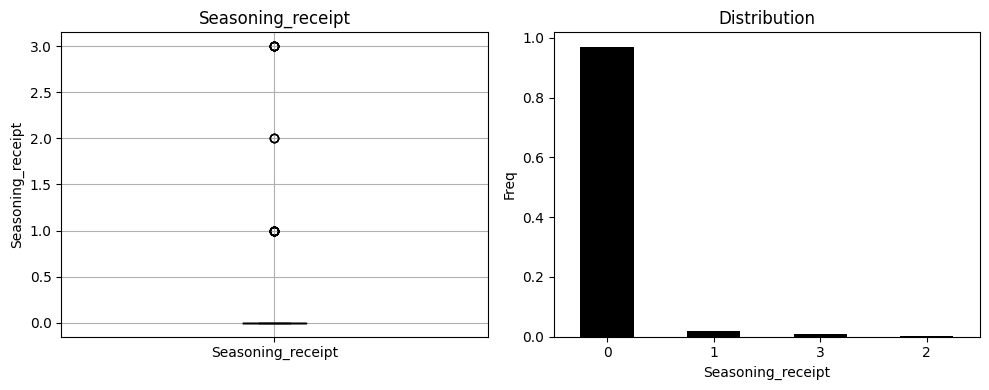

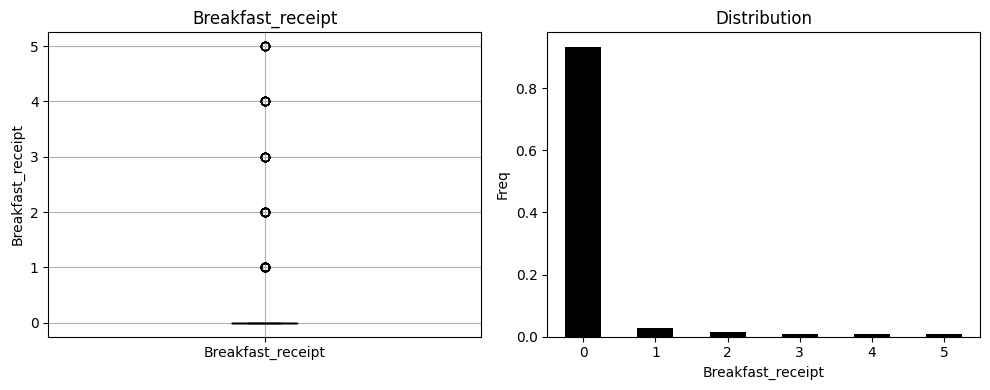

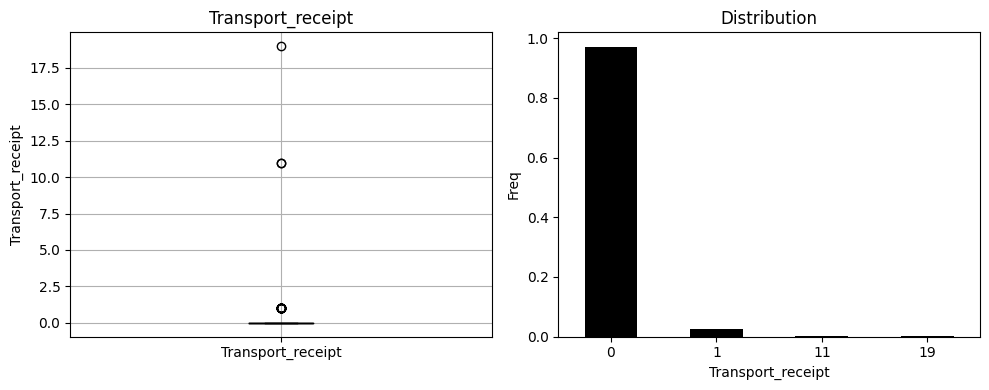

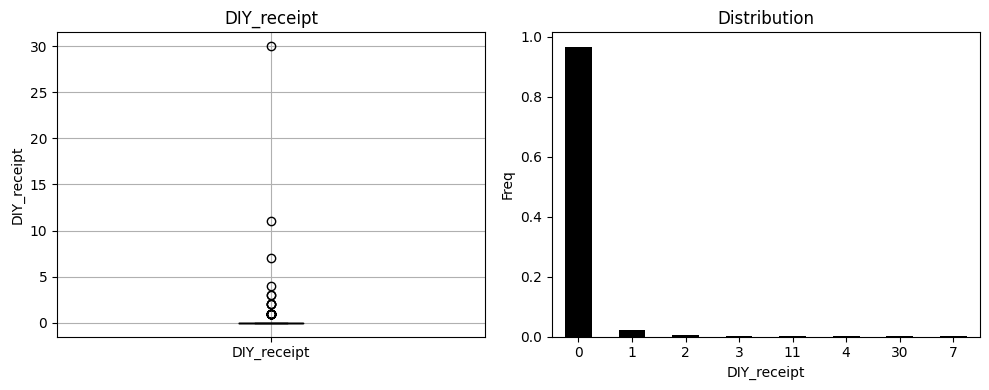

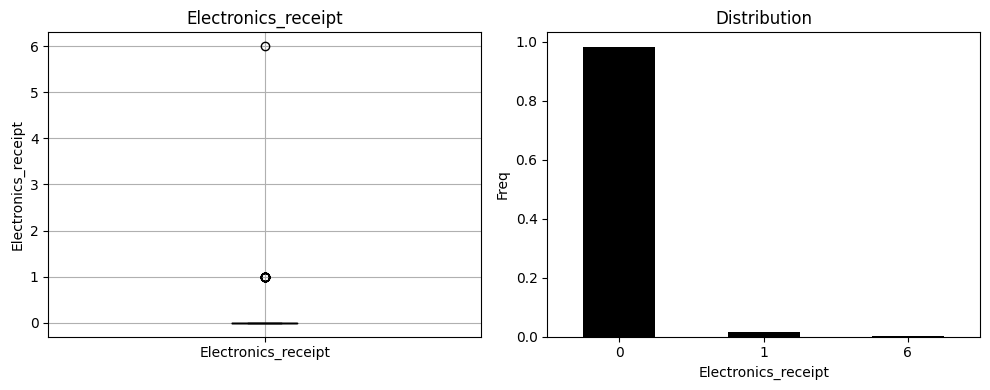

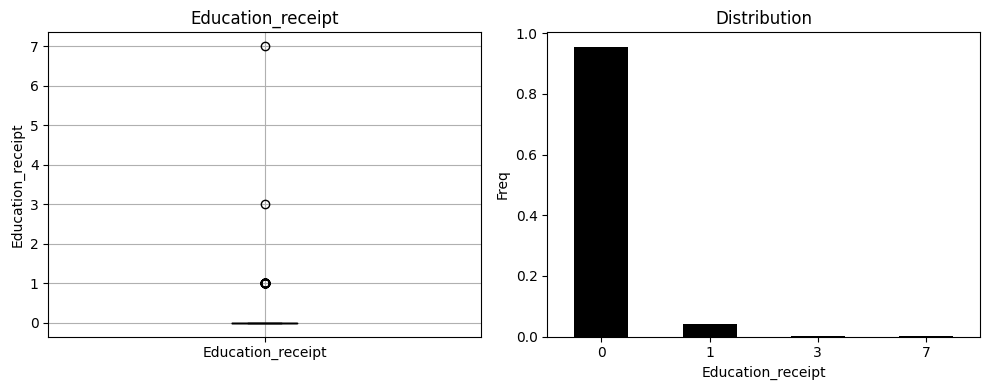

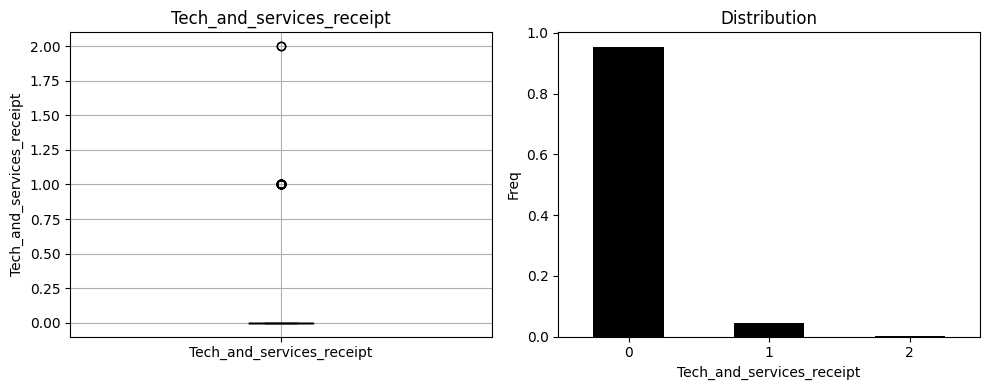

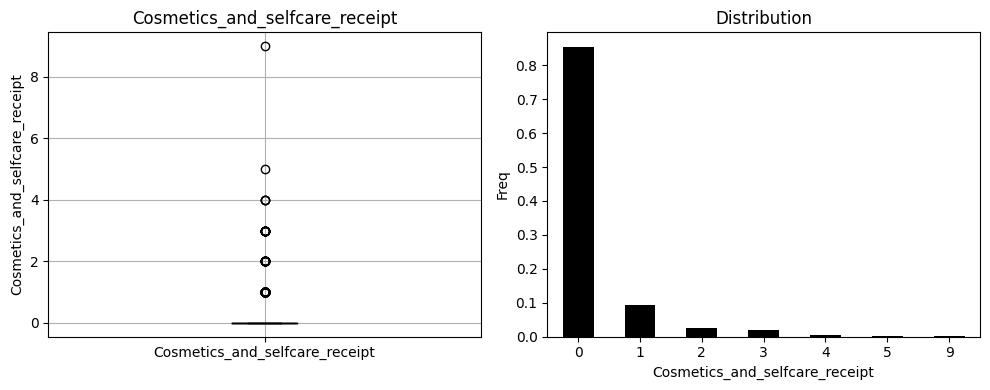

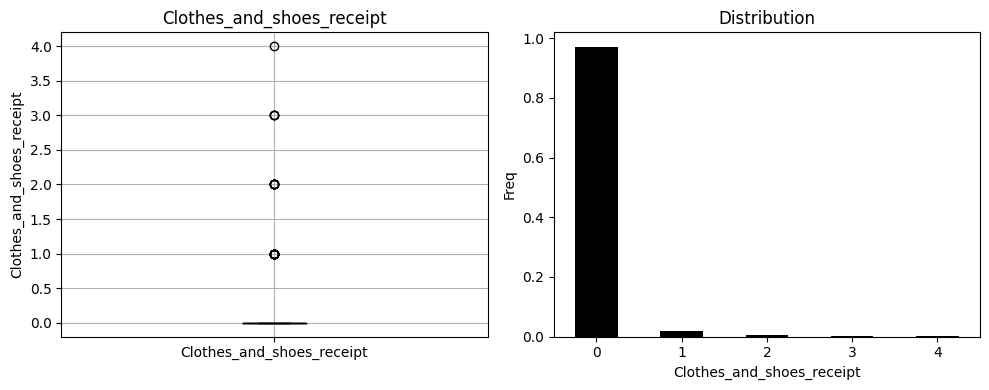

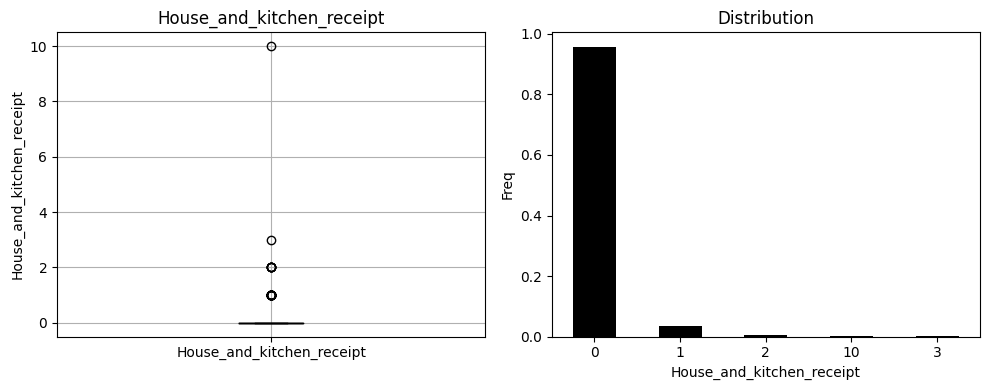

In [15]:
for var in list4:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)   
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].value_counts(normalize=True).plot(kind='bar',color='black')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    plt.xticks(rotation=0)
    plt.tight_layout()

    plt.show()

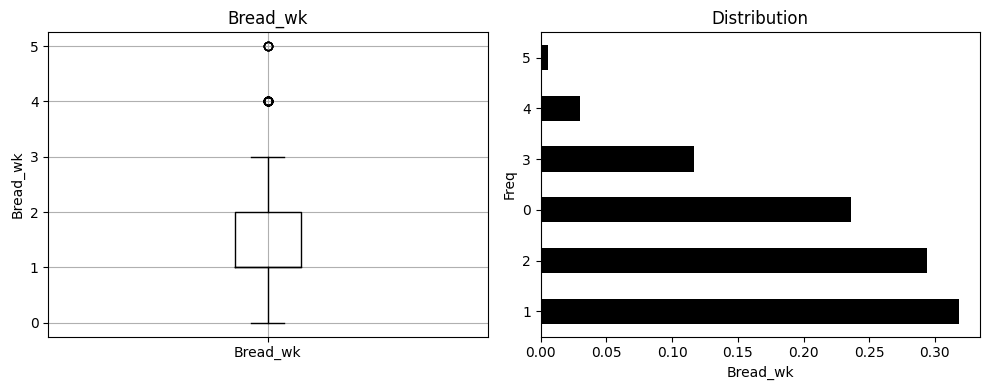

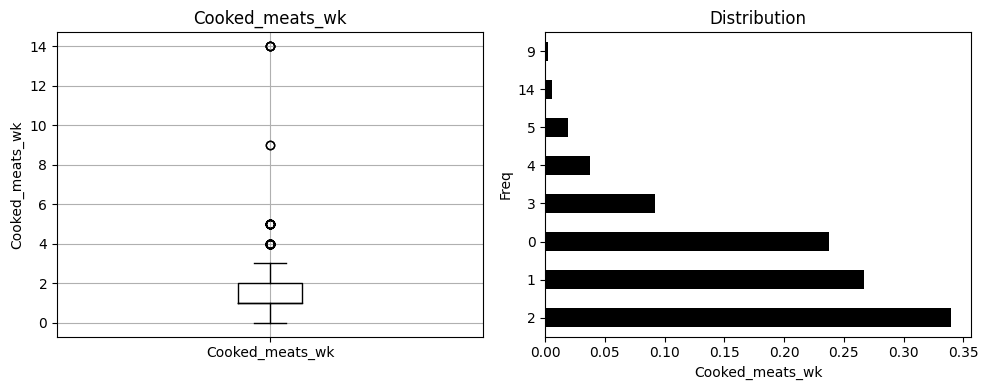

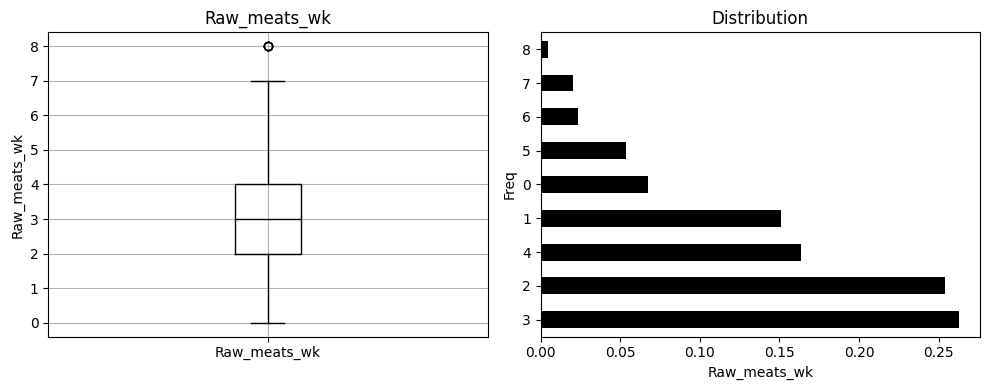

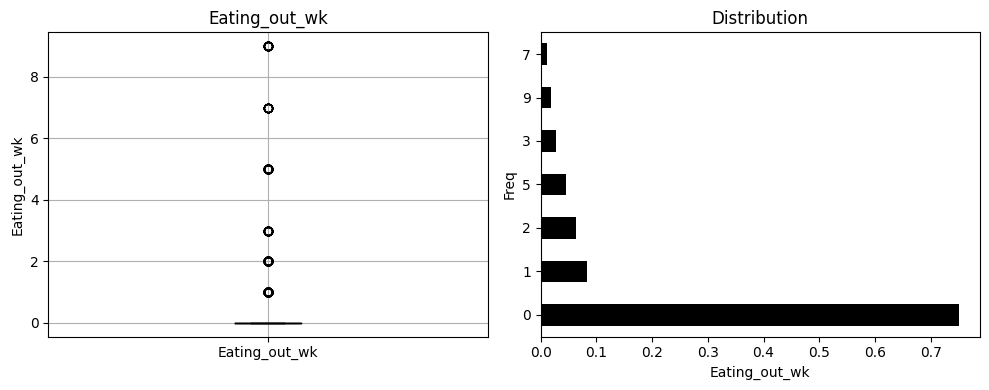

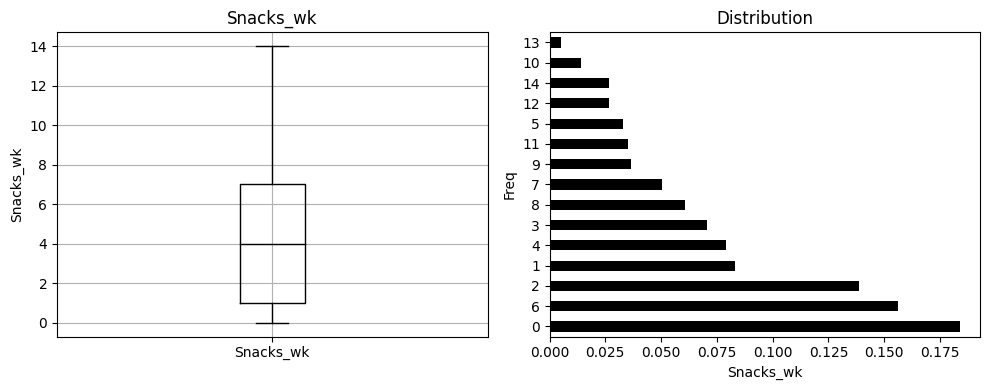

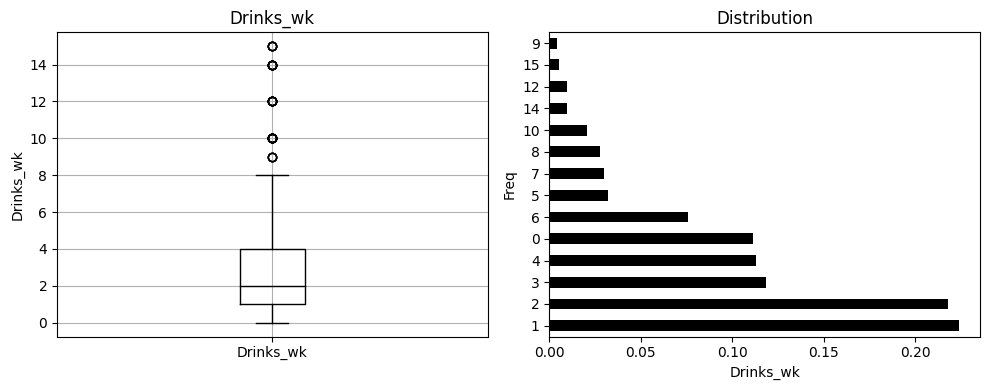

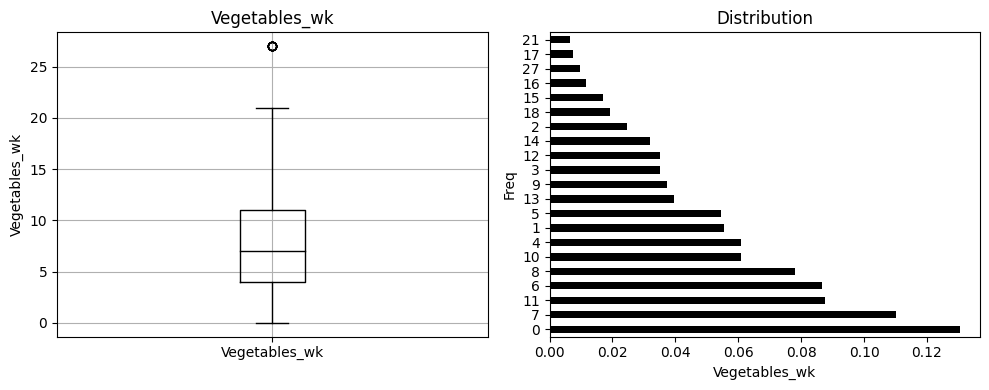

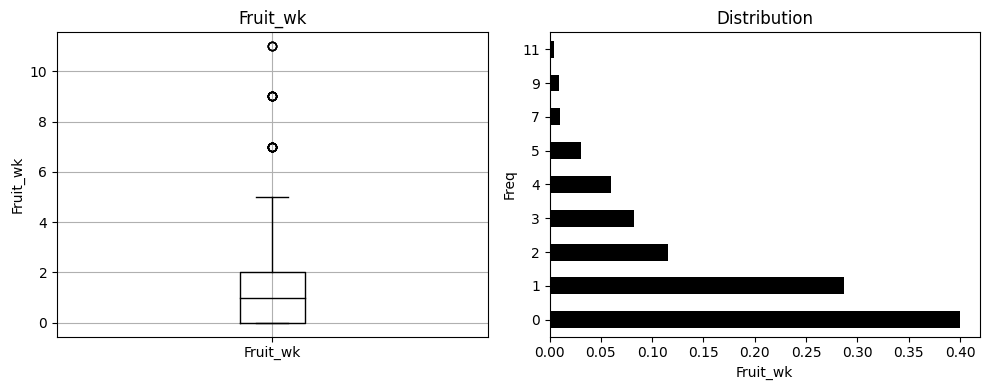

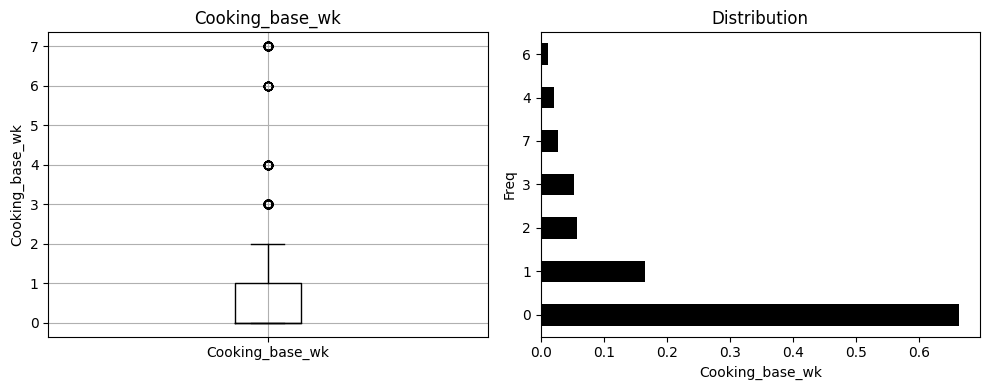

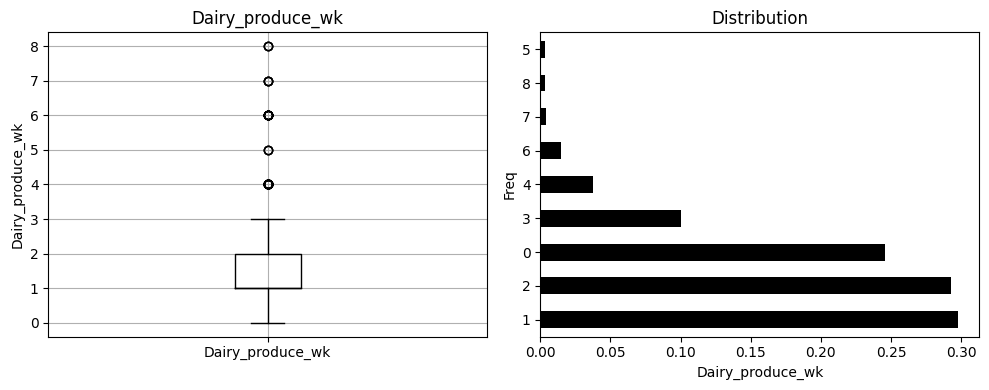

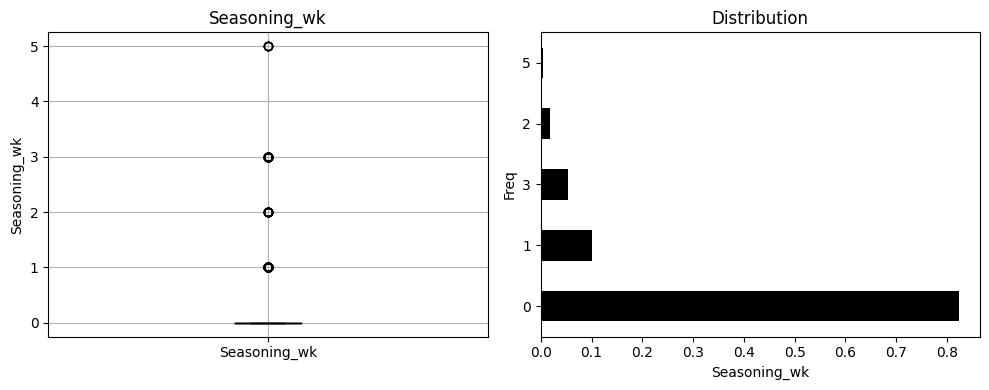

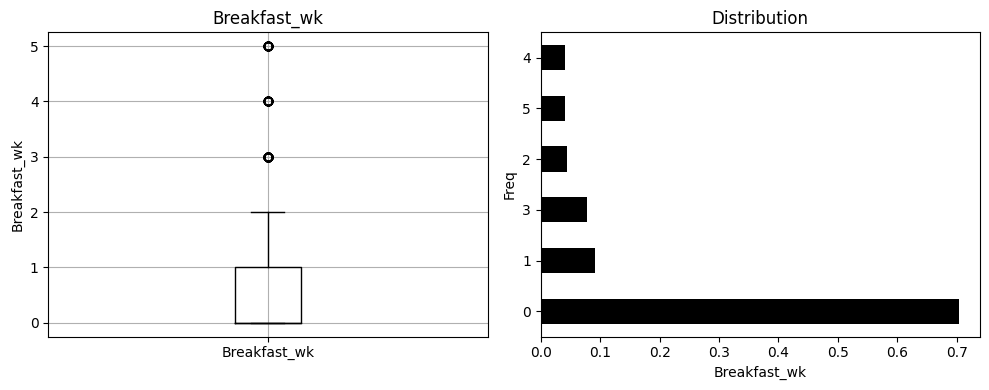

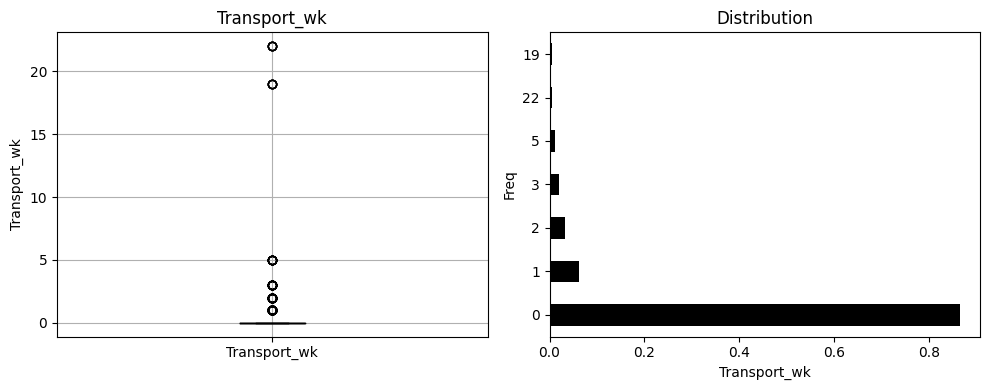

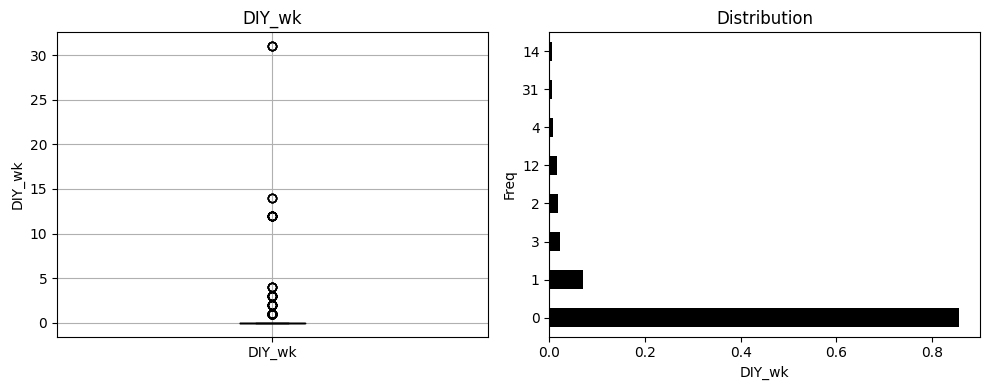

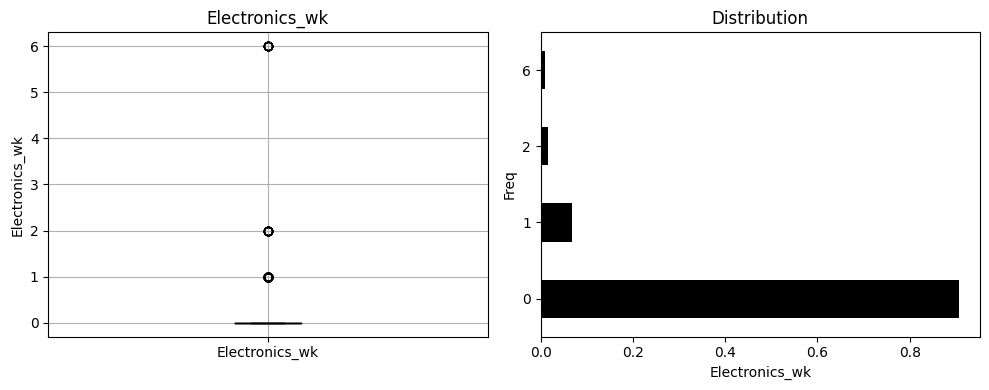

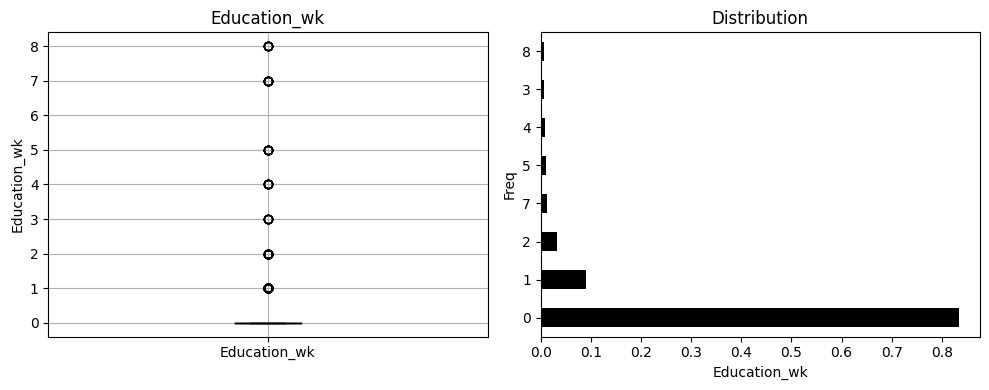

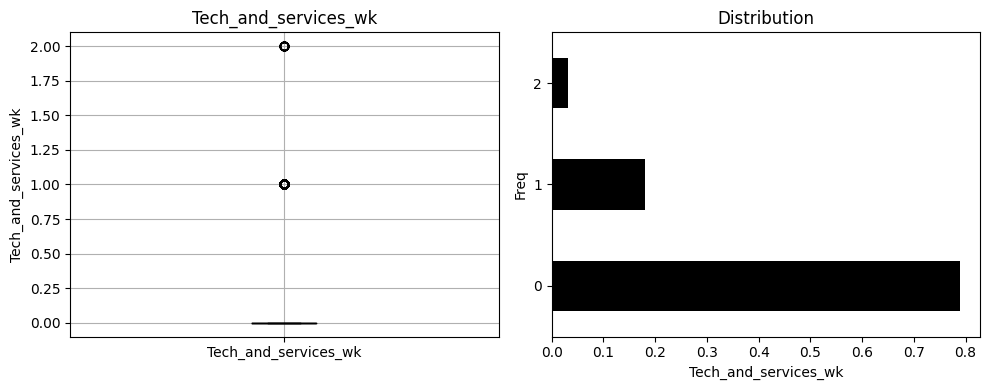

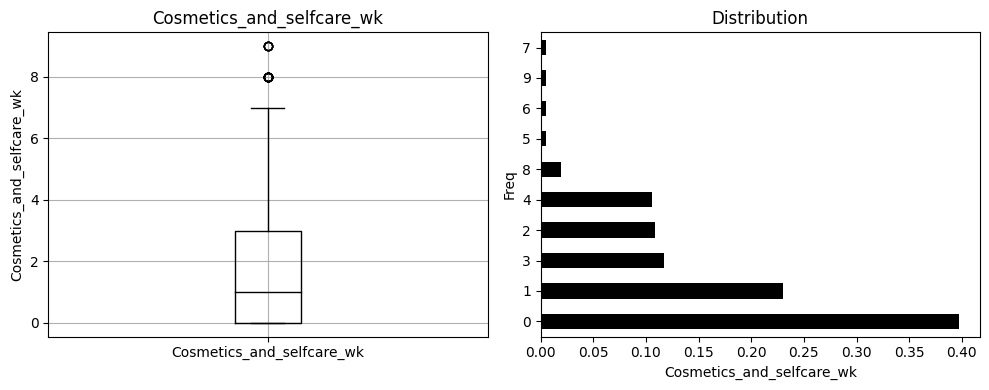

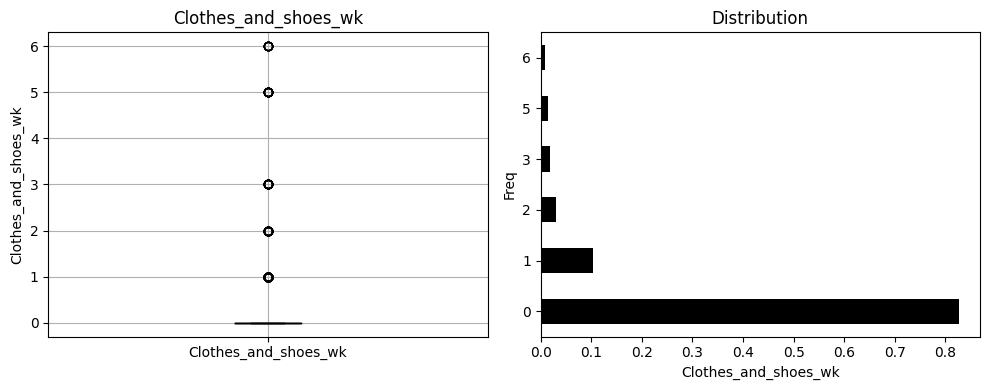

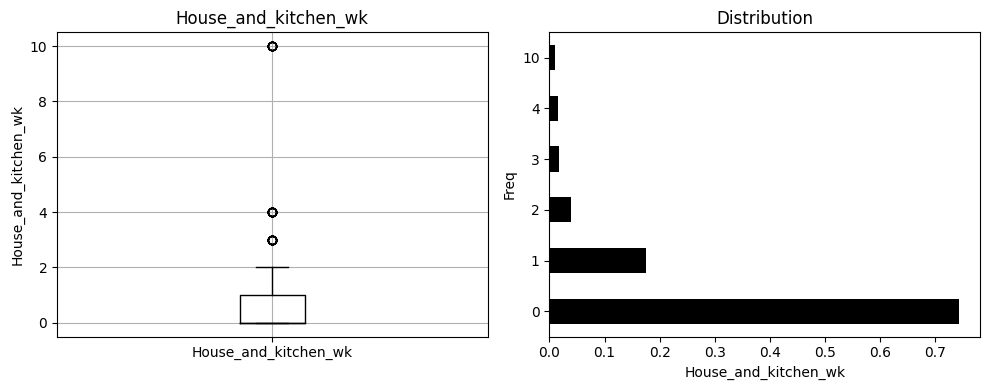

In [16]:
for var in list5:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)    
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].value_counts(normalize=True).plot(kind='barh',color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    #plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

<p>
The features in this list have a skewed distribution with the majority having a dominant category representing less than 70% of the observations and a few features exhibiting a clear dominant category with more than 70% of the observations.
</p>

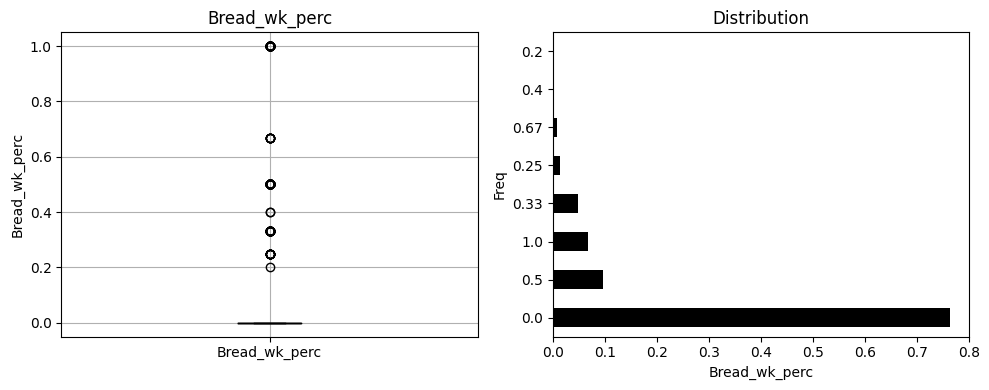

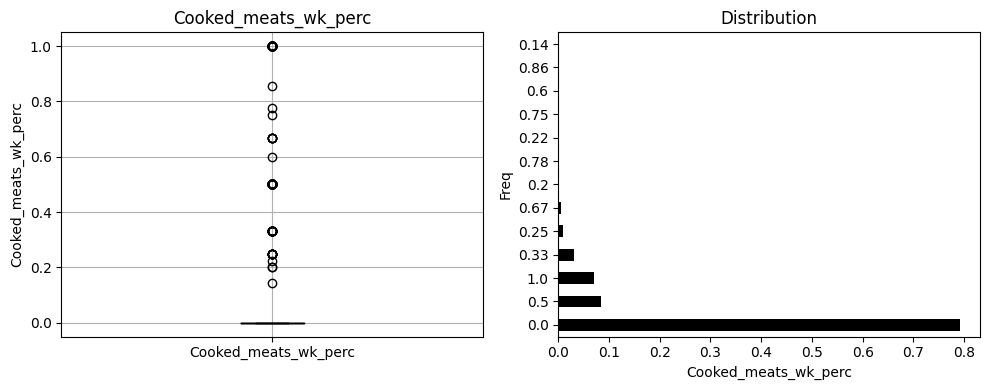

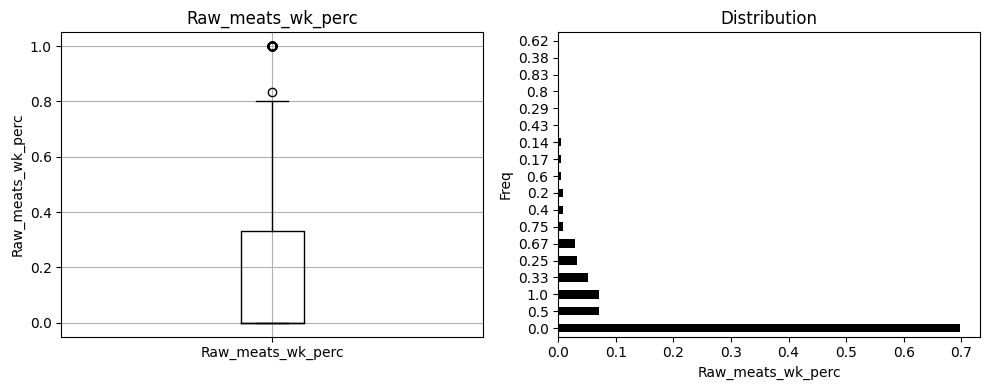

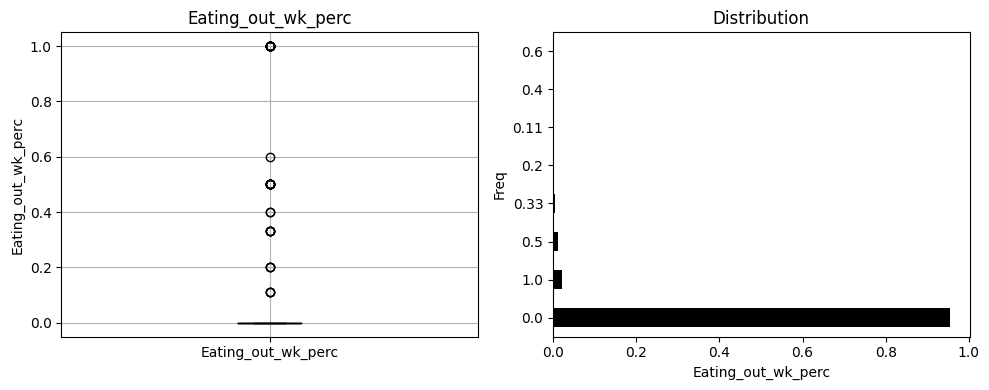

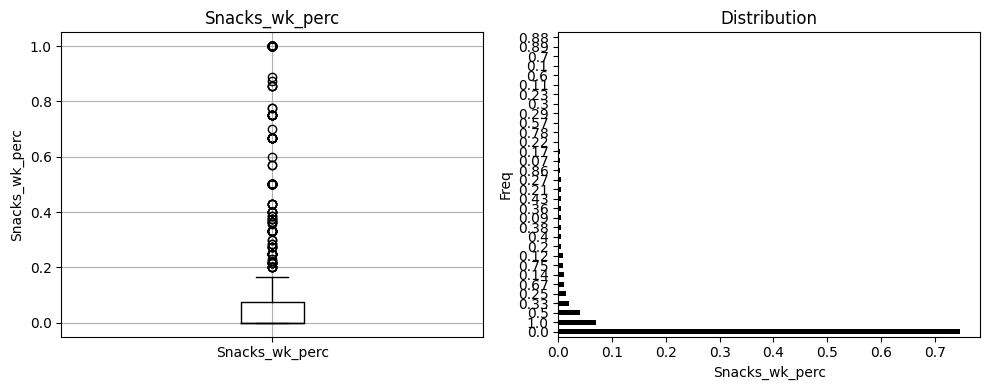

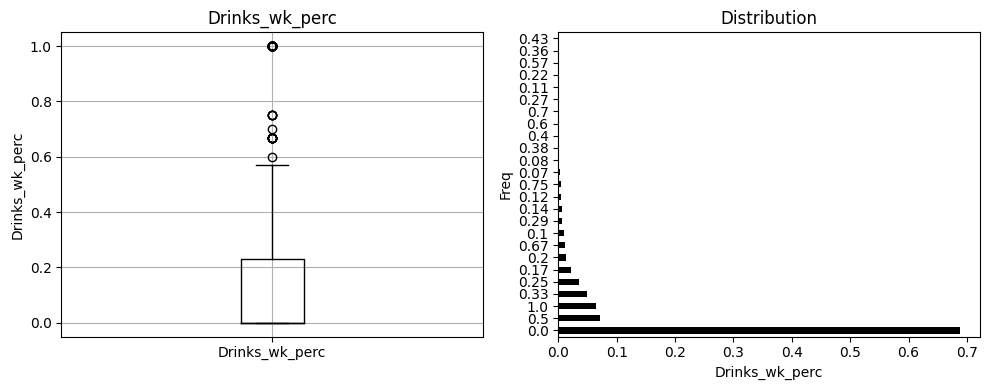

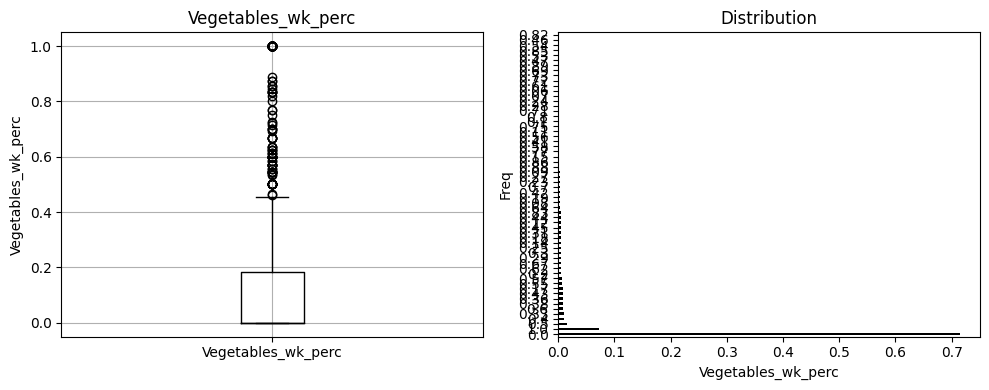

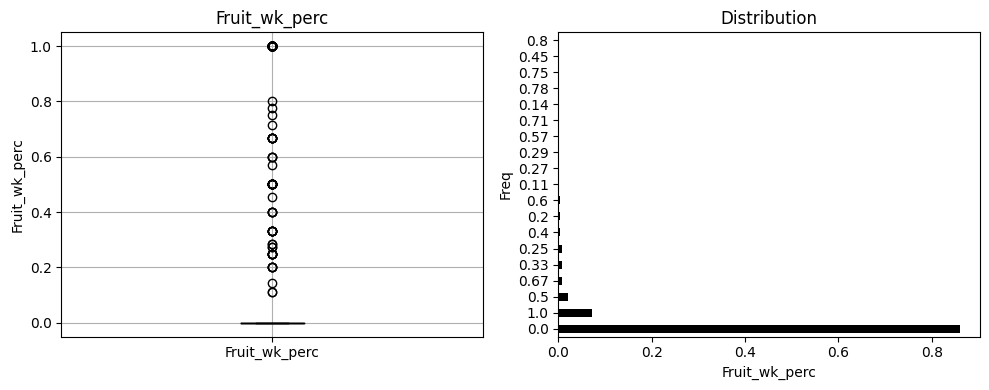

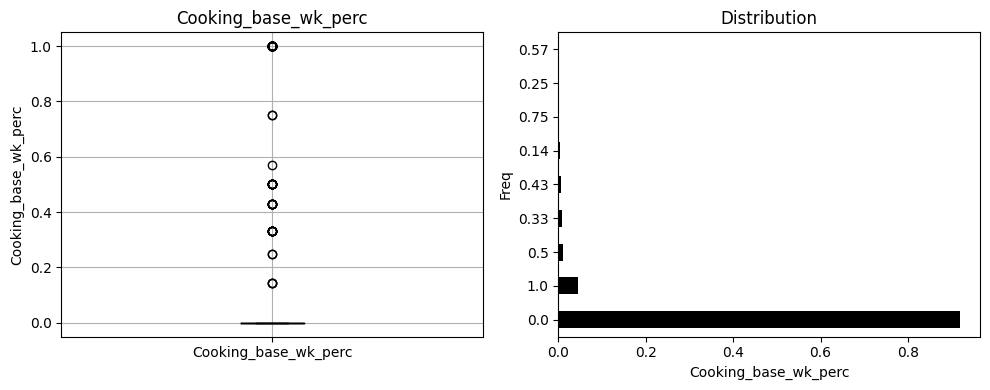

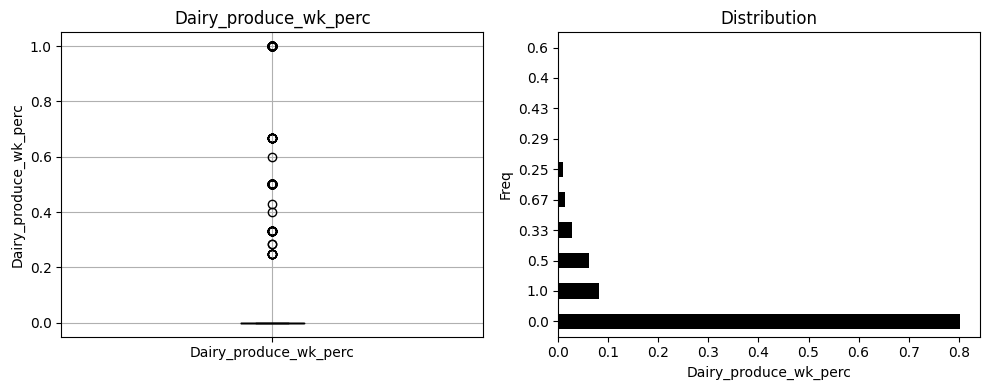

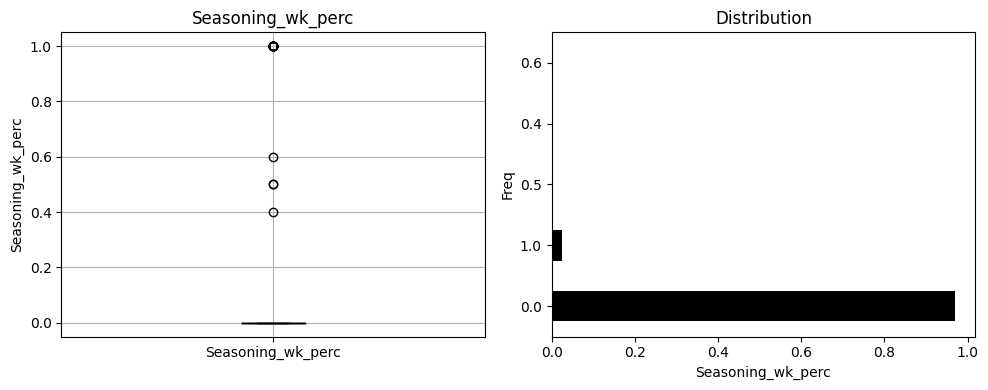

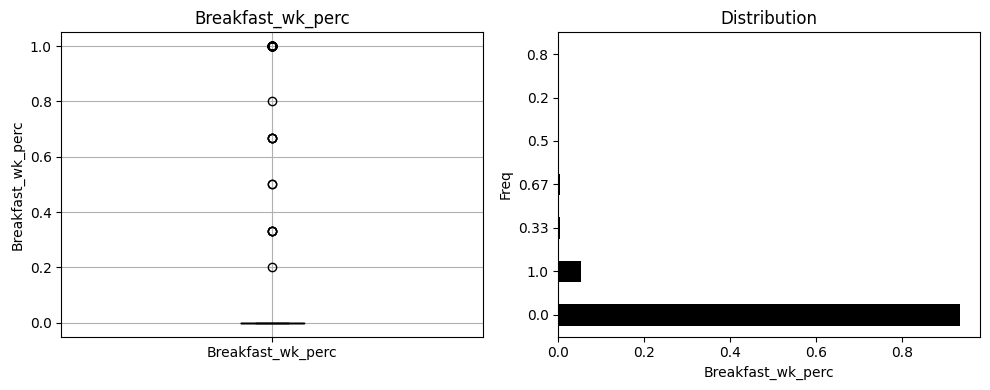

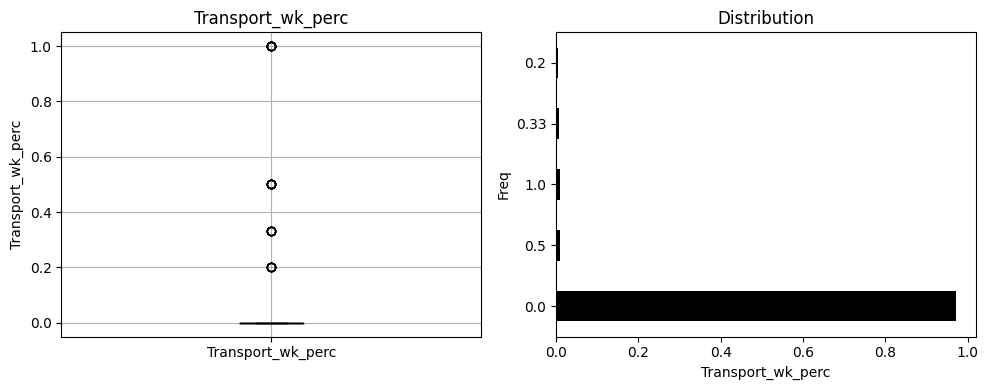

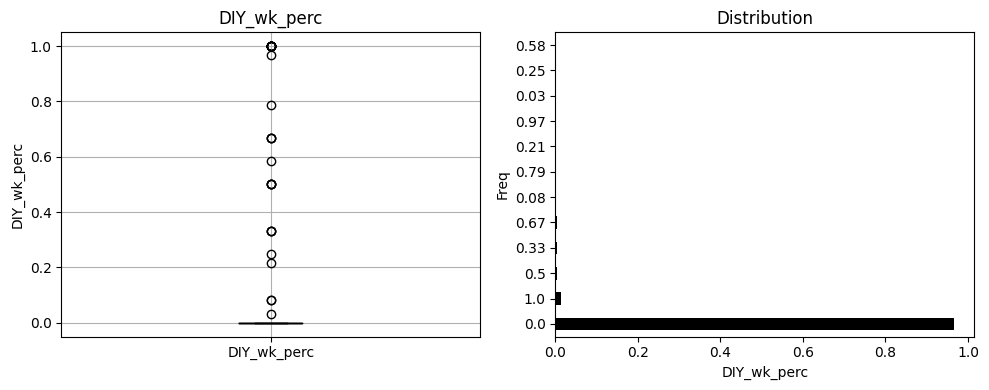

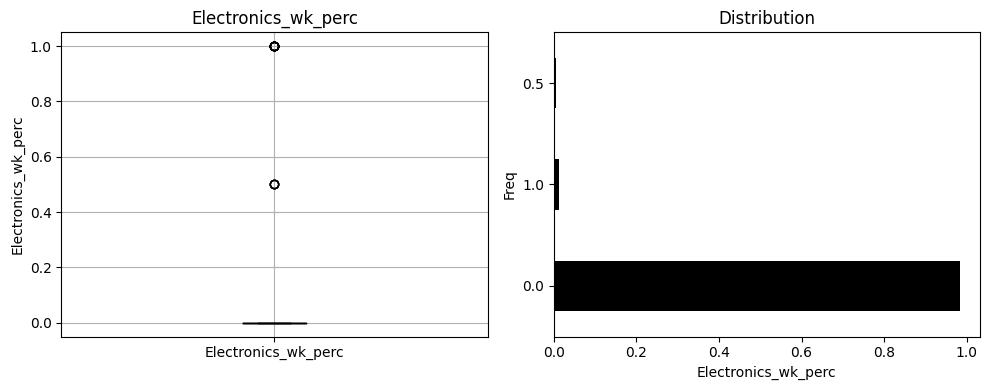

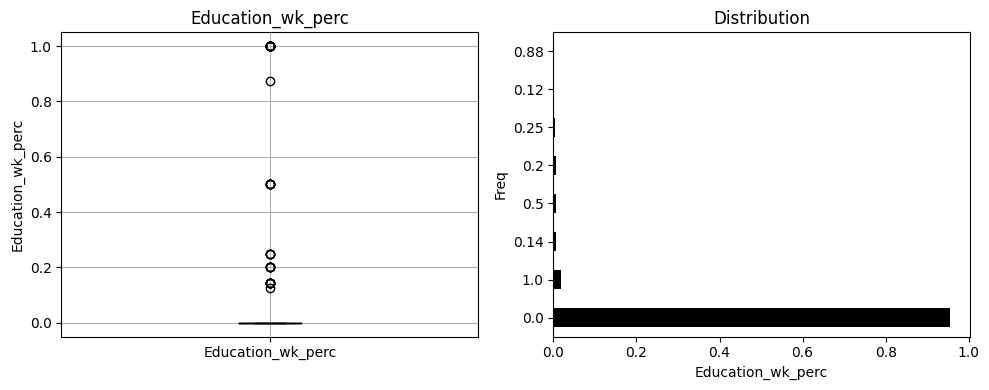

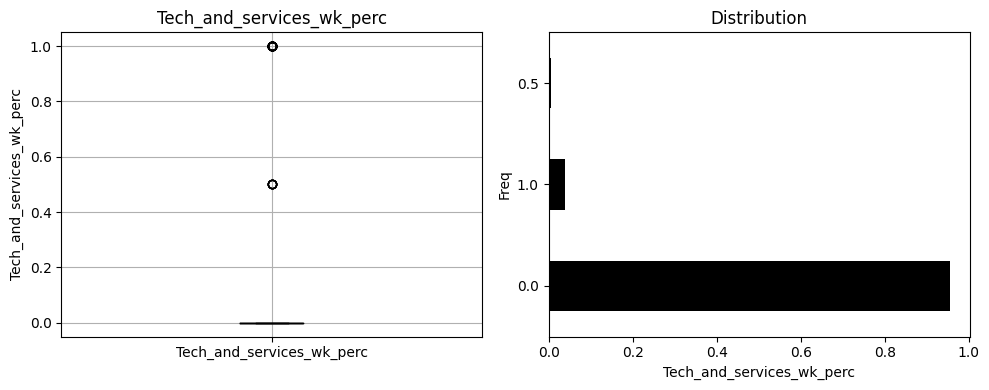

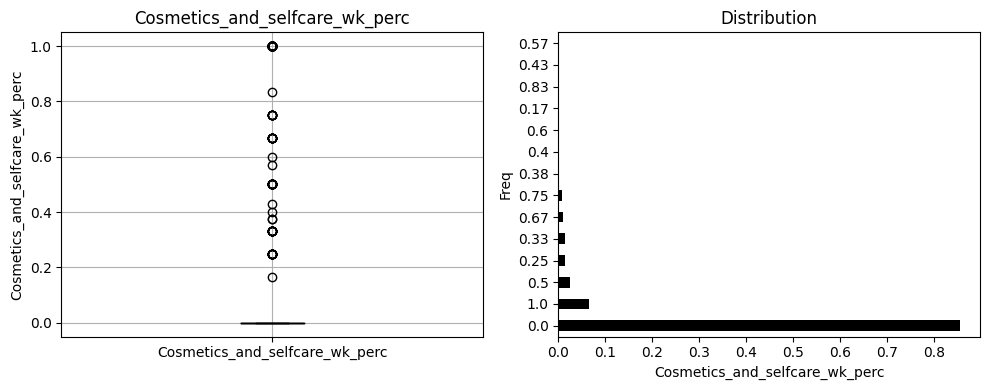

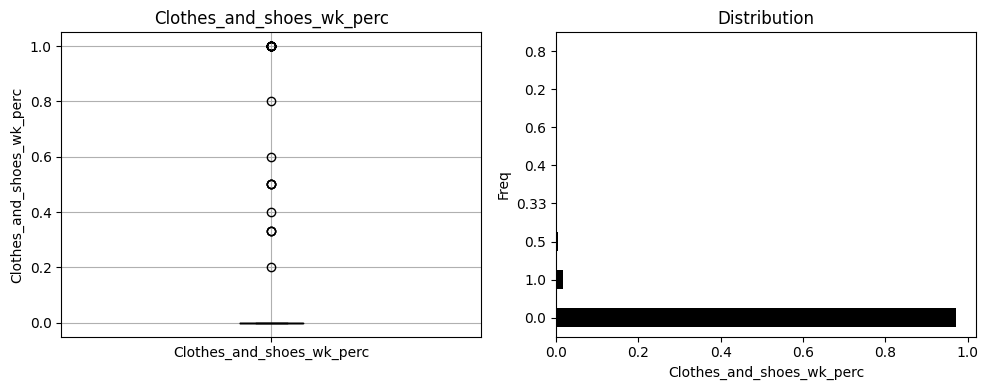

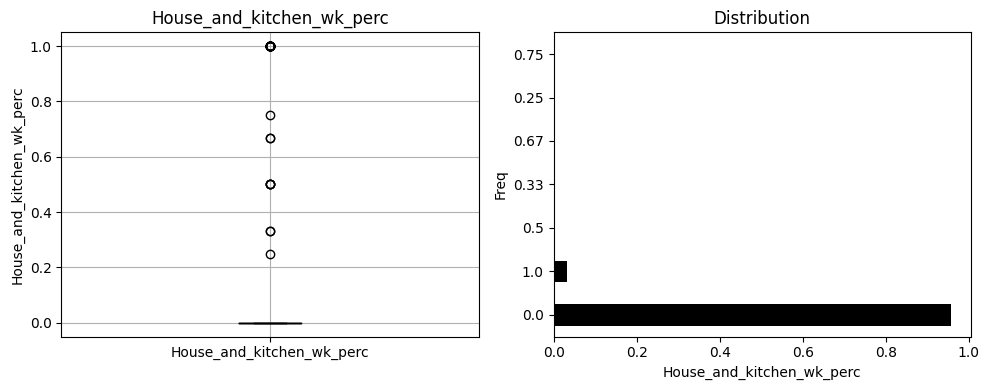

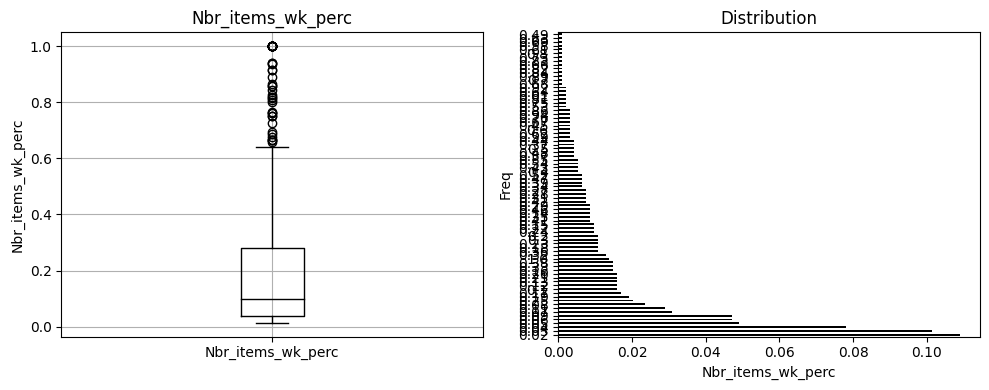

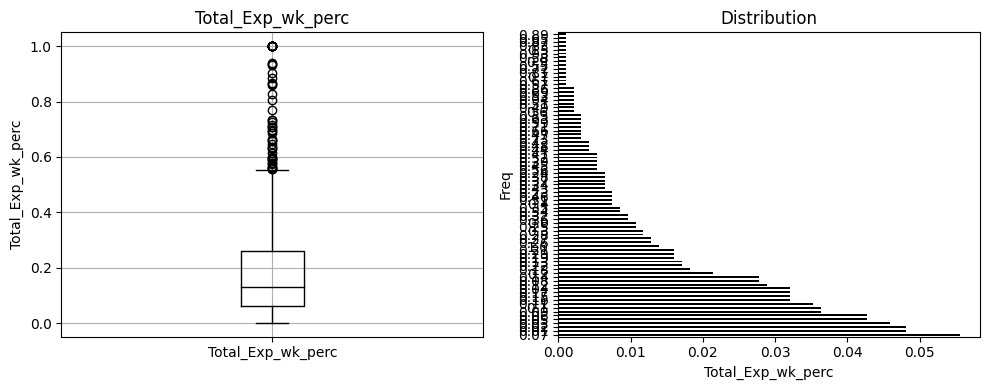

In [17]:
for var in list6:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)   
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].round(2).value_counts(normalize=True).plot(kind='barh',color='black')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    
    plt.tight_layout()
    plt.show()
    #np.round_(in_array, decimals = 3)

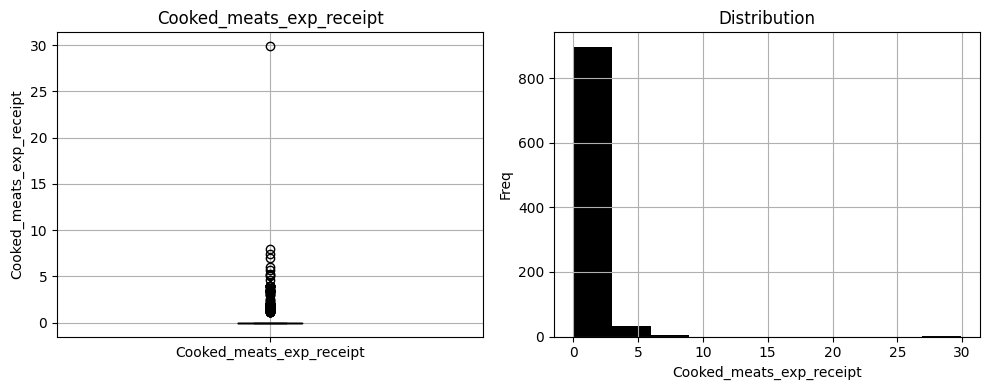

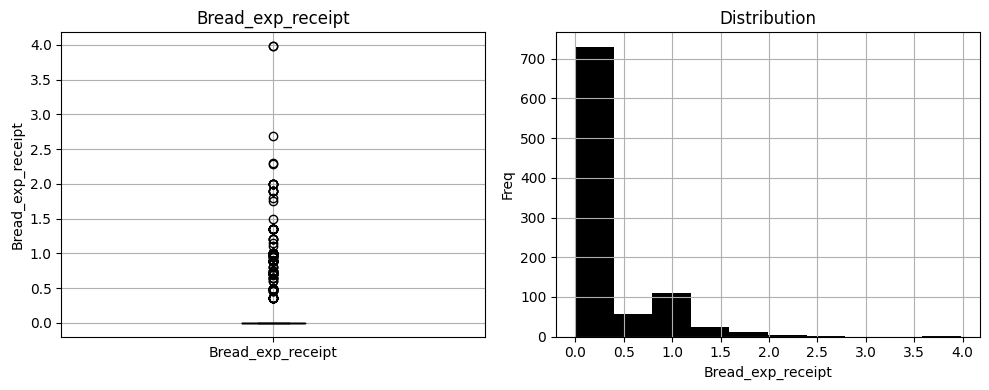

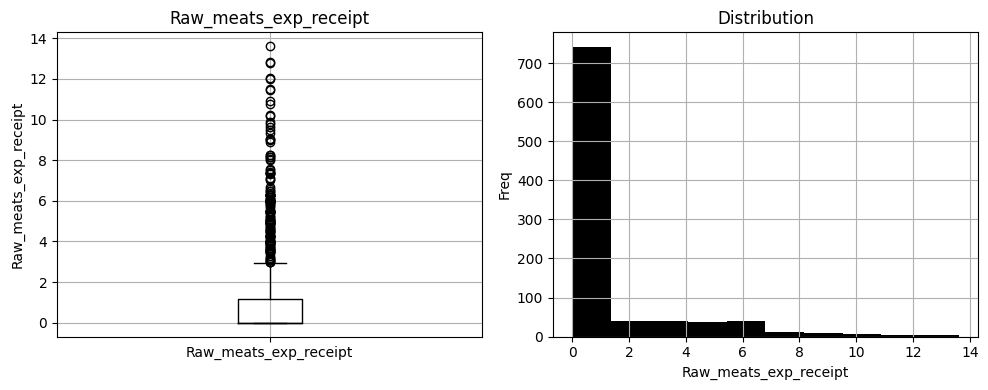

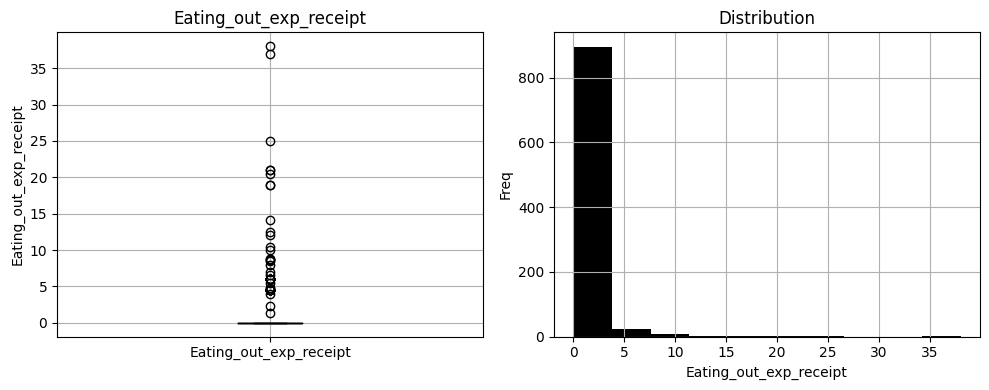

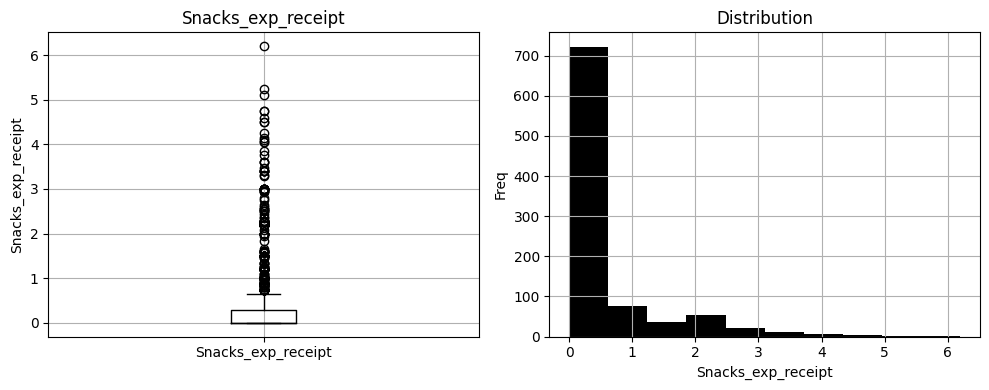

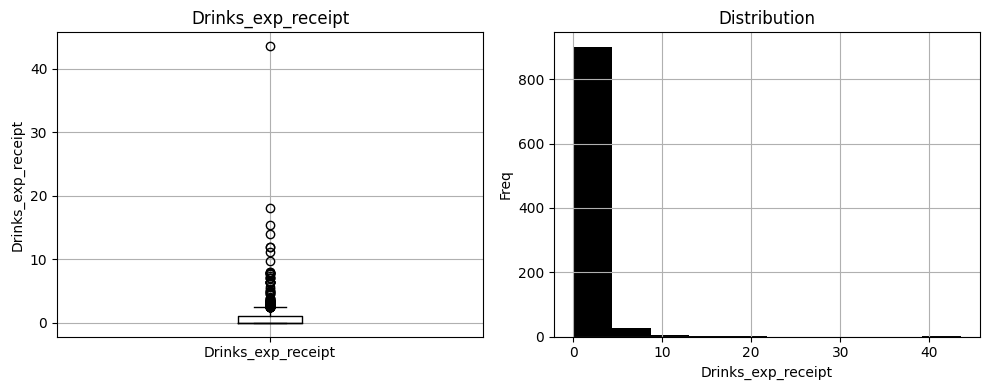

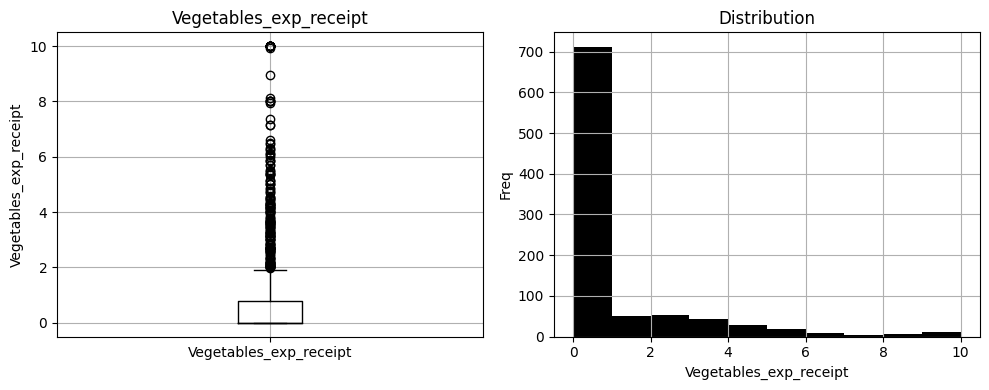

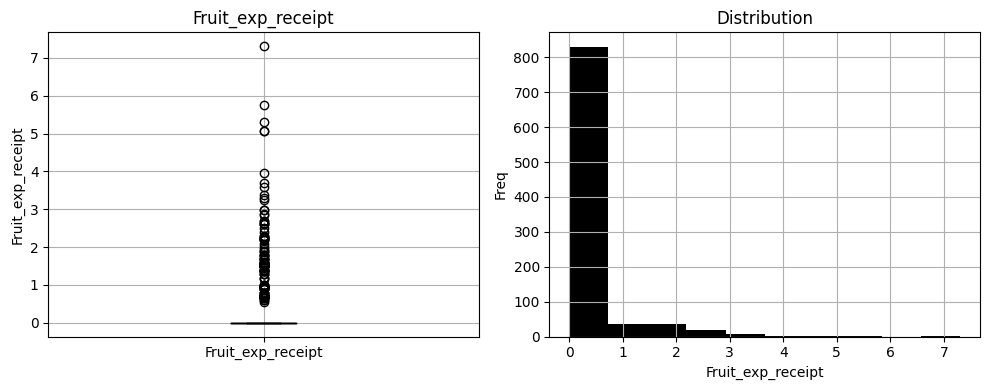

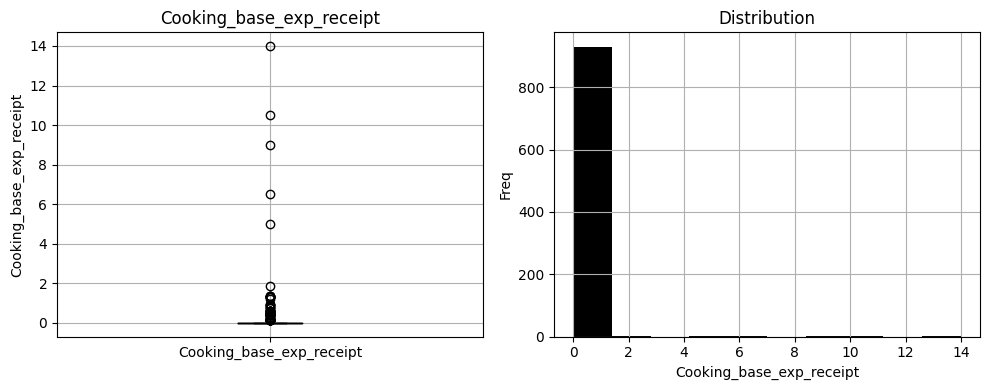

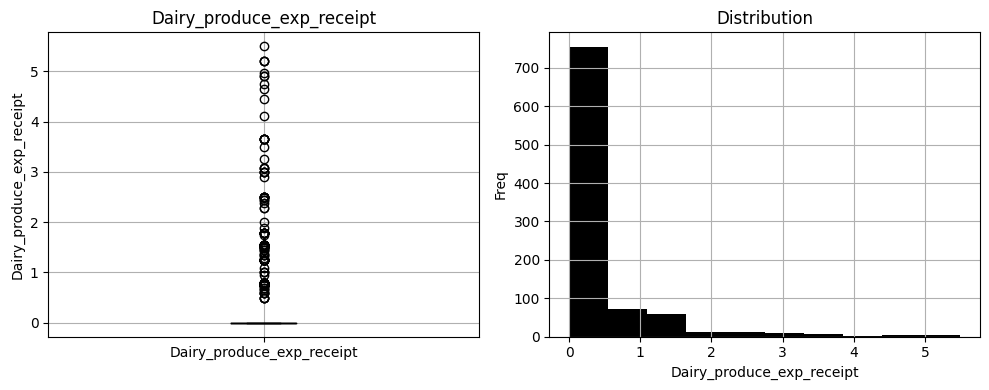

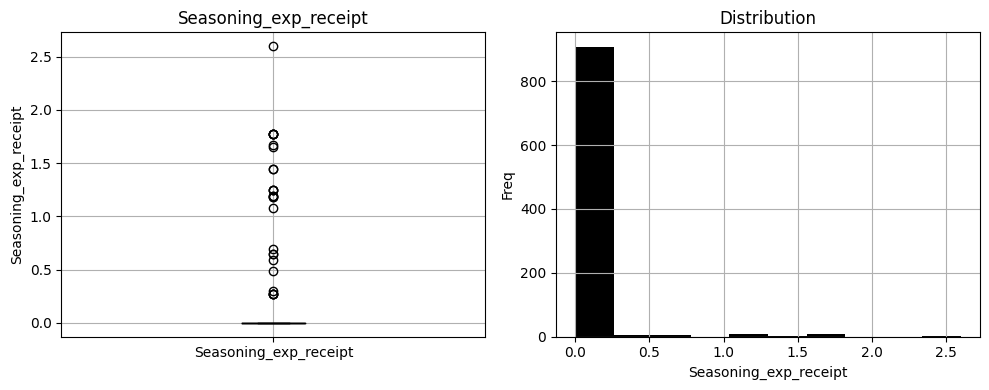

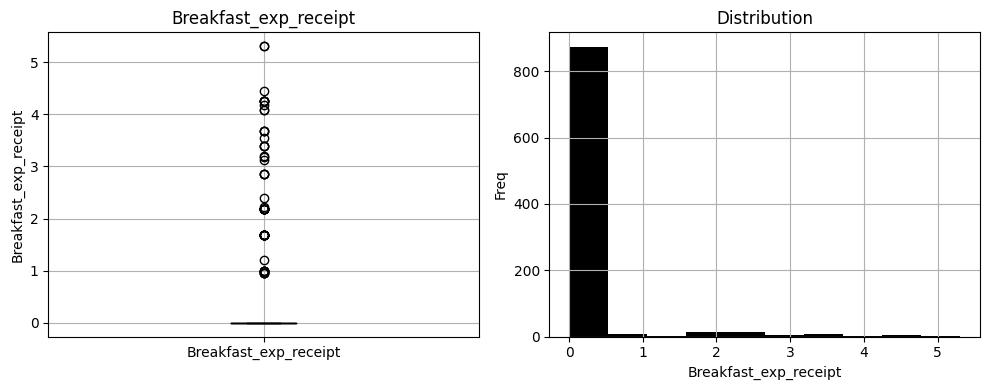

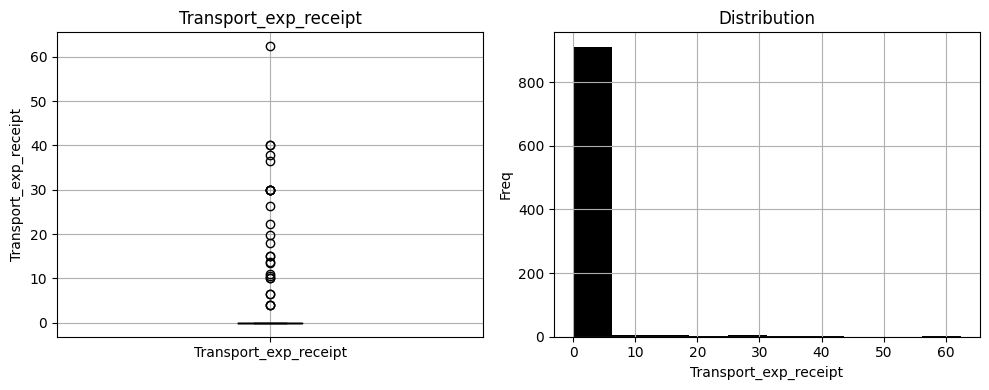

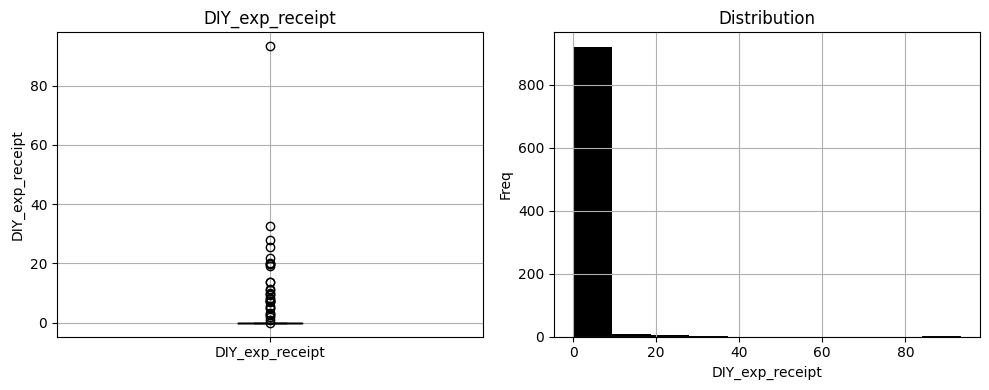

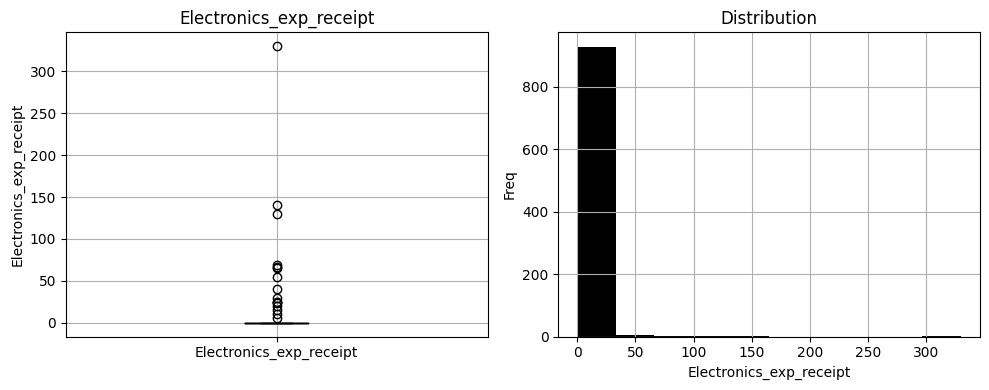

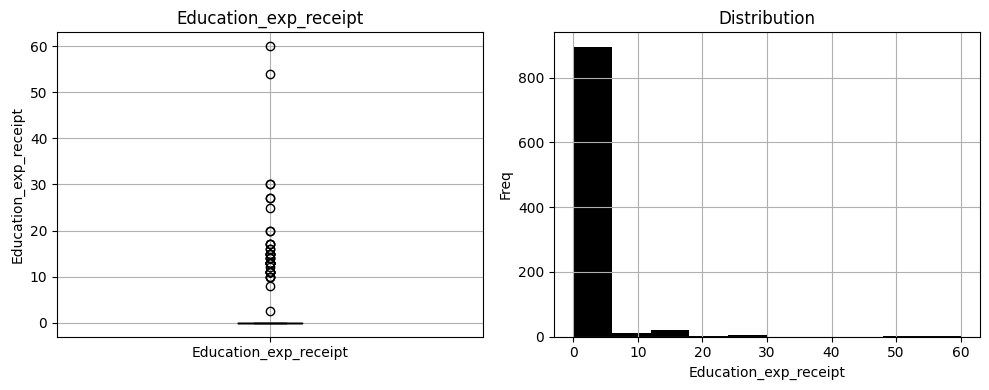

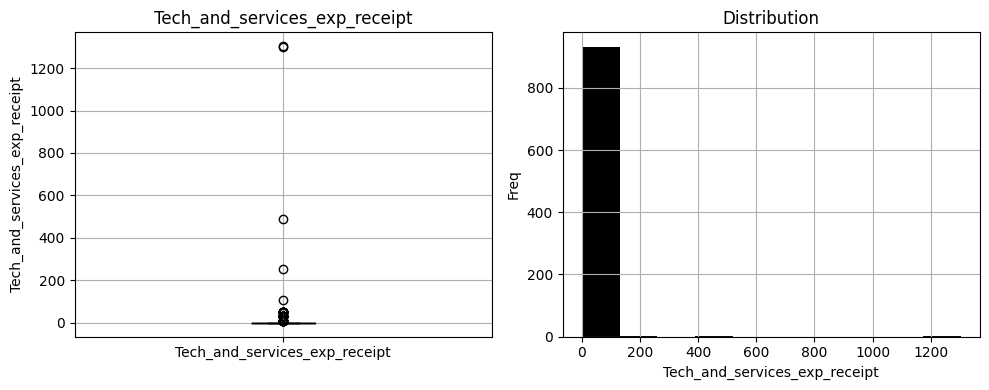

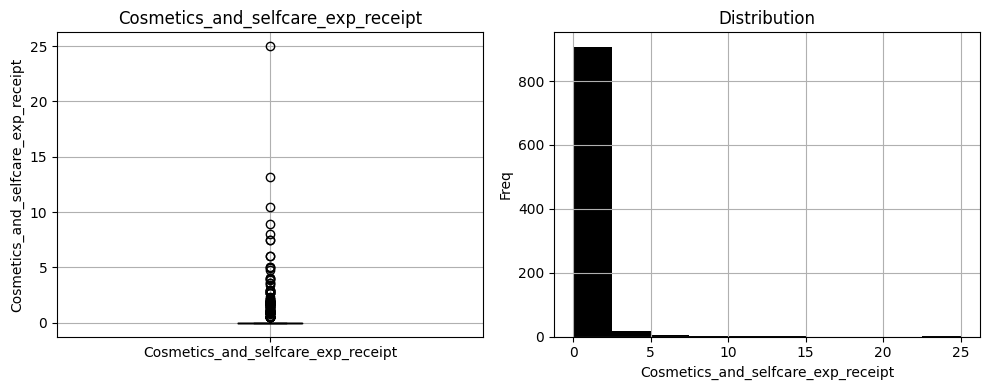

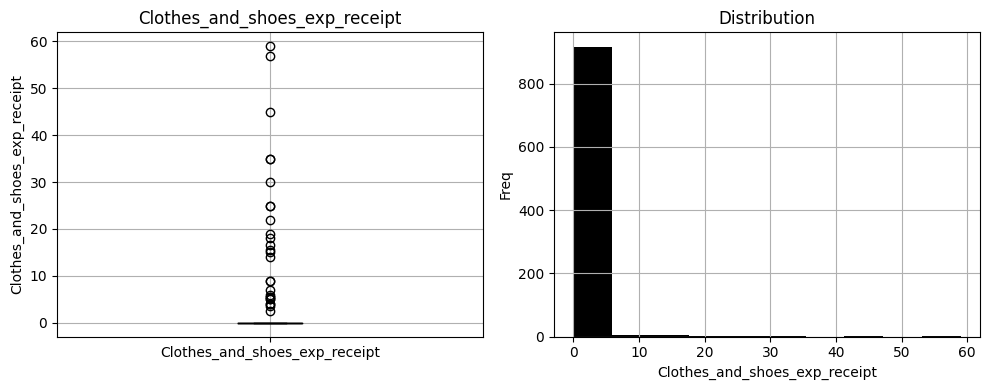

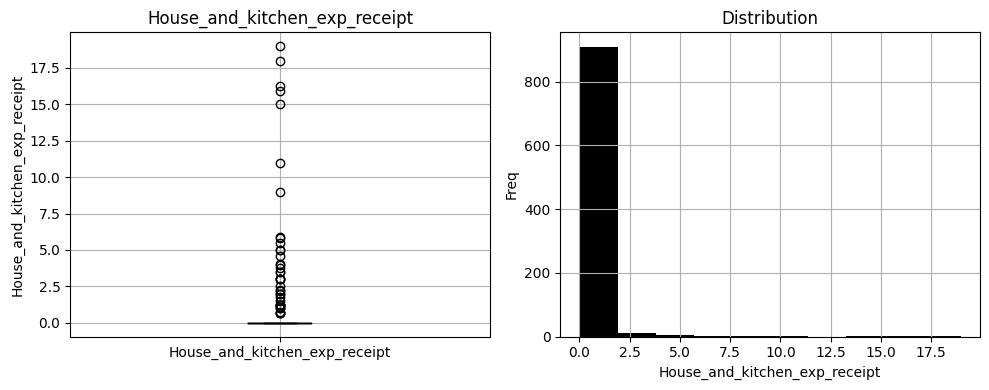

In [18]:
for var in list7:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    plt.tight_layout()

    plt.show()

<p>
The features in this list have a skewed distribution with a clear dominant category, 0. Thus the greater the value is, than zero, the more it appears as an outlier.
</p>

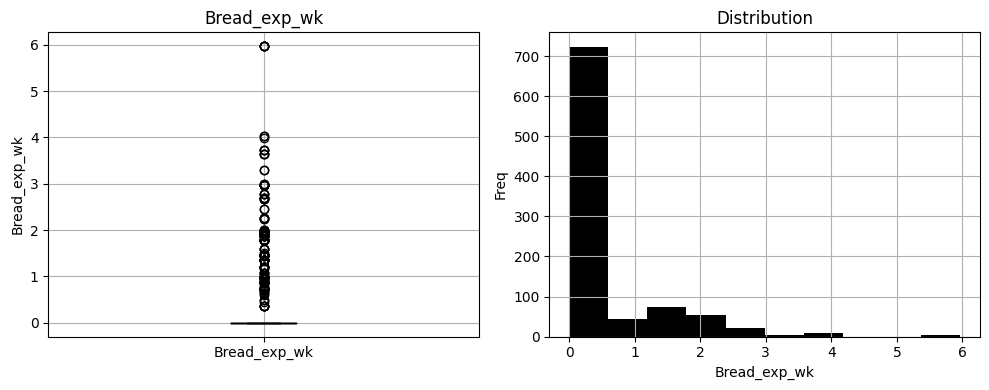

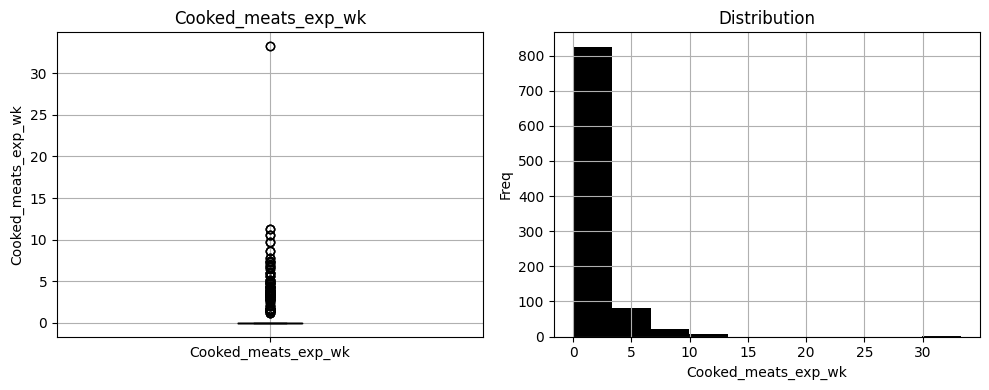

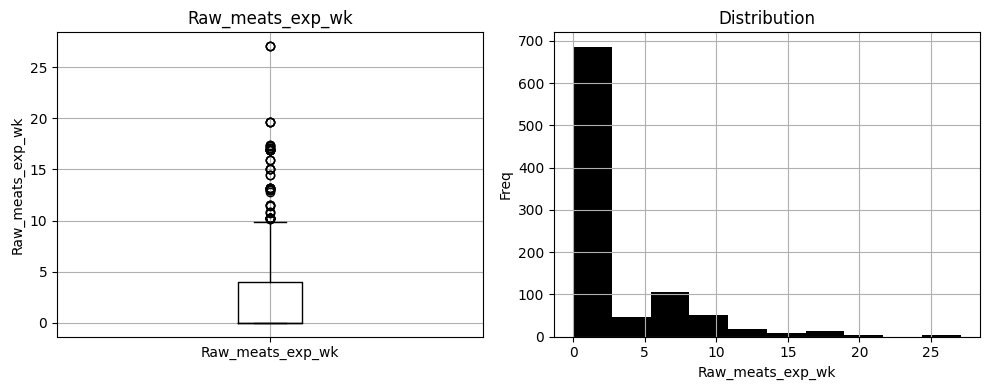

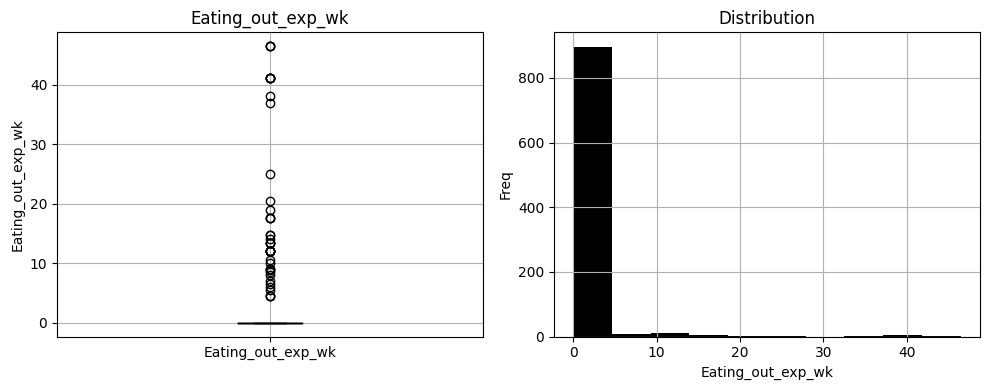

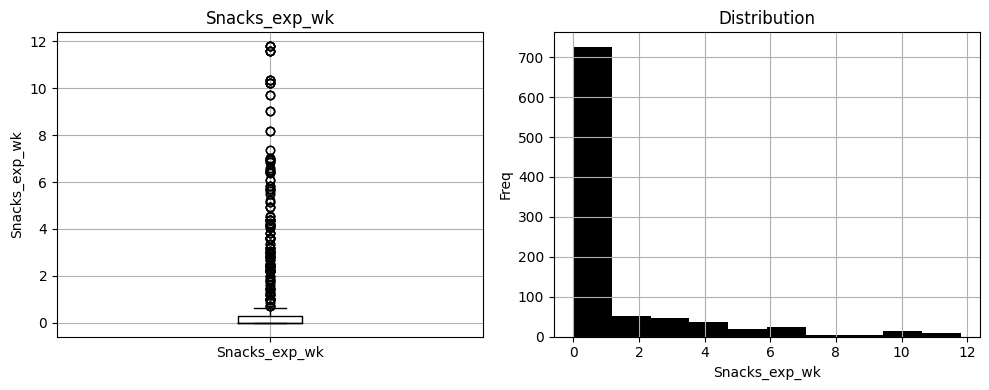

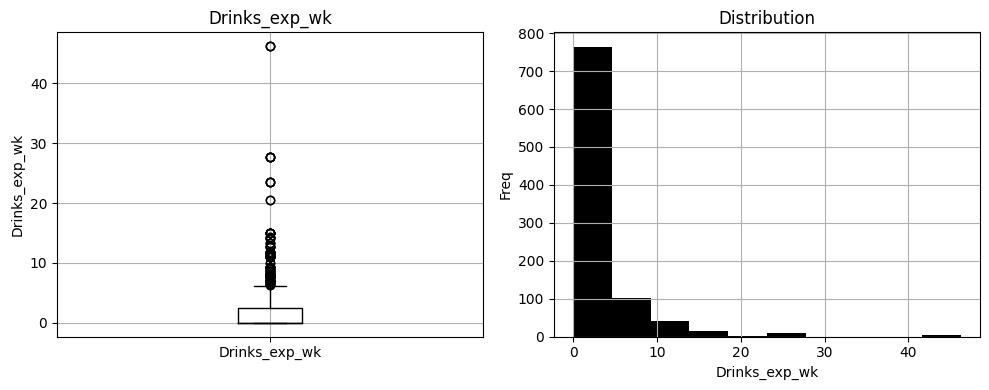

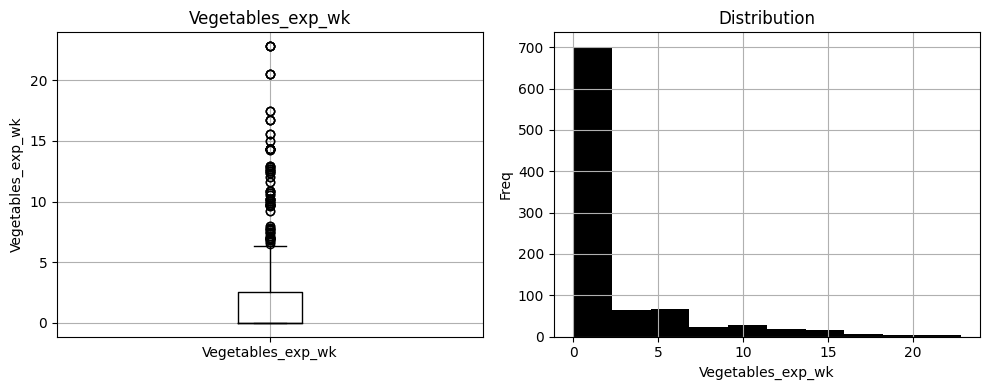

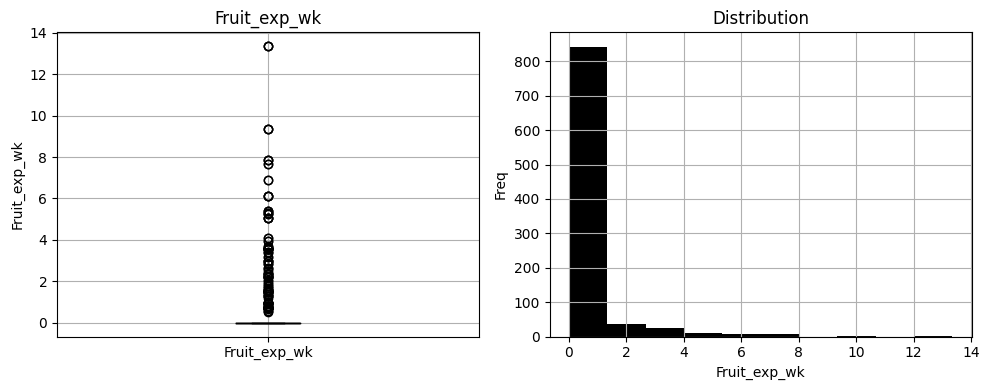

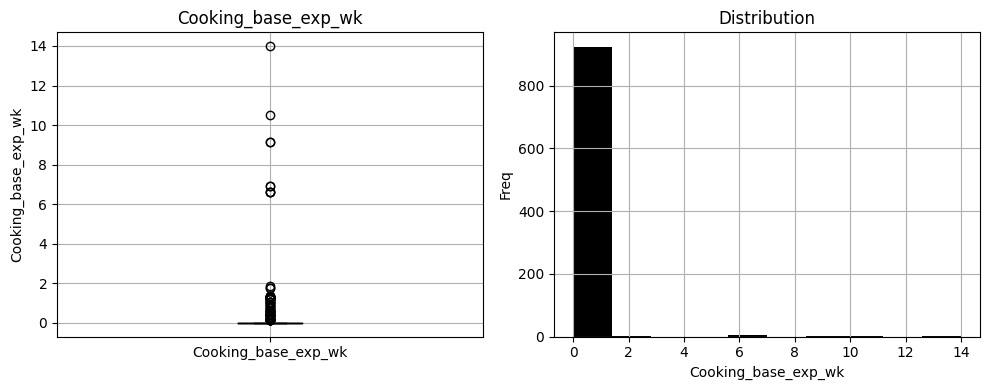

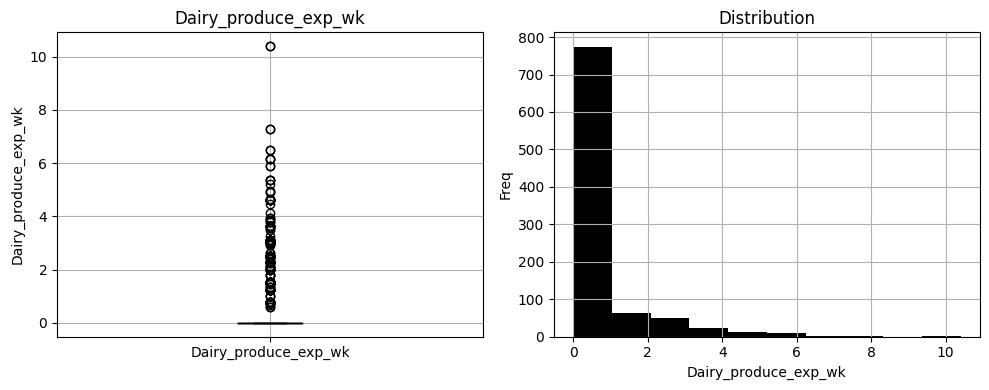

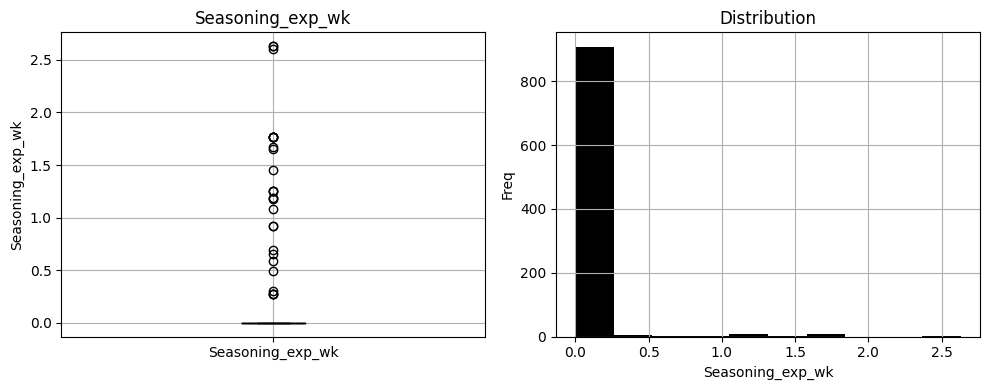

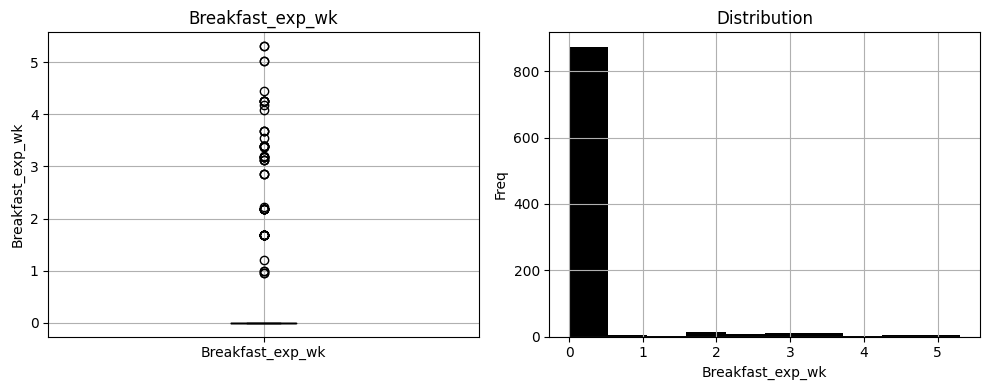

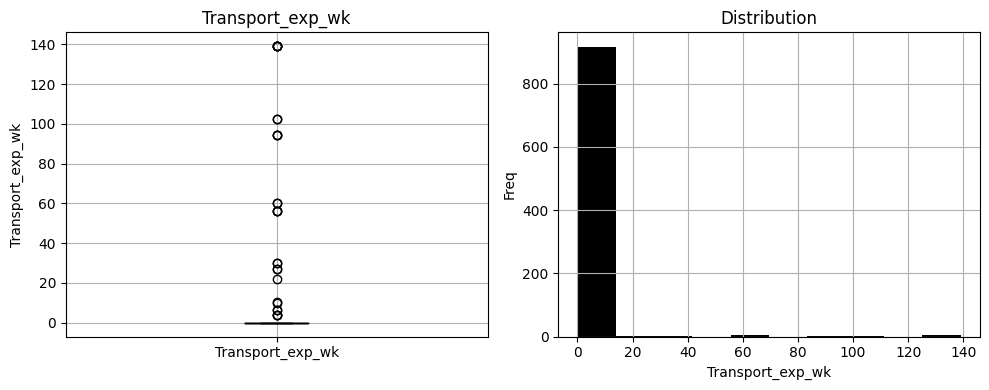

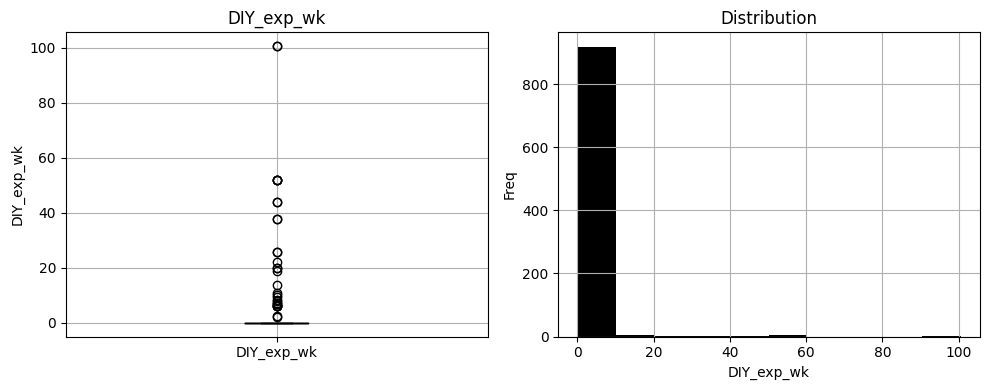

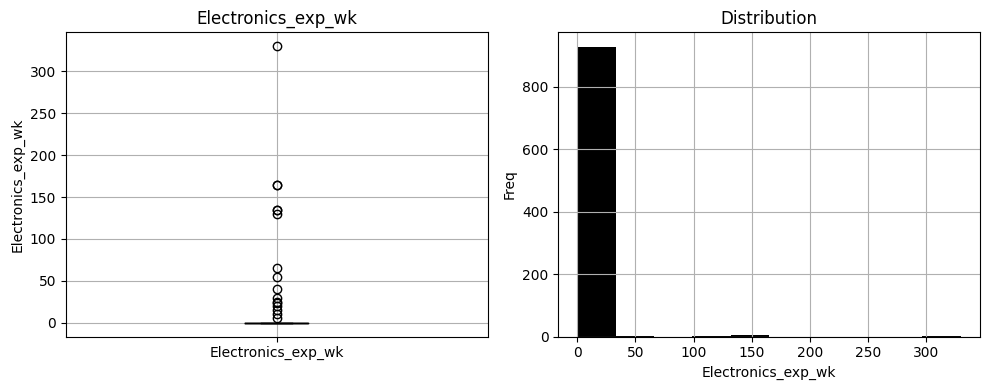

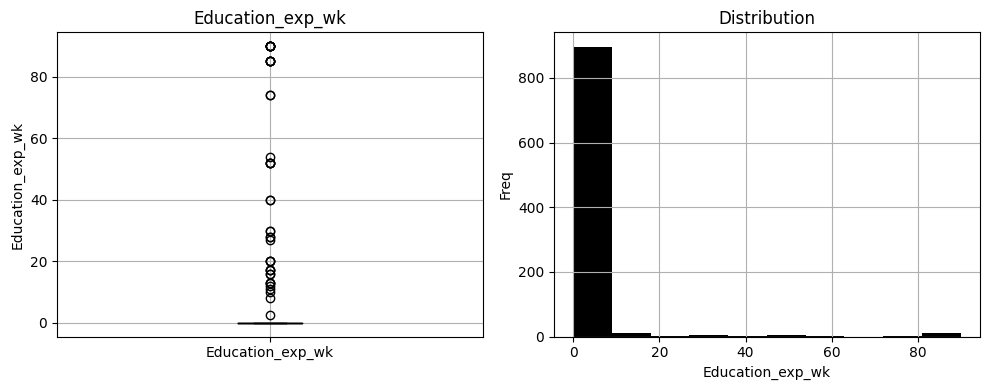

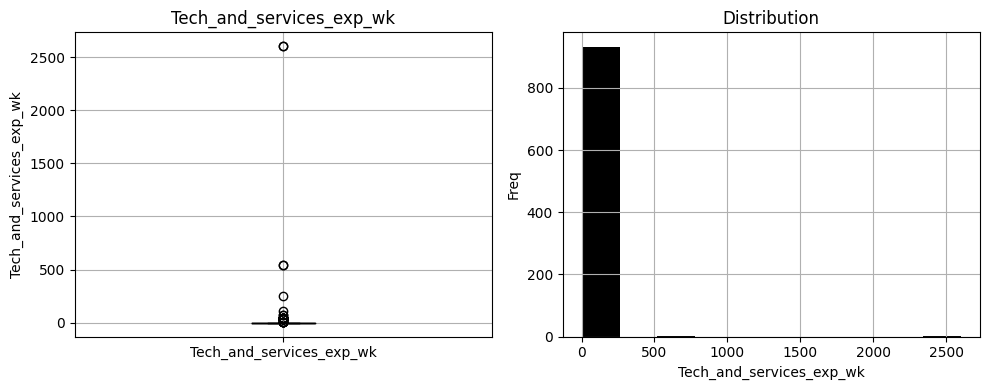

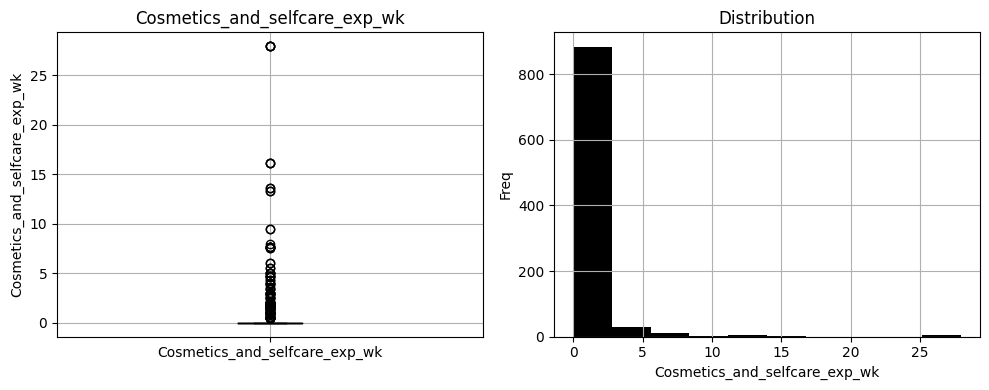

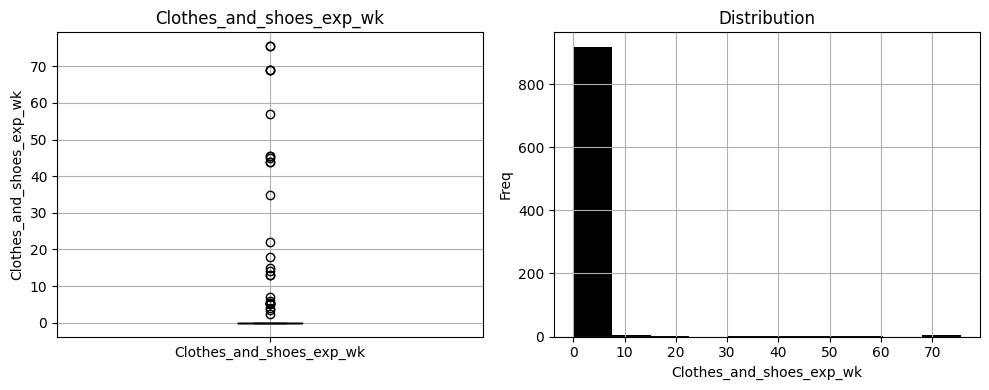

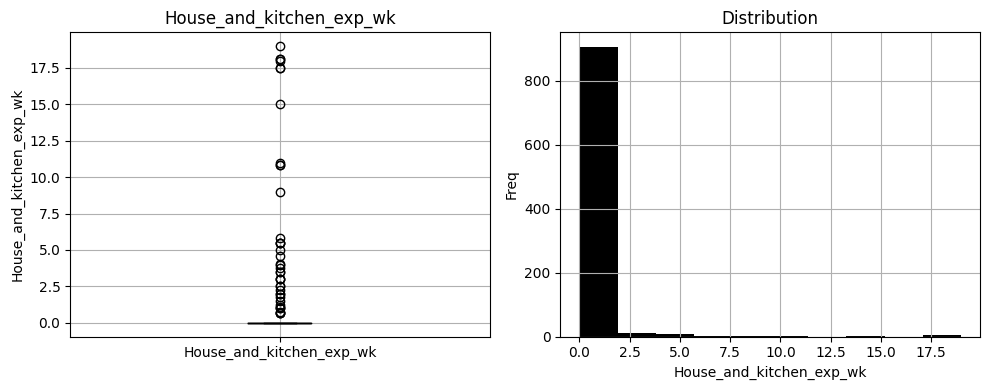

In [19]:
for var in list8:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    plt.tight_layout()

    plt.show()

<p>
The features in thi list have a skewed distribution with a clear dominant category, 0. Thus the greater the value is, than zero, the more it appears as an outlier.
</p>

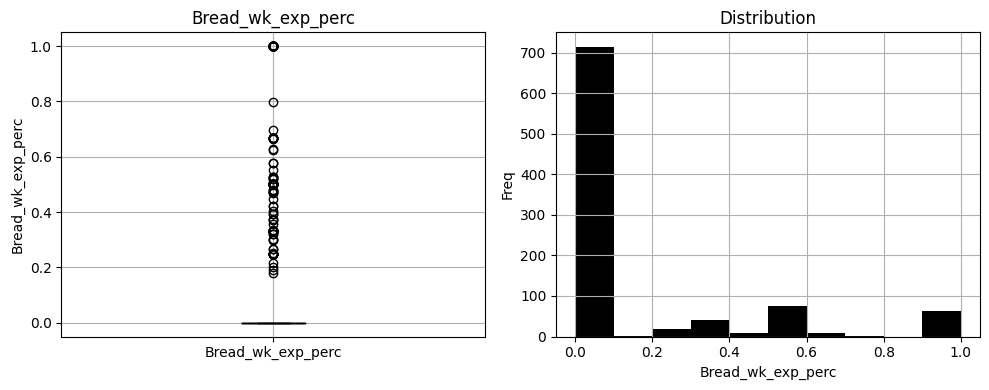

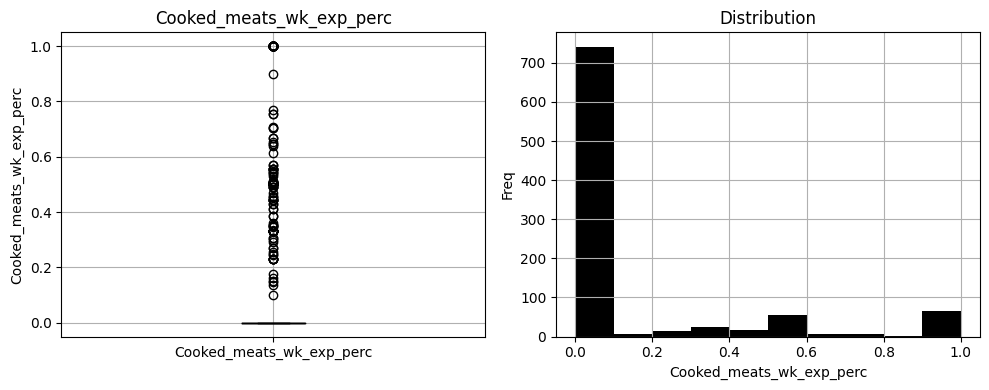

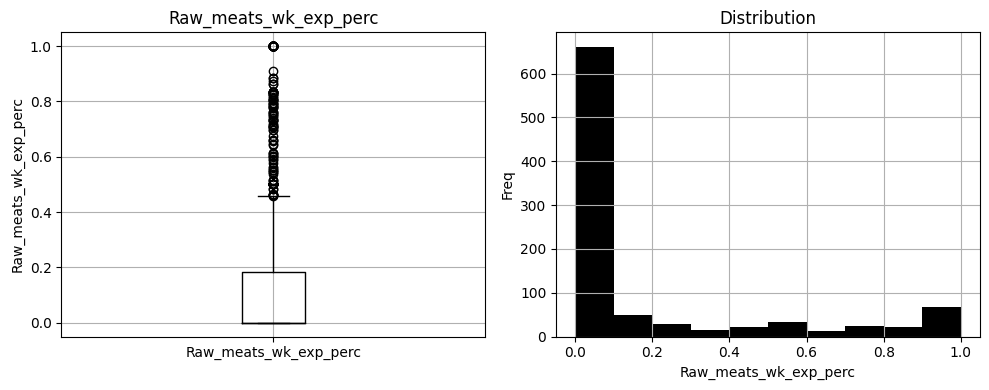

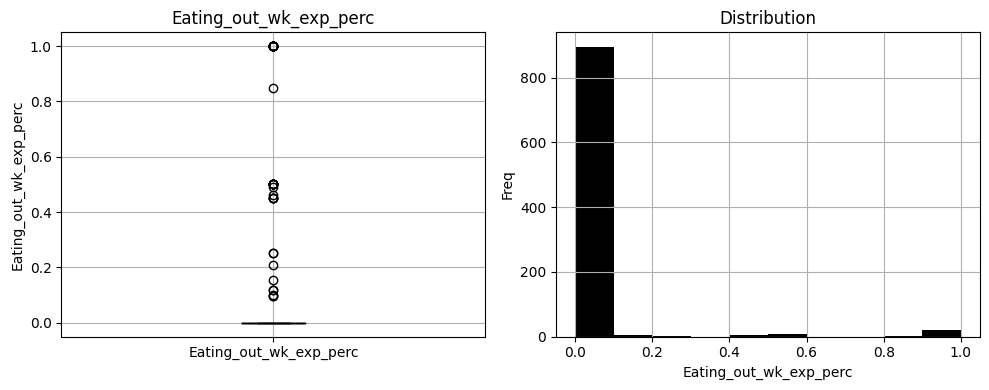

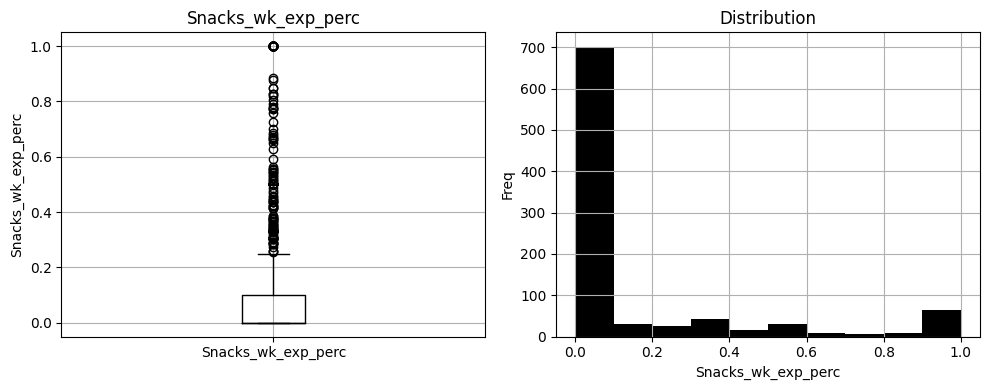

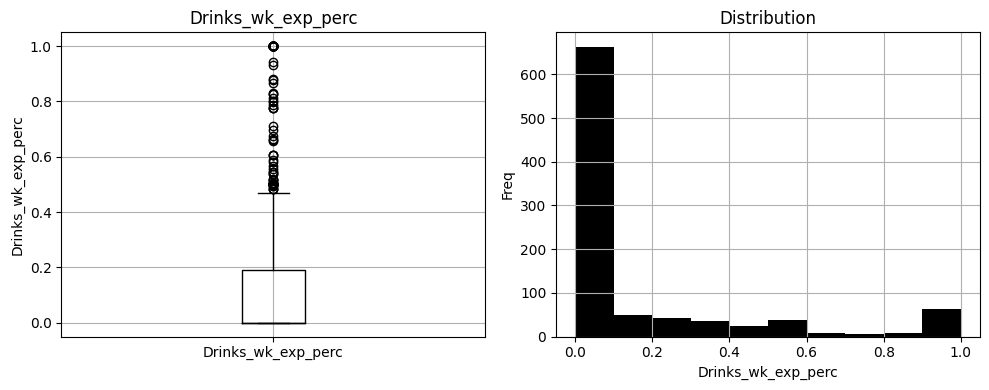

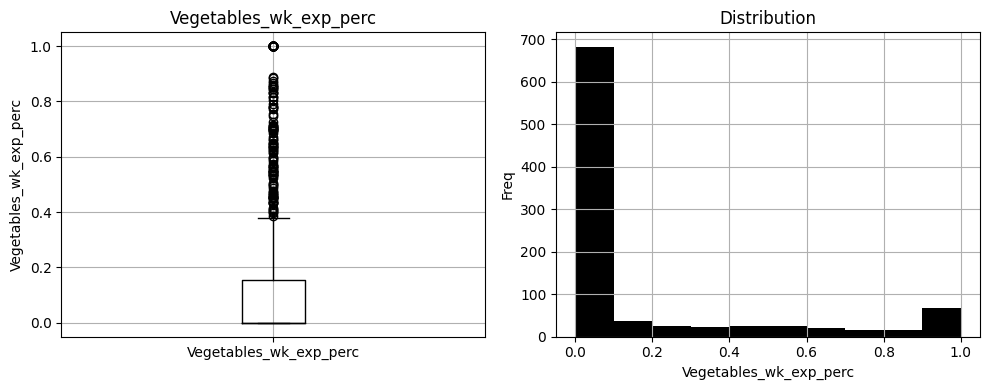

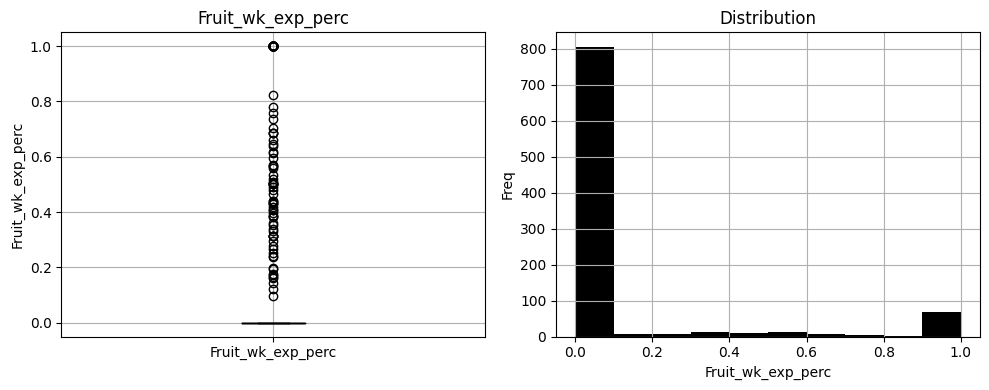

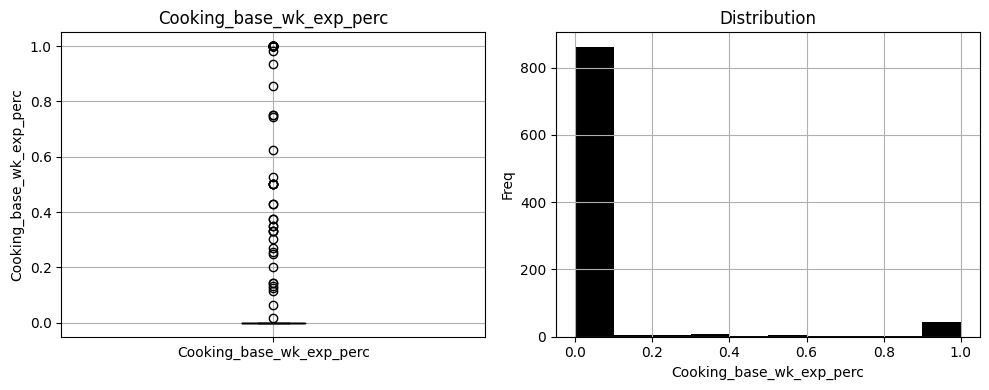

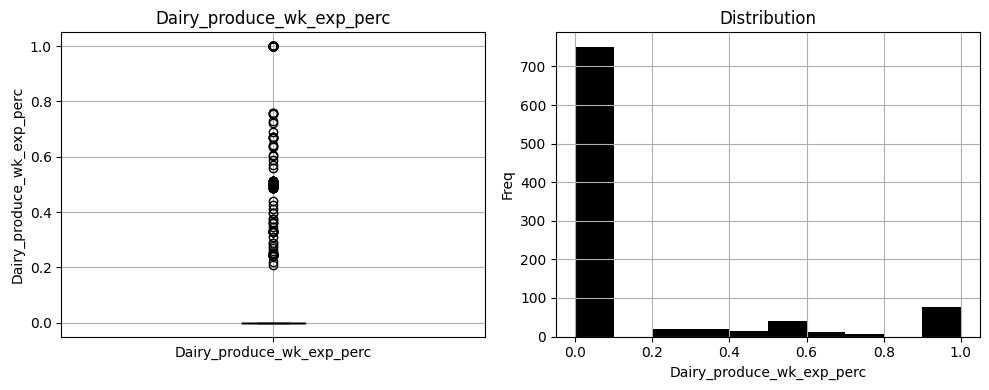

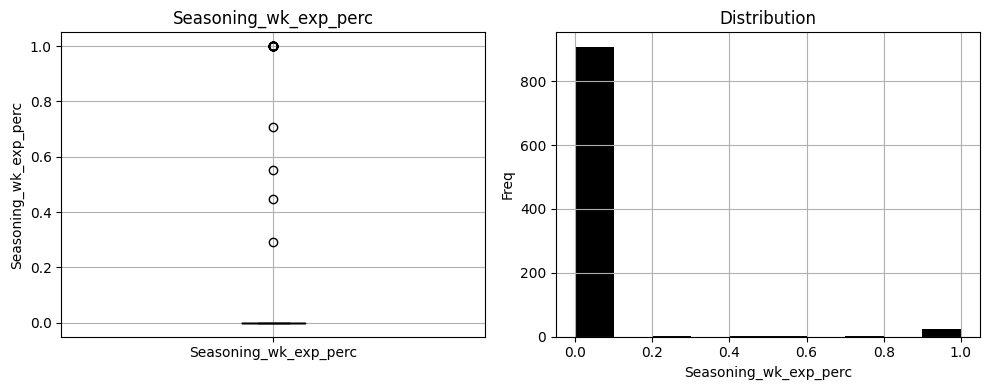

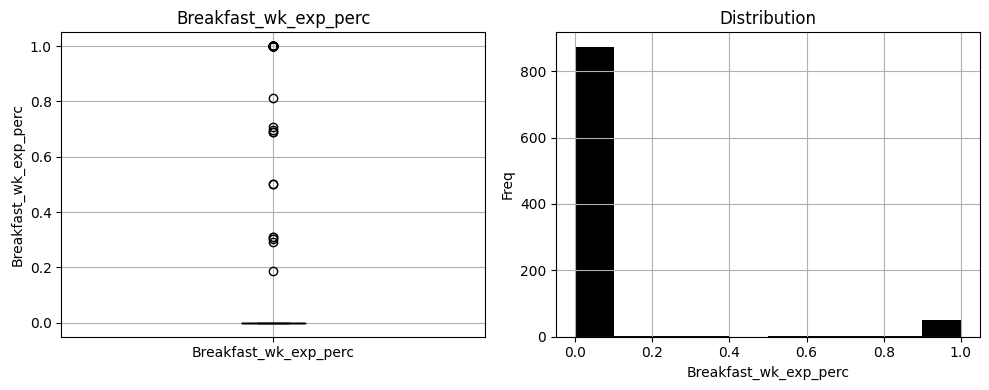

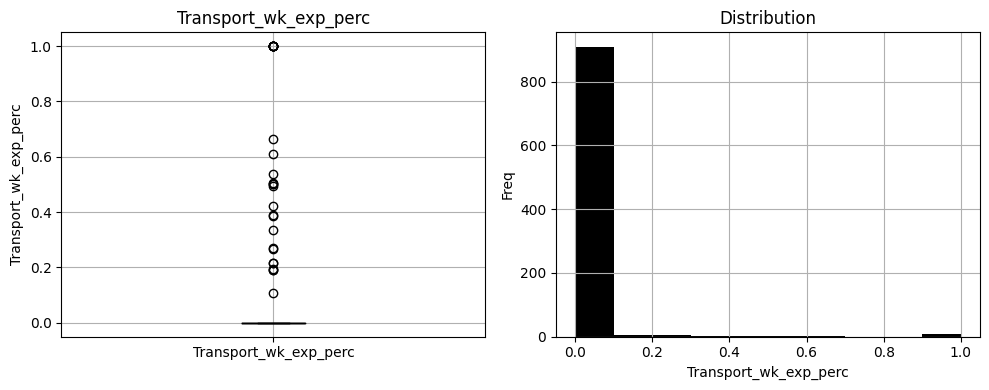

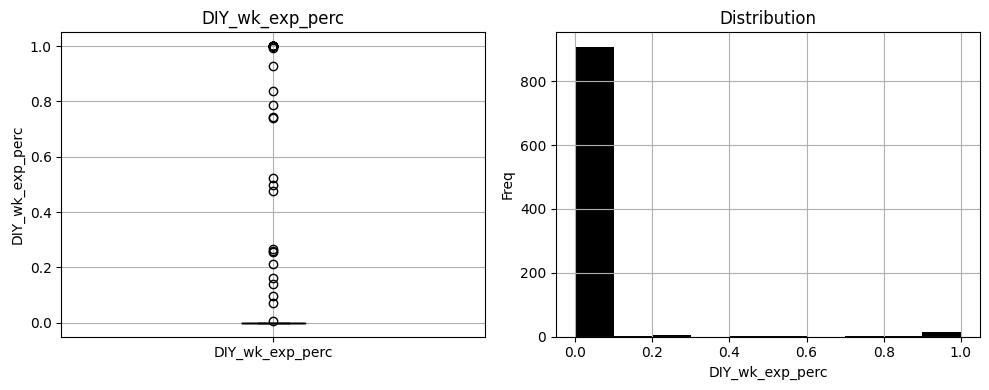

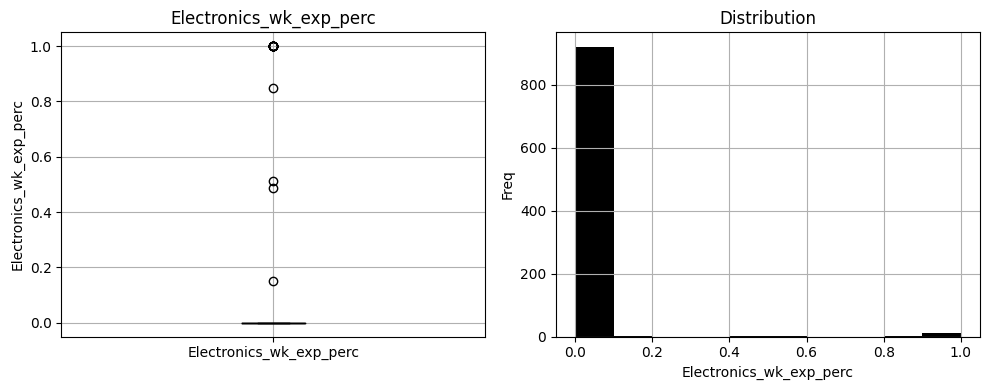

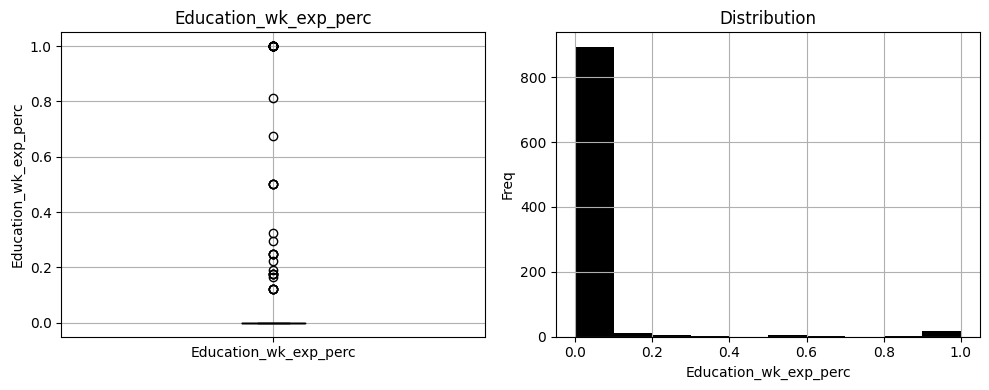

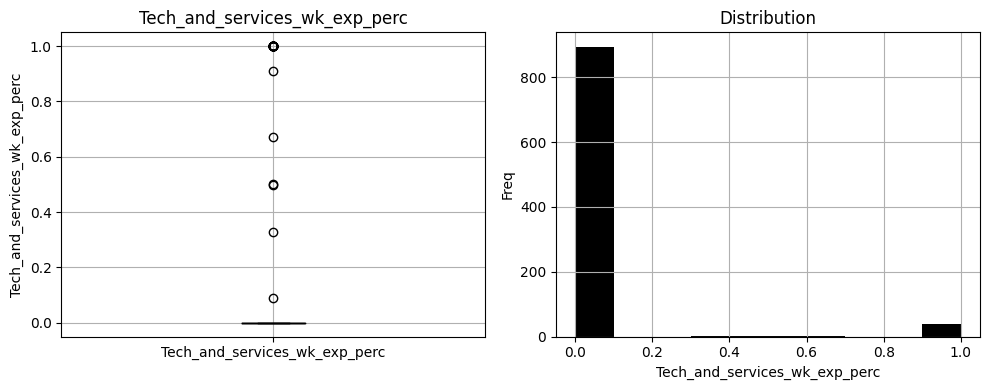

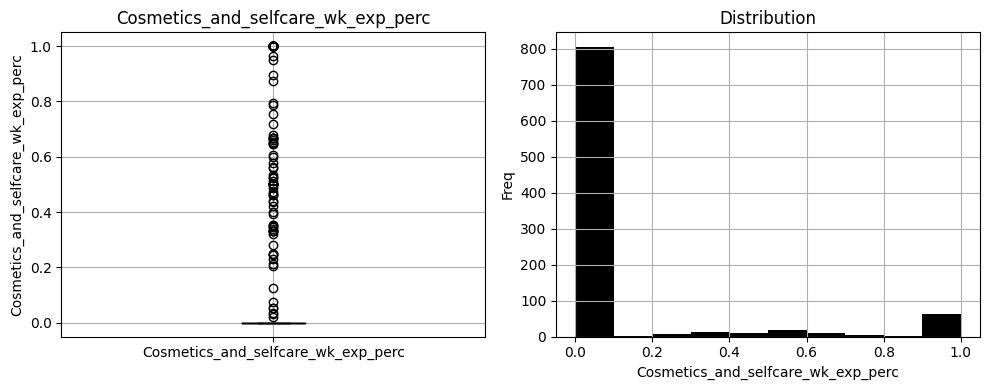

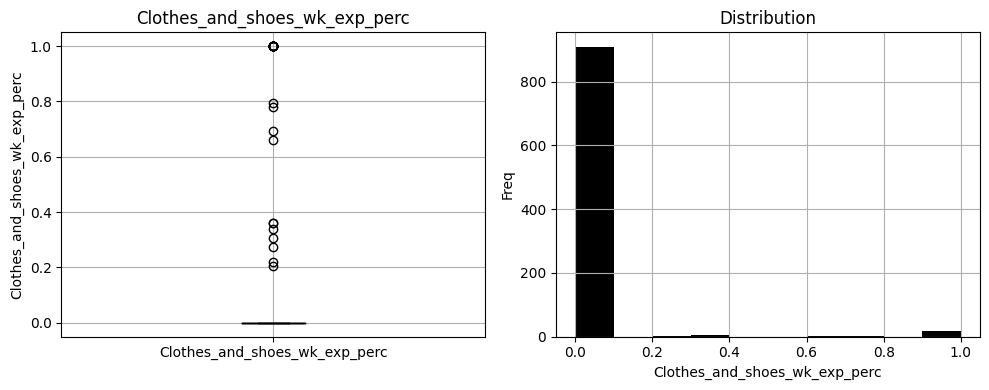

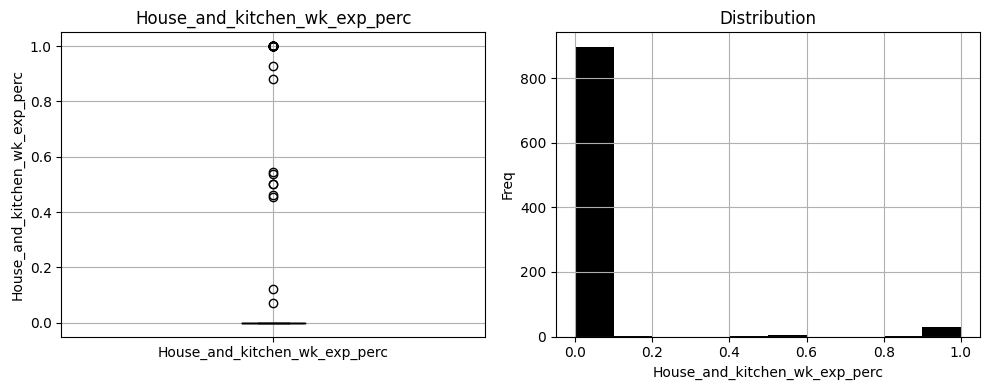

In [20]:
for var in list9:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)   
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    plt.tight_layout()

    plt.show()

<p>
The features in this list have a skewed distribution with a clear dominant category, 0. Thus the greater the value is, than zero, the more it appears as an outlier.
</p>

<h1 style="color: green;">Exploring Relationships between the target and numerical features using correlation</h1>

<h3 style="color: green;">List 1</h3>

In [21]:
raw0[list1].corr()

Total_Price  Expenditure_per_wk
Total_Price             1.00000             0.45401
Expenditure_per_wk      0.45401             1.00000

There is a moderate correlation between Total_price and the target, Expenditure_per_wk.

<h3 style="color: green;">List 2</h3>

In [22]:
lst2_corr = []
for item in list2:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst2_corr.append(item_corr)
    

list2_correlation = pd.DataFrame(lst2_corr, columns=['Feature','Correlation'])
list2_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

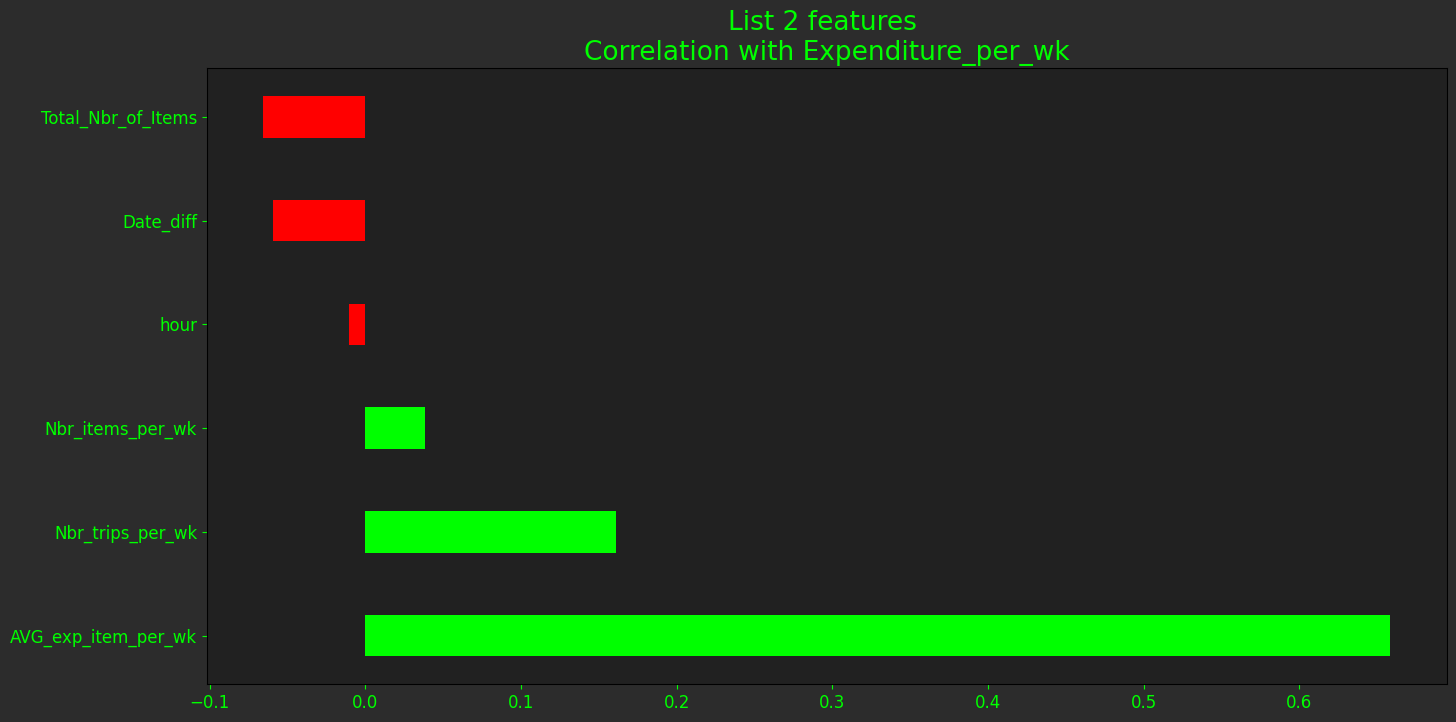

In [23]:
height_ =0.4
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list2_correlation.Correlation > 0


plt.barh(list2_correlation.Feature, 
        list2_correlation.Correlation,
         height=height_,
        color= pos_val.map({True:'lime', False: 'red'}))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("List 2 features \nCorrelation with Expenditure_per_wk", fontsize=19)

plt.show()

<p>
The bar plot above illustrates week correlations with Expenditure_per_wk, in general, with the exception of<br>
AVG_exp_item_per_wk
</p>

<h3 style="color: green;">List 3</h3>

In [24]:
lst3_corr = []
for item in list3:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst3_corr.append(item_corr)
    

list3_correlation = pd.DataFrame(lst3_corr, columns=['Feature','Correlation'])
list3_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

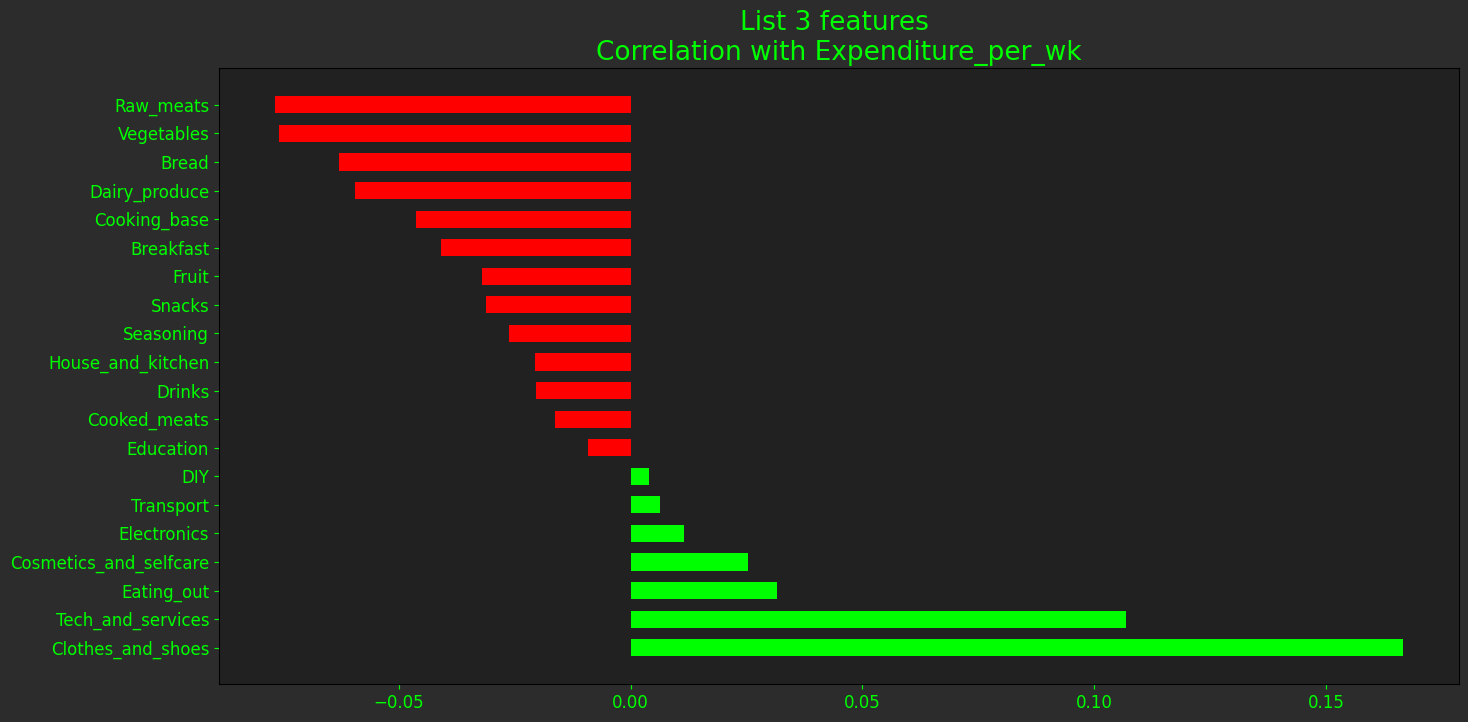

In [25]:
height_=0.6
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list3_correlation.Correlation > 0

plt.barh(list3_correlation.Feature, 
        list3_correlation.Correlation, 
        color= pos_val.map({True:'lime', False: 'red'}),
        height=height_)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("List 3 features \nCorrelation with Expenditure_per_wk", fontsize=19)

plt.show()

<p>
The bar chart above illustrates week correlations between receipt frequencies of product types<br>
and Expenditure_per_wk.
</p>

<h3 style="color: green;">List 4</h3>

In [26]:
lst4_corr = []
for item in list4:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst4_corr.append(item_corr)
    

list4_correlation = pd.DataFrame(lst4_corr, columns=['Feature','Correlation'])
list4_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

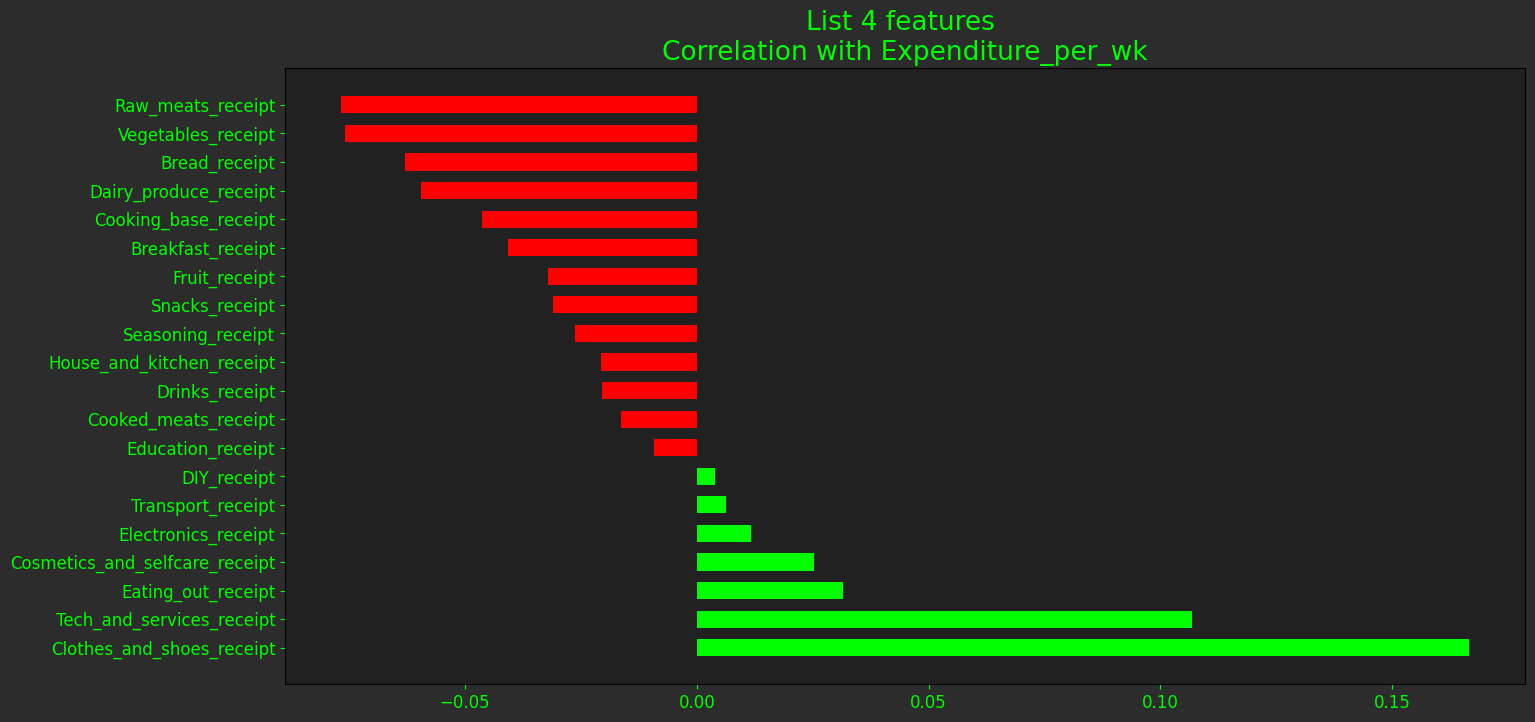

In [27]:
height_=0.6
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list4_correlation.Correlation > 0

plt.barh(list4_correlation.Feature, 
        list4_correlation.Correlation, 
        color=pos_val.map({True:'lime', False: 'red'}),
         height=height_
        )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("List 4 features \nCorrelation with Expenditure_per_wk", fontsize=19)
plt.show()

<p>
The bar chart above illustrated weak correlation between receipt level product type features and Expenditure_per_wk<br>
This is expected.
</p>

<h3 style="color: green;">List 5</h3>

In [28]:
lst5_corr = []
for item in list5:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst5_corr.append(item_corr)
    

list5_correlation = pd.DataFrame(lst5_corr, columns=['Feature','Correlation'])
list5_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

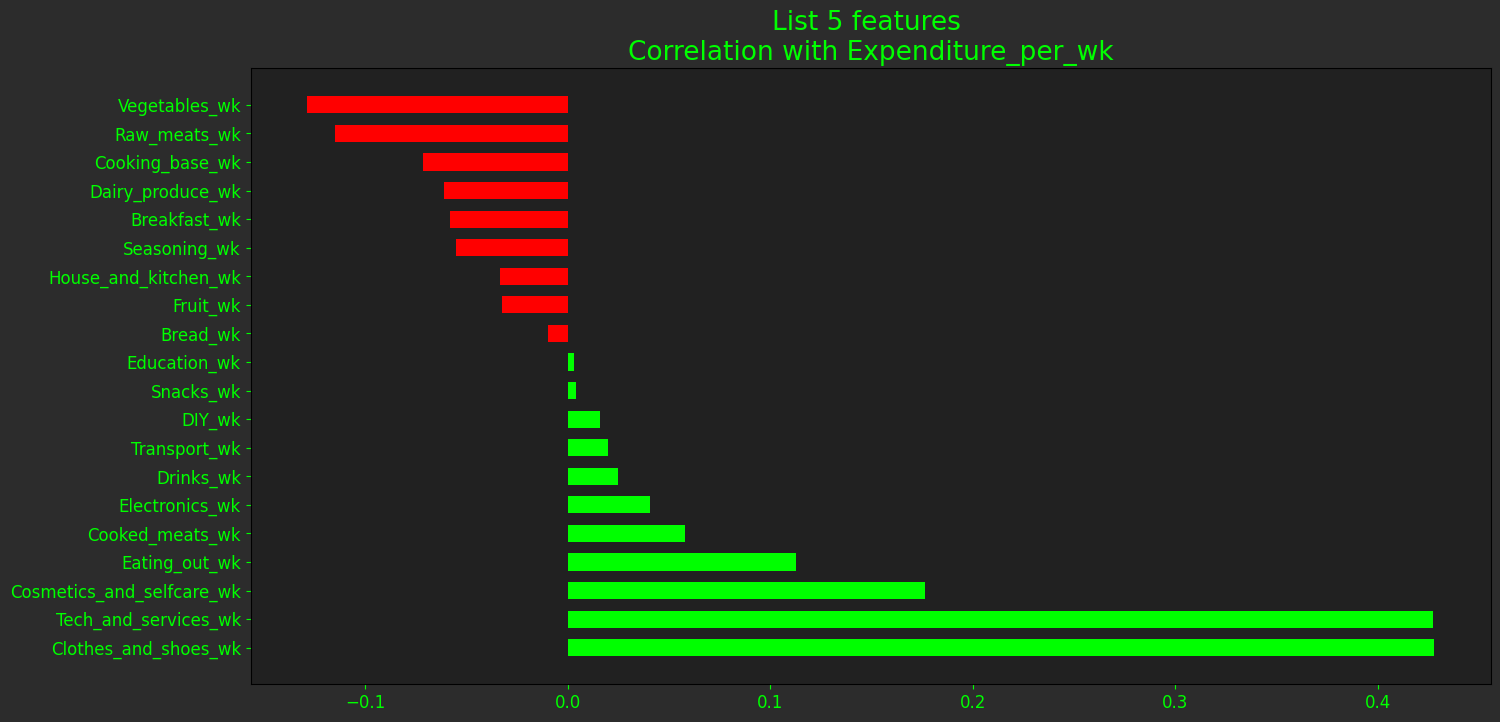

In [29]:
height=0.4
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list5_correlation.Correlation > 0

plt.barh(list5_correlation.Feature, 
        list5_correlation.Correlation, 
        color=pos_val.map({True:'lime', False: 'red'}),
         height=height_
        )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("List 5 features \nCorrelation with Expenditure_per_wk", fontsize=19)
plt.show()

<p>
As can be seen a few weekly product type features seem to have moderate correlations with Expenditure_per_wk.<br>
This is understandable as they are weekly summaries.

</p>

<h3 style="color: green;">List 6</h3>

In [30]:
lst6_corr = []
for item in list6:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst6_corr.append(item_corr)
    

list6_correlation = pd.DataFrame(lst6_corr, columns=['Feature','Correlation'])
list6_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

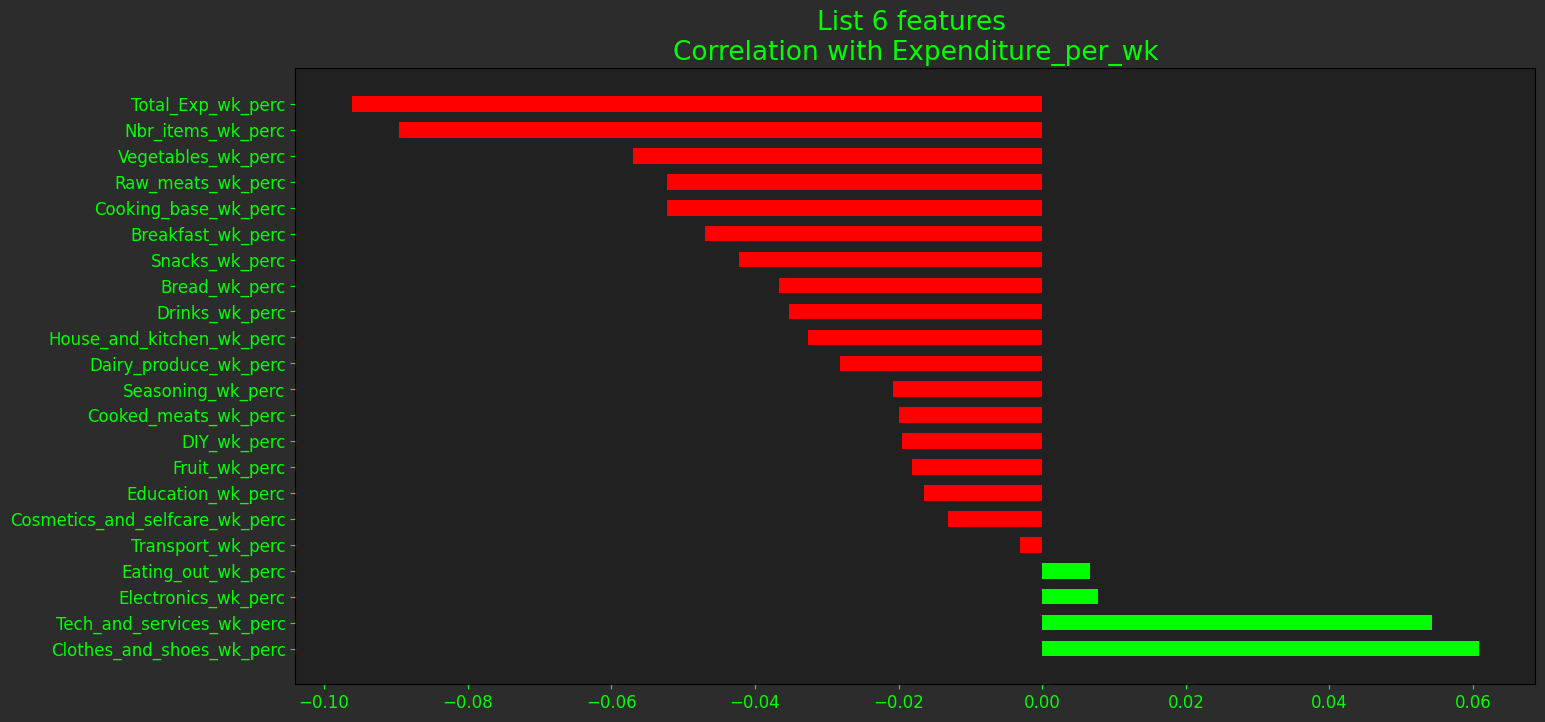

In [31]:
height=0.6
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list6_correlation.Correlation > 0

plt.barh(list6_correlation.Feature, 
        list6_correlation.Correlation, 
        color=pos_val.map({True:'lime', False: 'red'}),
         height=height_
        )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("List 6 features \nCorrelation with Expenditure_per_wk", fontsize=19)
plt.show()

<p>
The bar chart above illustrates week correlation between List 6 features and Expenditure_per_wk.<br>
At first glance this seems odd as List6 is weekly features; however, they are percentages not absolute values.
</p>

<h3 style="color: green;">List 7</h3>

In [32]:
lst7_corr = []
for item in list7:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst7_corr.append(item_corr)
    

list7_correlation = pd.DataFrame(lst7_corr, columns=['Feature','Correlation'])
list7_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

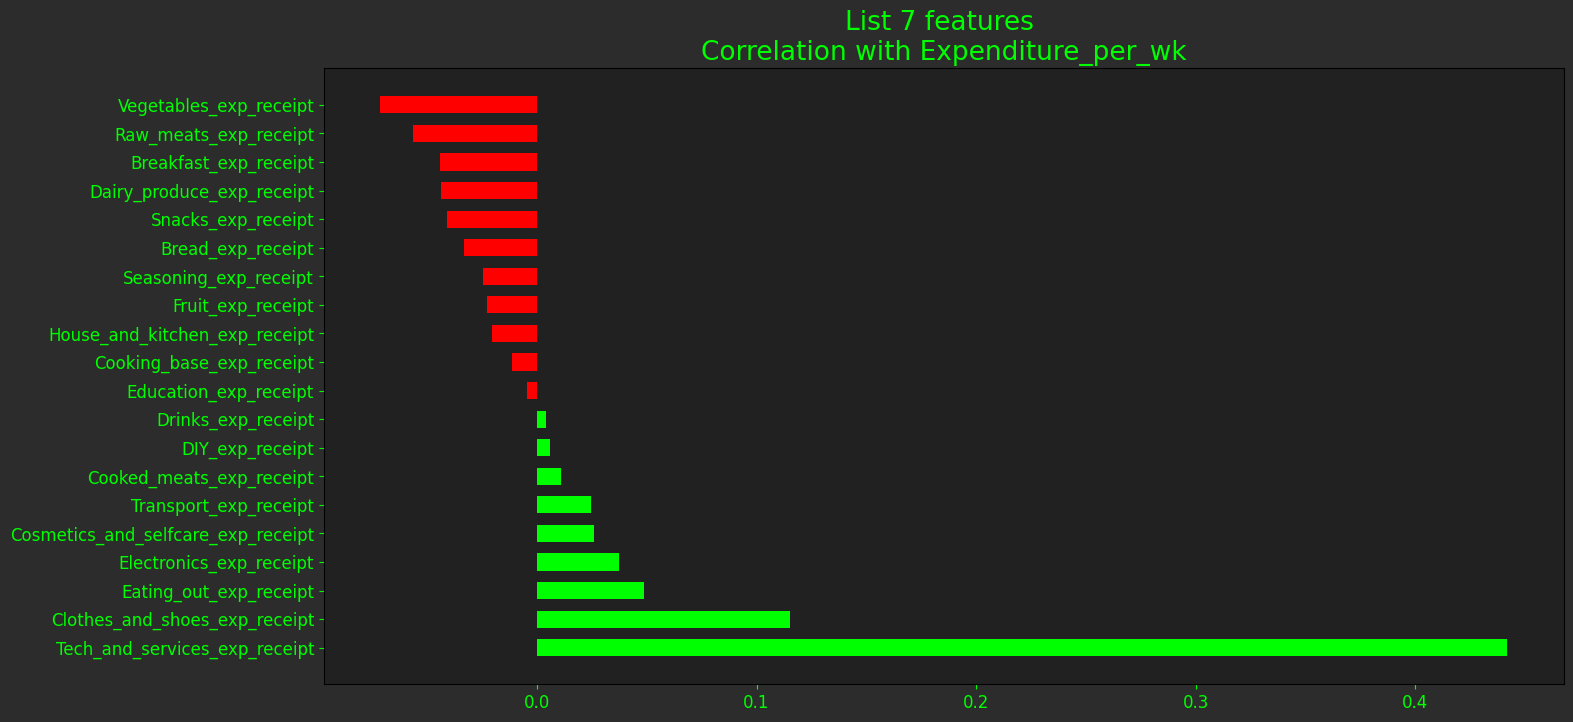

In [33]:
height=0.6
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list7_correlation.Correlation > 0

plt.barh(list7_correlation.Feature, 
        list7_correlation.Correlation, 
        color=pos_val.map({True:'lime', False: 'red'}),
         height=height_
        )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("List 7 features \nCorrelation with Expenditure_per_wk", fontsize=19)
plt.show()

<p>
The bar chart above illustrates weak correlation between List 7 features, receipt product type expenditure and<br>
Expenditure_per_wk with the exception of Tech_and_services_exp_receipt which has a moderate correlation.
</p>

<h3 style="color: green;">List 8</h3>

In [34]:
lst8_corr = []
for item in list8:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst8_corr.append(item_corr)
    

list8_correlation = pd.DataFrame(lst8_corr, columns=['Feature','Correlation'])
list8_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

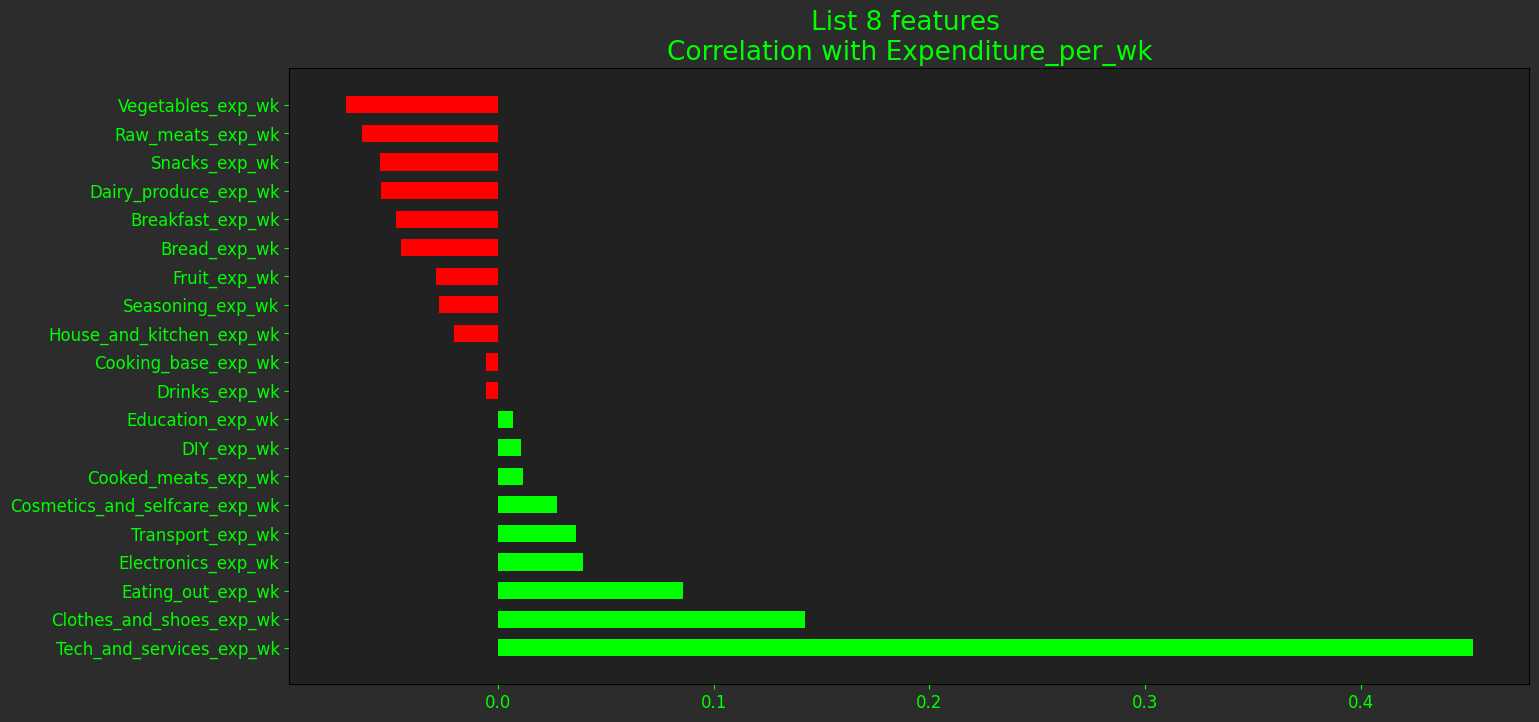

In [35]:
height=0.6
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list8_correlation.Correlation > 0

plt.barh(list8_correlation.Feature, 
        list8_correlation.Correlation, 
        color=pos_val.map({True:'lime', False: 'red'}),
         height=height_
        )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("List 8 features \nCorrelation with Expenditure_per_wk", fontsize=19)
plt.show()

<p>
The bar chart above illustrates weak correlation between List 8 features, product type week expenditure and<br>
Expenditure_per_wk with the exception of Tech_and_services_exp_wk which has a moderate correlation.
</p>

<h3 style="color: green;">List 9</h3>

In [36]:
lst9_corr = []
for item in list9:
    lst = []
    item_corr = []
    
    item_corr.append(item)
    
    lst = ['Expenditure_per_wk', item]
        
    corro_ = raw0[lst].corr()
    item_corr.append(corro_.iloc[0,1])
    
    lst9_corr.append(item_corr)
    

list9_correlation = pd.DataFrame(lst9_corr, columns=['Feature','Correlation'])
list9_correlation.sort_values(by=['Correlation'], ascending=False, inplace=True)   

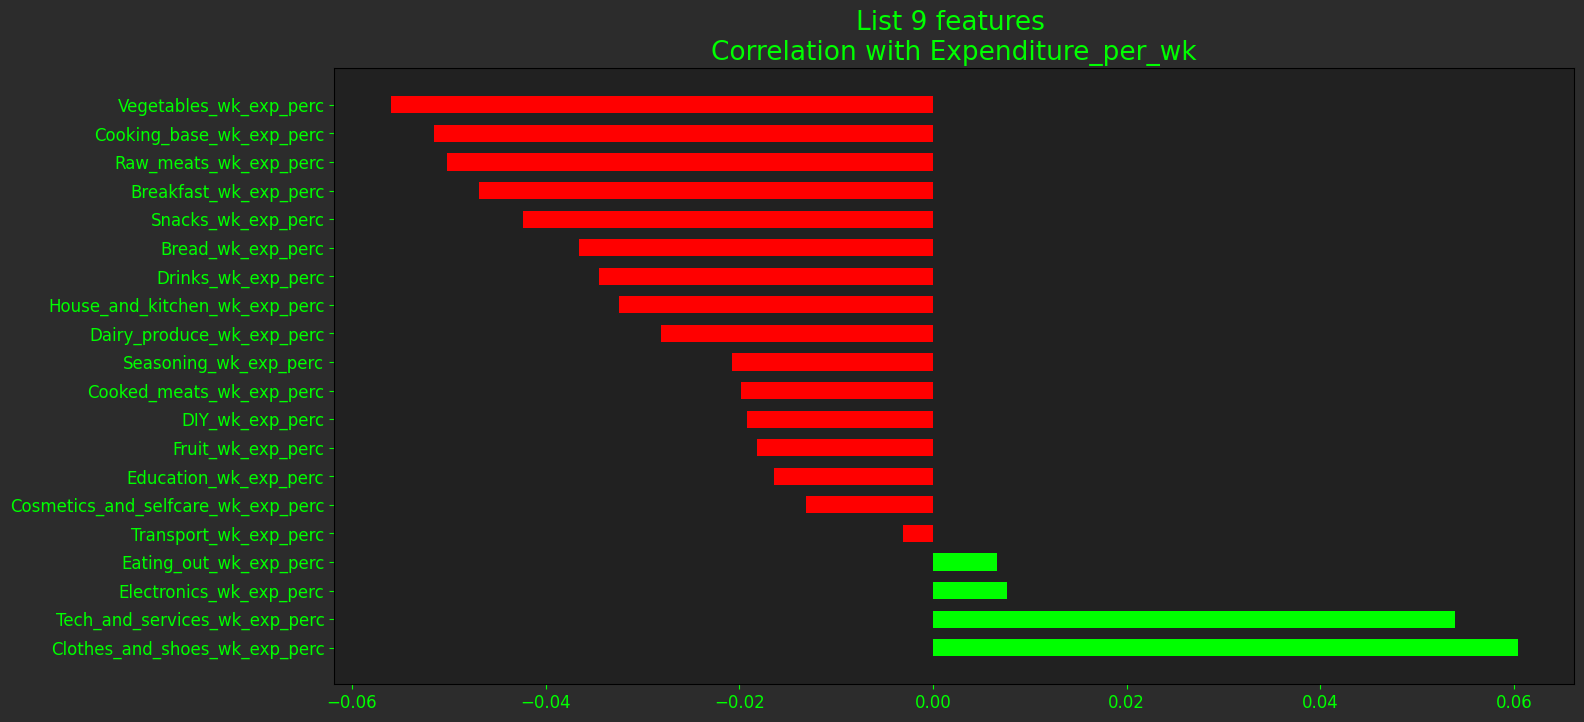

In [37]:
height=0.6
# Plotting the correlation with Expenditure_per_wk
# Plotting the correlation with Expenditure_per_wk
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

pos_val = list9_correlation.Correlation > 0

plt.barh(list9_correlation.Feature, 
        list9_correlation.Correlation, 
        color=pos_val.map({True:'lime', False: 'red'}),
         height=height_
        )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("List 9 features \nCorrelation with Expenditure_per_wk", fontsize=19)
plt.show()

<p>
The plot above illustrates very weak correlation between List 9 features, weekly expenditure percentage<br>
by product type with Expenditure_per_wk.
</p>

<h1 style="color: green;">Exploring categorical features</h1>

In [38]:
cat_feats

['Venue', 'Payment_Type', 'Card_Source', 'Week_day_name', 'Part_of_day']

<h3 style="color: green;">Frequency distributions of categorical features</h3>

In [39]:
for var in cat_feats:
    print(var + "\n",raw0[var].value_counts(normalize=True), "\n\n")

Venue
 Aldi                  0.262821
Asda                  0.120726
Sainsbury             0.092949
Yours Supermarket     0.068376
Tesco                 0.047009
                        ...   
Laptops with linux    0.001068
Apple                 0.001068
Angies Fish Bar       0.001068
Stabana               0.001068
CO-OP                 0.001068
Name: Venue, Length: 69, dtype: float64 


Payment_Type
 Card    0.923077
Cash    0.073718
Plan    0.003205
Name: Payment_Type, dtype: float64 


Card_Source
 Contactless    0.733974
DD             0.085470
0              0.076923
DB             0.063034
Pin            0.039530
Transfer       0.001068
Name: Card_Source, dtype: float64 


Week_day_name
 Saturday     0.188034
Monday       0.170940
Wednesday    0.147436
Tuesday      0.137821
Thursday     0.131410
Friday       0.129274
Sunday       0.095085
Name: Week_day_name, dtype: float64 


Part_of_day
 Afternoon     0.486111
Morning       0.330128
Evening       0.129274
Early         0.029915

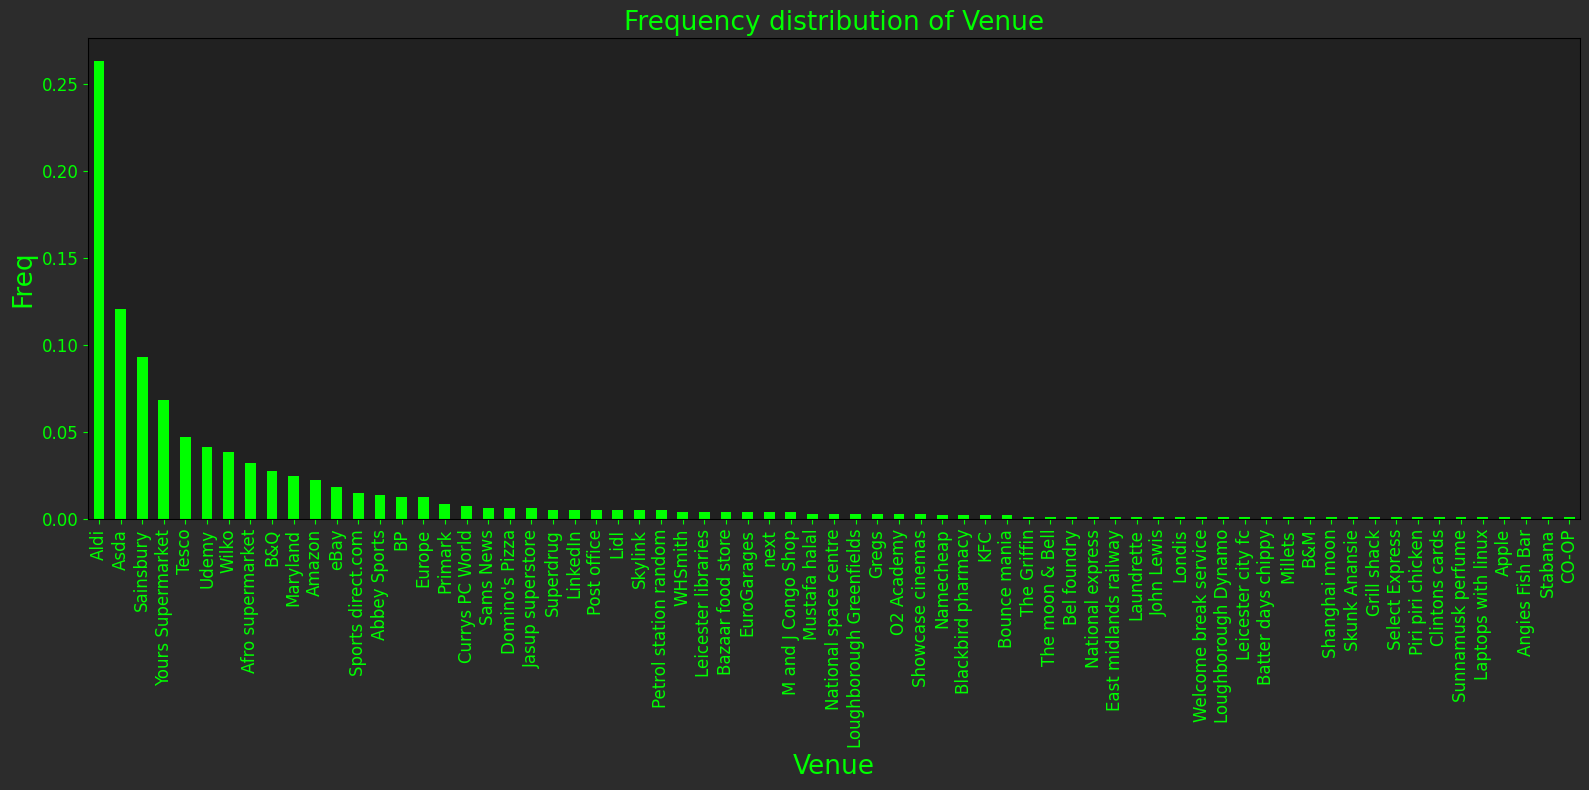

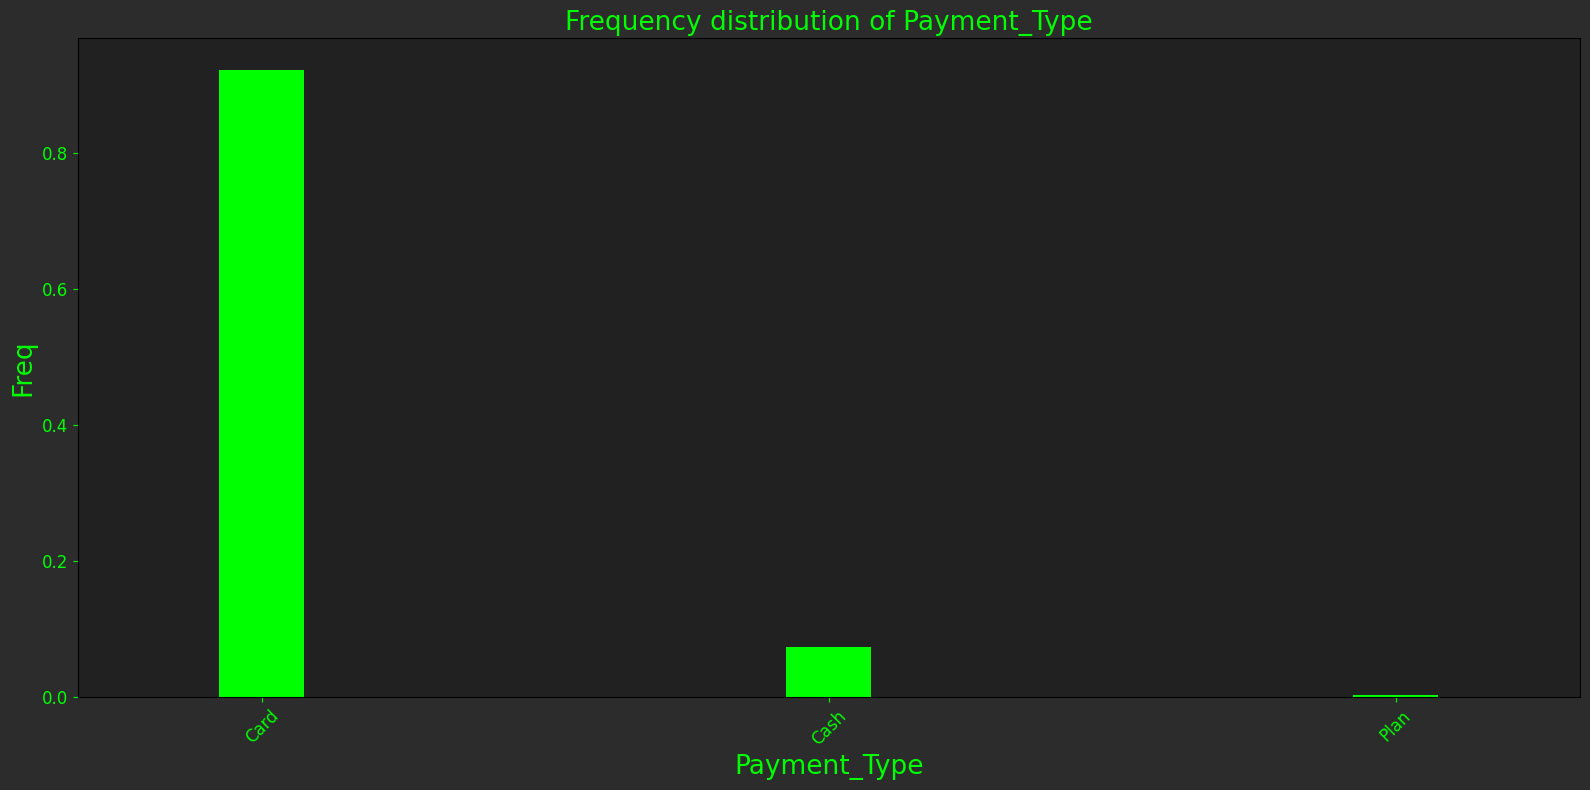

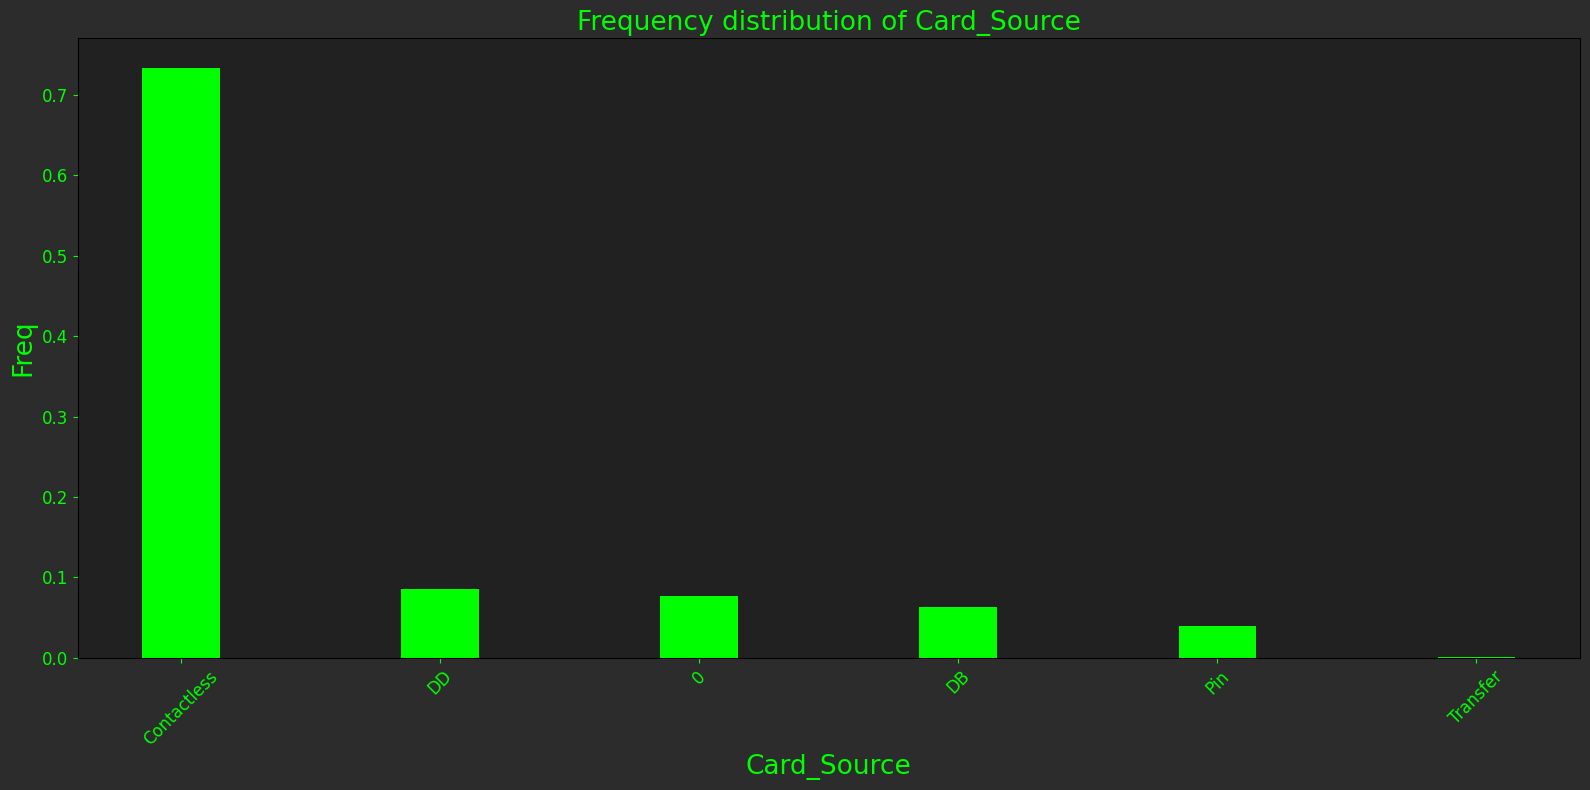

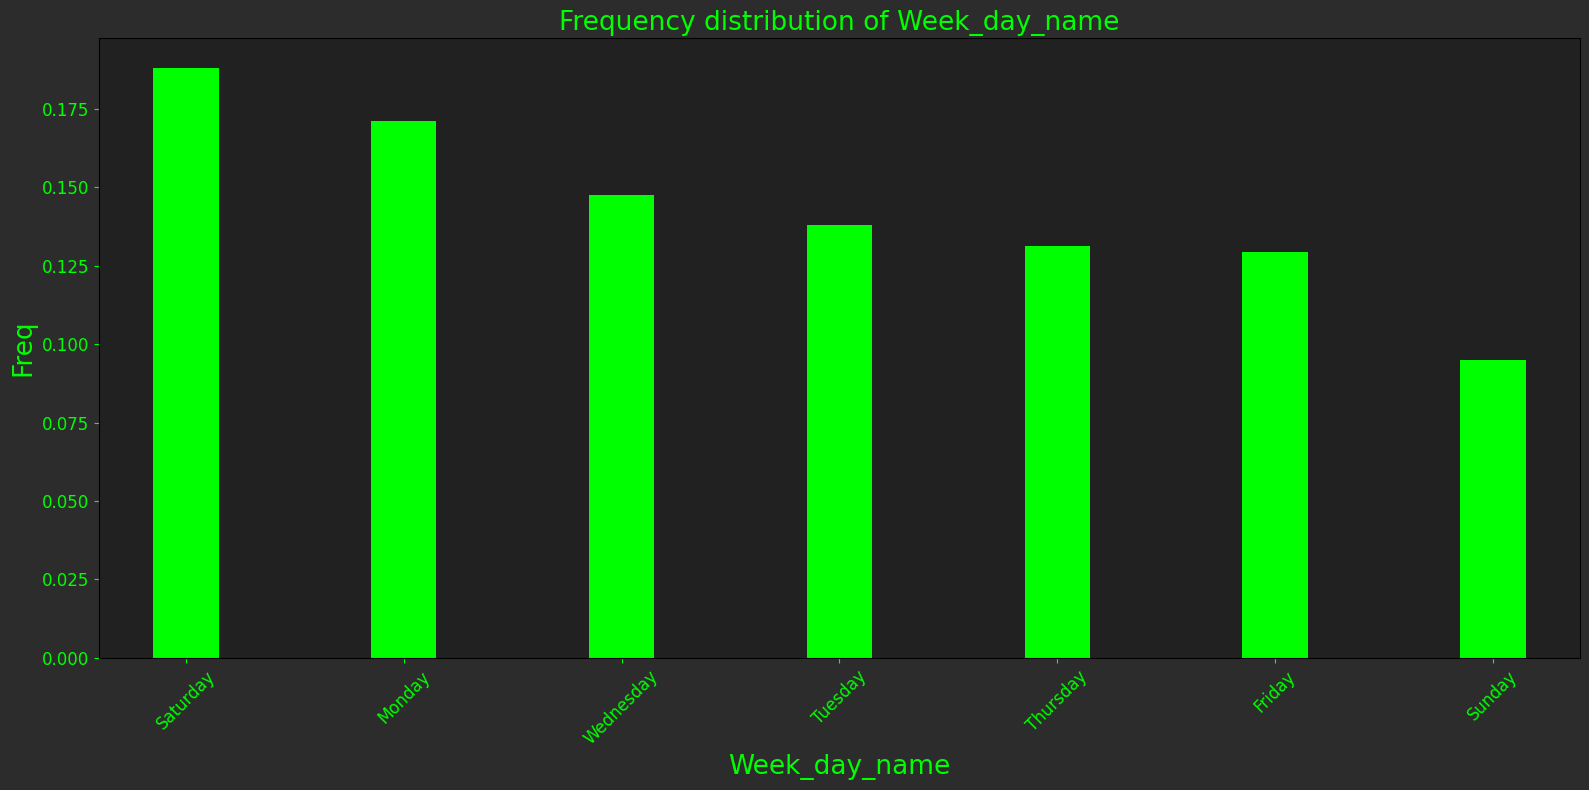

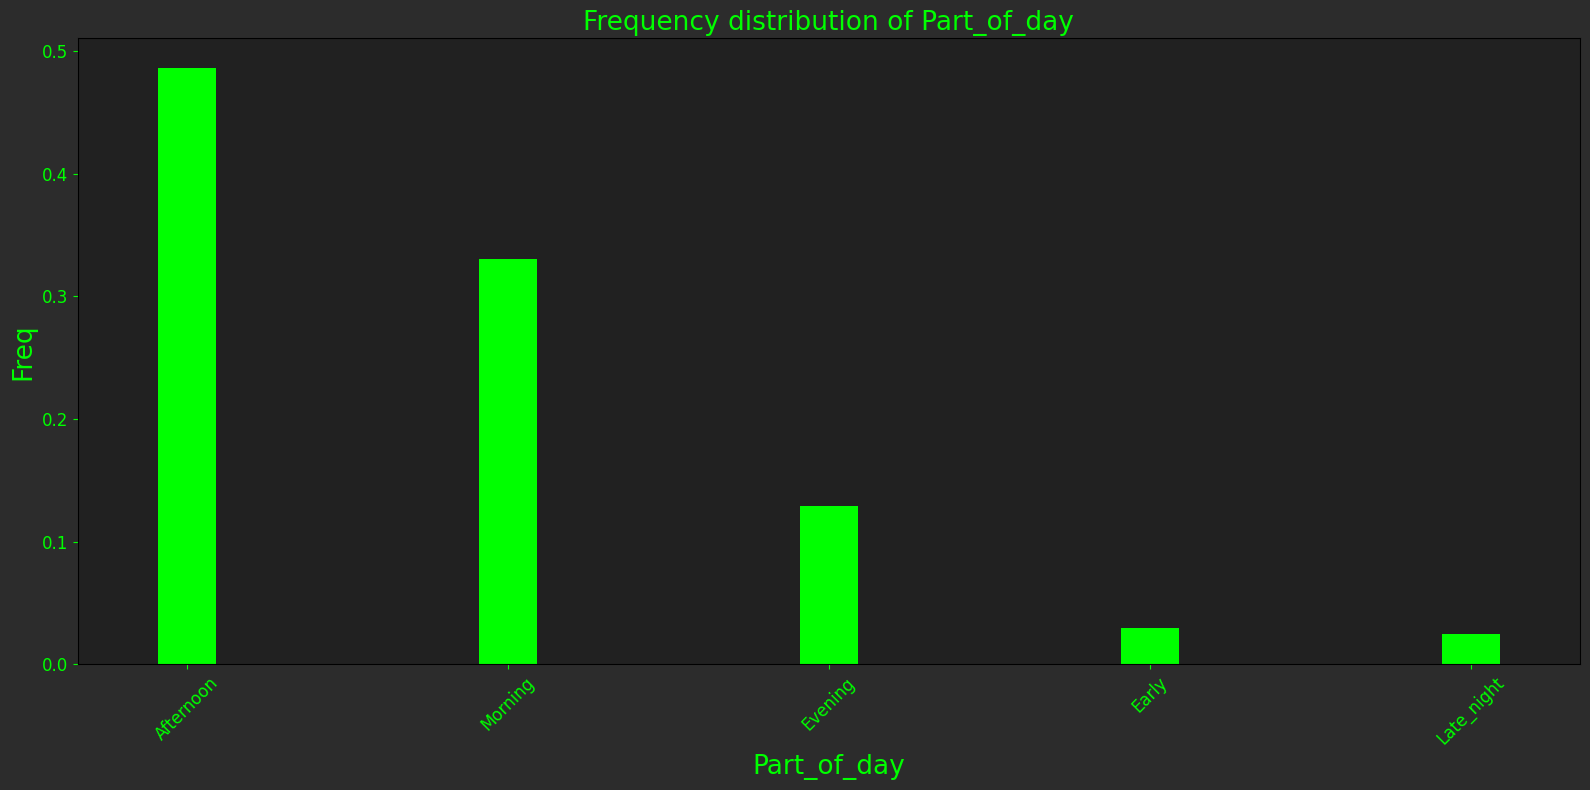

In [40]:

for var in cat_feats:
    fig,ax = plt.subplots(figsize=(16,8))
    fig.patch.set_facecolor('#212121')
    fig.patch.set_alpha(0.95)

    ax.patch.set_facecolor('#212121')
    ax.patch.set_alpha(1.0)
    ax.yaxis.label.set_color('lime')
    ax.yaxis.label.set_size(19)
    ax.xaxis.label.set_color('lime')
    ax.xaxis.label.set_size(19)
    ax.title.set_color('lime')
    ax.tick_params(colors='lime', which='both')
   
    if var == "Venue":
        fig = raw0[var].value_counts(normalize=True).plot(kind='bar',color='lime')
        fig.set_ylabel('Freq')
        fig.set_title(f'Frequency distribution of {var}', fontsize=19)
        fig.set_xlabel(var)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()

        plt.show()
        
    elif var == "Payment_Type":
        
        width_=0.15
        
        fig = raw0[var].value_counts(normalize=True).plot(kind='bar',color='lime', width=width_)
        fig.set_ylabel('Freq')
        fig.set_title(f'Frequency distribution of {var}', fontsize=19)
        fig.set_xlabel(var)

        plt.xticks(fontsize=12, rotation=45)
        plt.yticks(fontsize=12)
        plt.tight_layout()

        plt.show()
     
    elif var == "Part_of_day":
        
        width_=0.18
        
        fig = raw0[var].value_counts(normalize=True).plot(kind='bar',color='lime', width=width_)
        fig.set_ylabel('Freq')
        fig.set_title(f'Frequency distribution of {var}', fontsize=19)
        fig.set_xlabel(var)

        plt.xticks(fontsize=12, rotation=45)
        plt.yticks(fontsize=12)
        plt.tight_layout()

        plt.show()
    
    else:
        width_=0.3
        fig = raw0[var].value_counts(normalize=True).plot(kind='bar',color='lime', width=width_)
        fig.set_ylabel('Freq')
        fig.set_title(f'Frequency distribution of {var}', fontsize=19)
        fig.set_xlabel(var)

        plt.xticks(fontsize=12, rotation=45)
        plt.yticks(fontsize=12)
        plt.tight_layout()

        plt.show()

<p>
The distributions above illustrate that<br>The most popular shopping venues are: 
<ul>
<li>Aldi: 27.7%</li>
<li>Asda: 12.3%</li>
<li>Sainsburys: 9.1%</li>
<li>Yours supermarket: 7.0%</li>
<li>Tesco: 4.5%</li>
</ul>
    
The most popular Payment types are:
<ul>
<li>Card: 92.6%</li>
<li>Cash: 7.1%</li>
<li>Plan: 0.3%</li>
</ul>

The most popular payment methods are:
<ul>
<li>Contactless: 73.65%</li>
<li>DD (Direct debit): 8.9%</li>
<li>0 (cash + plan): 7.4%</li>
<li>DB (debit): 5.7%</li>
<li>Pin: 4.2%</li>
<li>Transfer: 0.1%</li>
</ul>

The most popular shopping days are:
<ul>
<li>Saturday: 18.47%</li>
<li>Monday: 17.57%</li>
<li>Wednesday: 14.64%</li>
<li>Tuesday: 13.96%</li>
<li>Thursday: 13.40%</li>
<li>Friday: 13.18%</li>
<li>Sunday: 8.78%</li>
</ul>

The most popular shopping times are:

<ul>
<li>Afternoon: 49.55%</li>
<li>Morning: 32.66%</li>
<li>Evening: 12.16%</li>
<li>Early: 3.15%</li>
<li>Late_night: 2.48%</li>
</ul>
</p>


<h3 style="color: green;">Explore the relationship between the target, Expenditure_per_wk, and categorical features</h3>

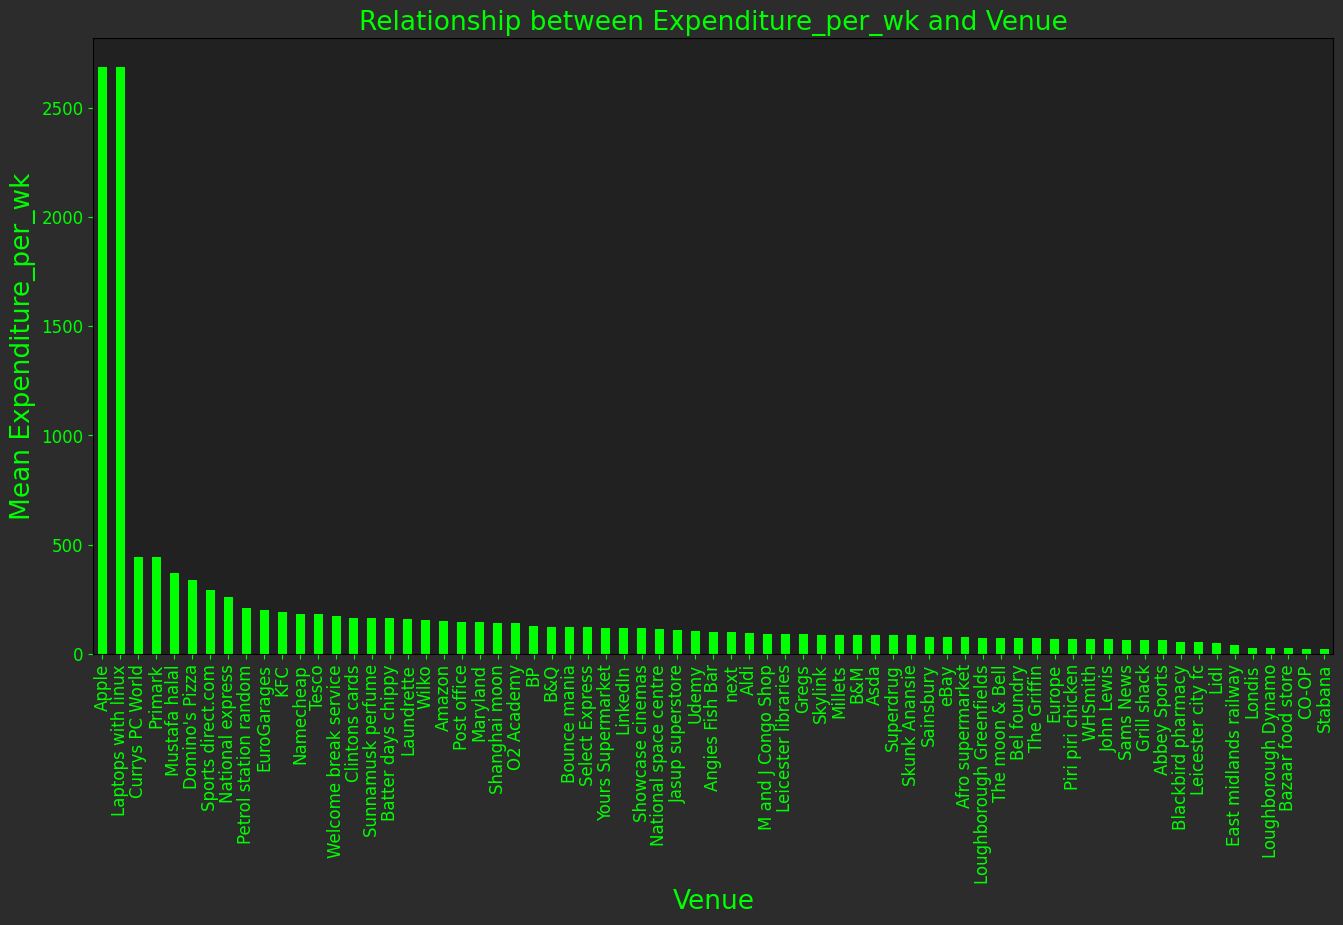

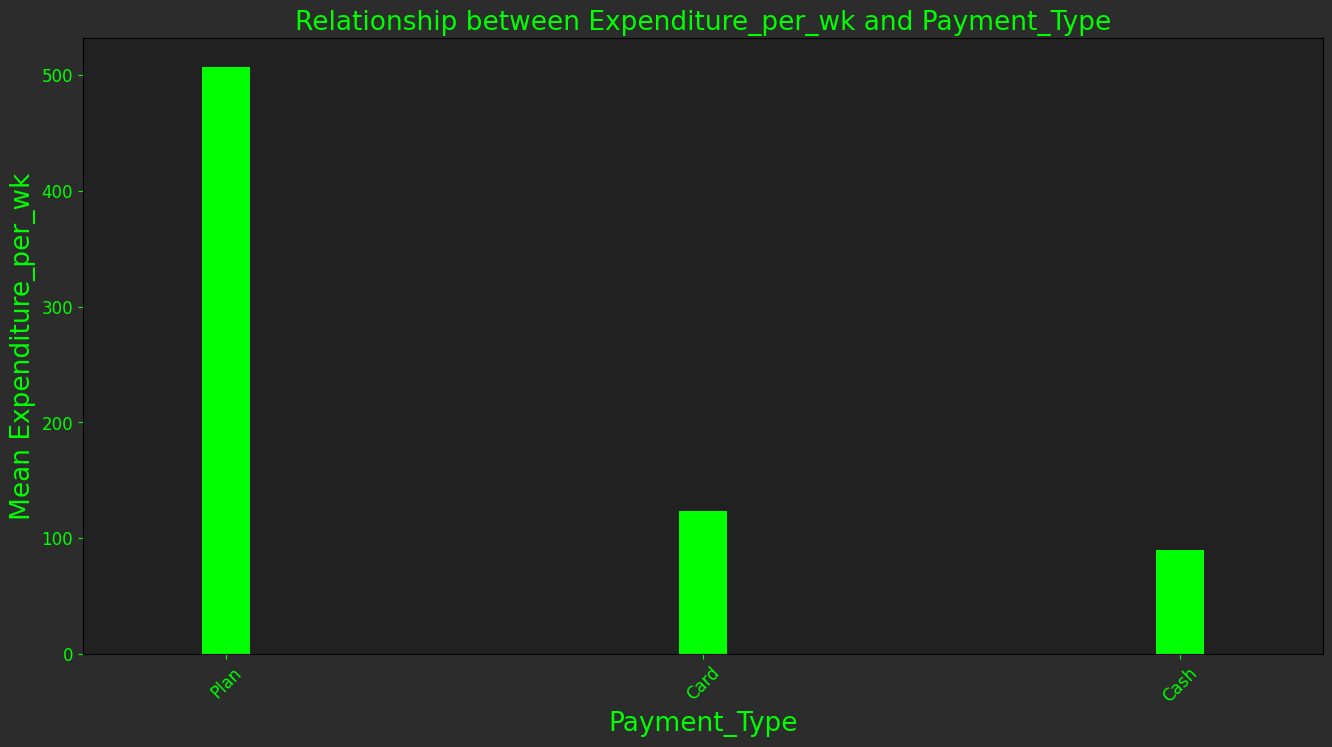

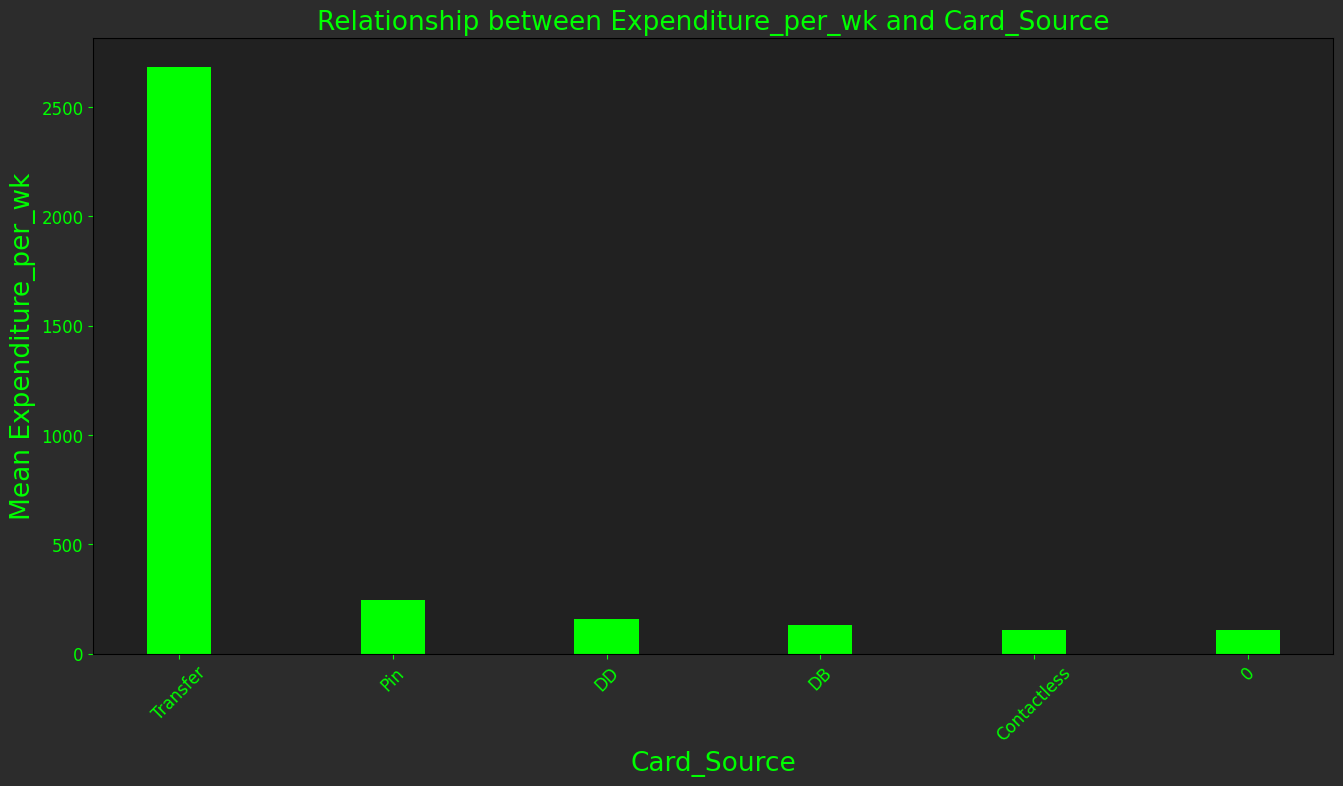

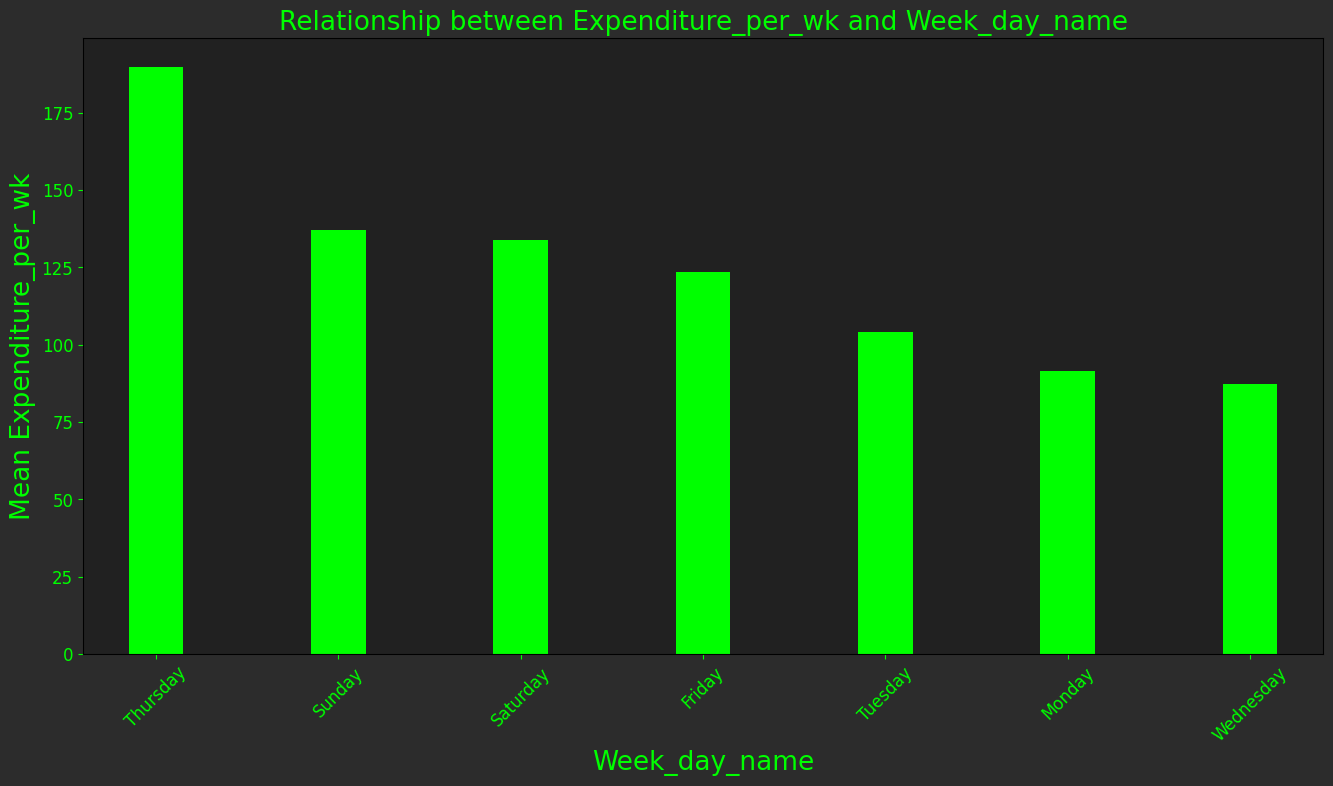

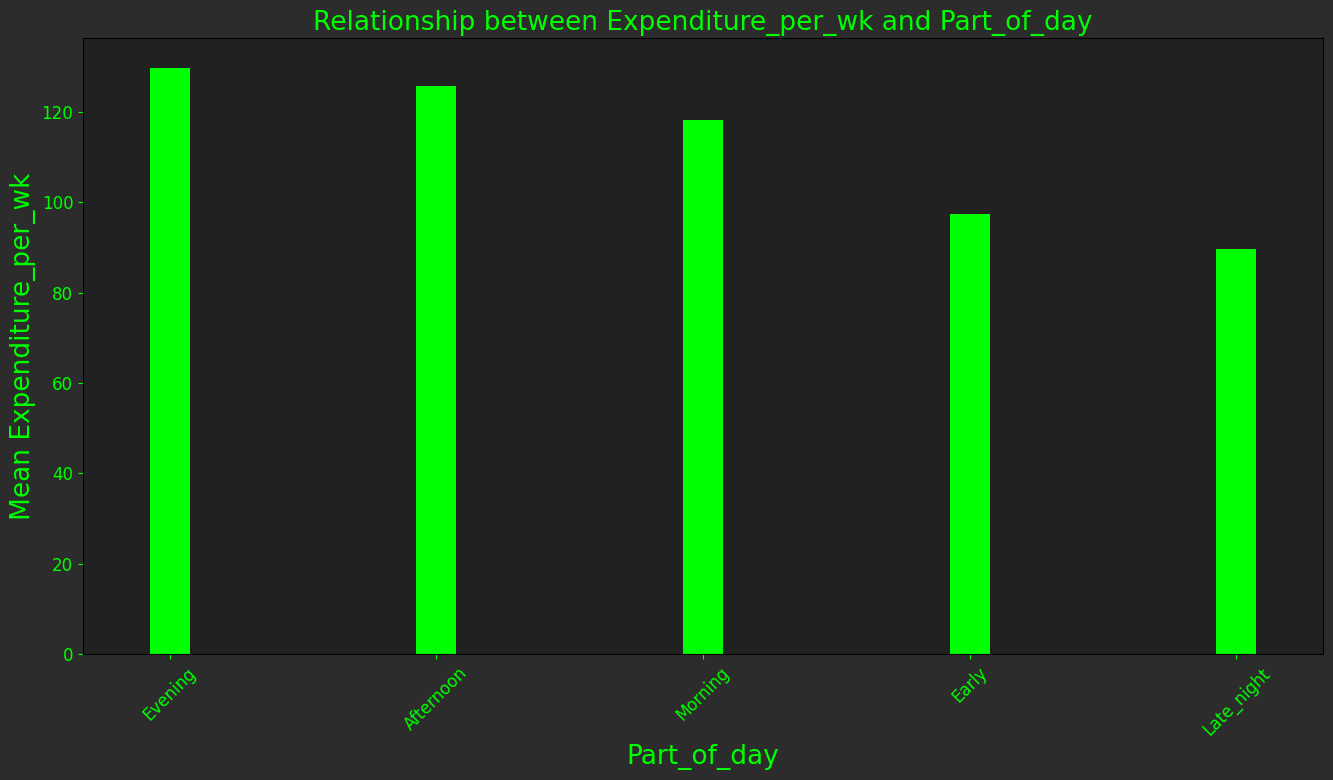

In [41]:
# This returns a mean value for each attribute of the categorical feature in question.

for var in cat_feats:
    fig,ax = plt.subplots(figsize=(16,8))
    fig.patch.set_facecolor('#212121')
    fig.patch.set_alpha(0.95)

    ax.patch.set_facecolor('#212121')
    ax.patch.set_alpha(1.0)
    ax.yaxis.label.set_color('lime')
    ax.yaxis.label.set_size(19)
    ax.xaxis.label.set_color('lime')
    ax.xaxis.label.set_size(19)
    ax.title.set_color('lime')
    ax.tick_params(colors='lime', which='both')
    
    if var == "Venue":
        fig = raw0.Expenditure_per_wk.groupby(raw0[var]).mean().sort_values(ascending=False).plot(kind='bar',color='lime')
        fig.set_ylabel("Mean Expenditure_per_wk")

        plt.xticks(rotation=90, fontsize=12)
        plt.yticks(fontsize=12)
        plt.title("Relationship between Expenditure_per_wk and {}".format(var), fontsize=19)
        plt.show()
    elif var == "Payment_Type":
        width_=0.1
        fig = raw0.Expenditure_per_wk.groupby(raw0[var]).mean().sort_values(ascending=False).plot(kind='bar',color='lime', width=width_)
        fig.set_ylabel("Mean Expenditure_per_wk")

        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.title("Relationship between Expenditure_per_wk and {}".format(var), fontsize=19)
        plt.show()

    elif var == "Part_of_day":
        width_=0.15
        fig = raw0.Expenditure_per_wk.groupby(raw0[var]).mean().sort_values(ascending=False).plot(kind='bar',color='lime', width=width_)
        fig.set_ylabel("Mean Expenditure_per_wk")

        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.title("Relationship between Expenditure_per_wk and {}".format(var), fontsize=19)
        plt.show()

    else:
        width_=0.3
        fig = raw0.Expenditure_per_wk.groupby(raw0[var]).mean().sort_values(ascending=False).plot(kind='bar',color='lime', width=width_)
        fig.set_ylabel("Mean Expenditure_per_wk")

        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.title("Relationship between Expenditure_per_wk and {}".format(var), fontsize=19)
        plt.show()

<p>
Note the above plots are not the most effective method to visualize the relationship between the target and<br>
categorical features as the mean depends on the frequencies e.g. the feature Payment_Type has only one<br> observation for Transfer, a large sum which distorts the relationship using the mean.<br>
Thus these mean values do not represent a reliable method of determining the relationship between the target and the categorical features.<br>It is better to use frequency distributions and boxplots as they account for the volumes.
</p>

<h3 style="color: green;">Expenditure_per_wk vs Venue</h3>

In [42]:
# Obtaining summary of Expenditure_per_wk by Venue using pivot tables
# Note: this is not a correct calculation of expenditure per week by venue
# this is simply a summary by Venue of Expenditure_per_wk 
venue_vs_exp_per_week = pd.pivot_table(
    data=raw0,
    index='Venue',
    values='Expenditure_per_wk',
    aggfunc='sum'
)

venue_vs_exp_per_week.sort_values(by=['Expenditure_per_wk'], ascending=False, inplace=True)

In [43]:
# Restricting to the top 19 venues for boxplot comparisons
venue_vs_exp_per_week[:19]

Expenditure_per_wk
Venue                                 
Aldi                          23960.72
Asda                           9774.34
Tesco                          8052.54
Yours Supermarket              7684.25
Sainsbury                      6930.36
Wilko                          5629.53
Udemy                          4188.75
Sports direct.com              4109.25
Primark                        3567.55
Maryland                       3357.56
B&Q                            3279.30
Amazon                         3173.66
Currys PC World                3124.65
Laptops with linux             2683.72
Apple                          2683.72
Afro supermarket               2281.46
Domino's Pizza                 2042.52
BP                             1551.06
eBay                           1348.56

In [44]:
venues = ['Aldi', 'Asda', 'Yours Supermarket','Sainsbury', 'Tesco', 'Wilko', 'Udemy',
           'Sports direct.com', 'Primark','B&Q','Currys PC World','Apple','Laptops with linux',
           'Afro supermarket', 'Amazon','Maryland',"Domino's Pizza","BP","eBay"
         ]

<p>
<b>Note, the data used below is not the same as venue_vs_exp_per_week:</b> <b style="color: red;">Below the data is the distribution of<br> expenditure per week associated with a specific Venue i.e. in the week in question I shopped at the Venue</b>
</p>

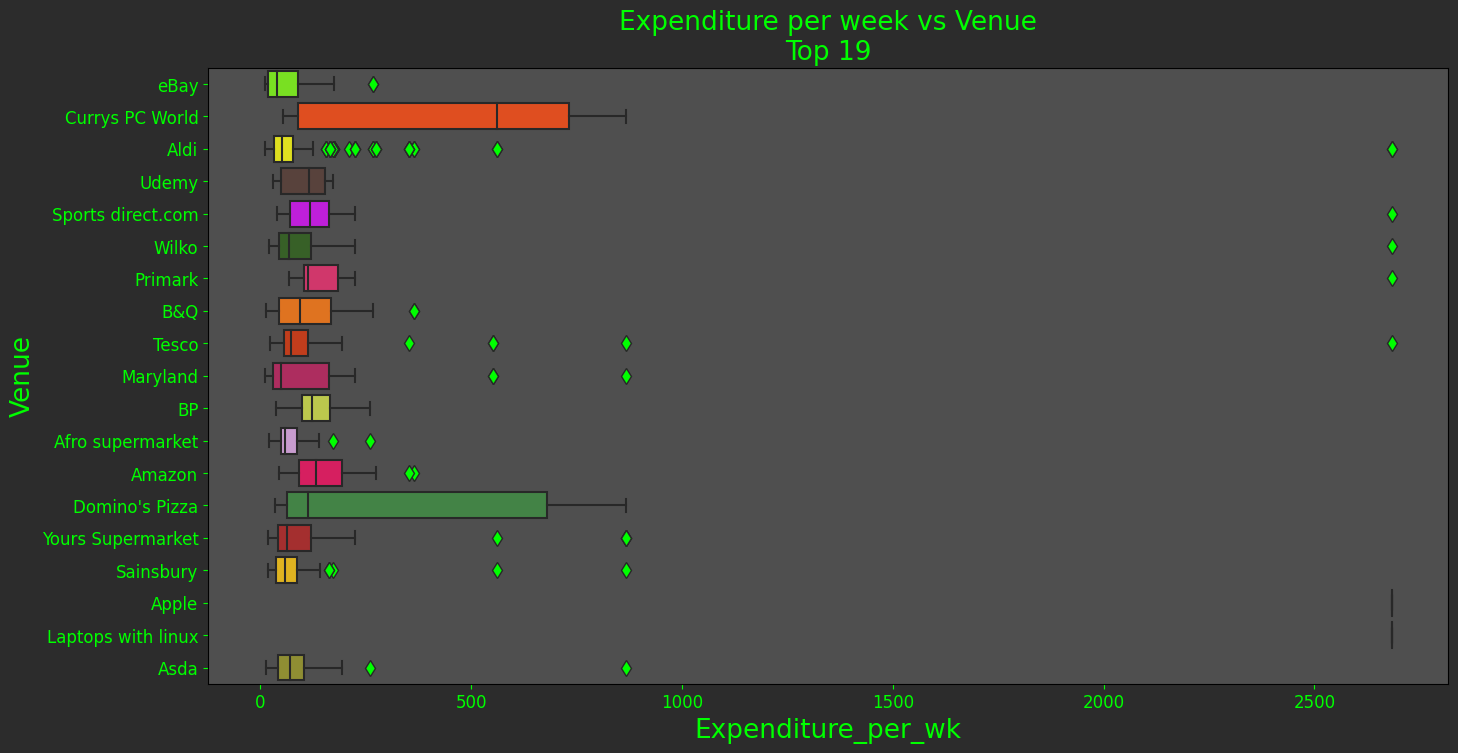

In [45]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)
ax.patch.set_facecolor('#4F4F4F')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Flierprops = dict(markerfacecolor='lime', markersize=8, linestyle='none')

sb.boxplot(data=raw0.query("Venue in {0}".format(venues)),
           x='Expenditure_per_wk', 
           y='Venue',
           flierprops=Flierprops
          )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Expenditure per week vs Venue\nTop 19", fontsize=19)
plt.show()

<p style="color: black;">
The boxplots should be considered as the distribution of associated Expenditure_per_wk by each venue.<br>
This explains why the same outliers values are observed at venues such as Aldi, Udemy, Primark etc:<br>
These outliers are originating from high expenditure at Apple and Laptops with linux, both are single large expense.<br> Similarly, there are other outlier expenditures originating from Currys PC World that have the same effect.
</p>

<p>
The boxplot above illustrates the distribution of Expenditure_per_wk by Venue. Note, this is not a summary of<br> the expenditure at the venue in the week in question but rather the overall expenditure in that week accounting for<br> the venues visited, in that week.
</p>

<p>
Mostly, the interquartile ranges are relatively narrow i.e. the majority of the Expenditure per week are less<br>
than £250. Currys PC World and Domino's Pizza have larger interquartile ranges; in the case of PC World there<br>
is a few low expenditures as the median is quite high; Domino's pizza is the opposite with lots of low<br> expenditures, hence the low median, and a few higher expenditures widening the interquartile range, such <br>
values are definitely the outliers from purchases at other venues as the maximum spent at domino's in any one<br>
week is £80.
</p>

<h3 style="color: green;">Expenditure_per_wk vs Payment_Type</h3>

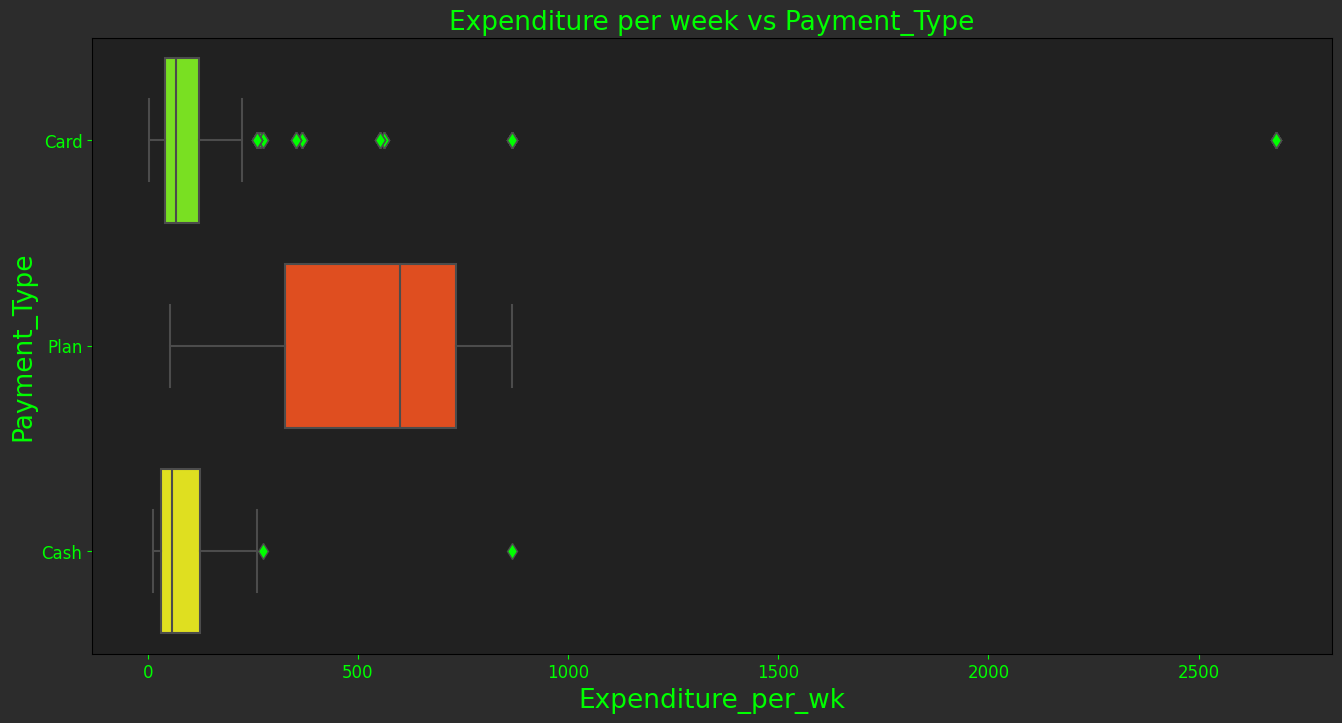

In [46]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Flierprops = dict(markerfacecolor='lime', markersize=8, linestyle='none')

sb.boxplot(data=raw0,
           x='Expenditure_per_wk', 
           y='Payment_Type',
           flierprops=Flierprops
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Expenditure per week vs Payment_Type", fontsize=19)
plt.show()

<p>
The boxplots above show that Card and Cash payment types have similar distributions, low dispersion with low<br> expenditure transactions dominating the transactions.<br><br>
Plan has greater dispersion and relatively higher expenditures, hence the right skew with no outliers.<br><br>
<strong>To summarize:</strong> The expenditures with card and cash are small with the occasional big spend<br>
while expenditures with Plan are larger expenditures with the occasional small expenditure.
</p>

<h3 style="color: green;">Expenditure_per_wk vs Card_Source</h3>

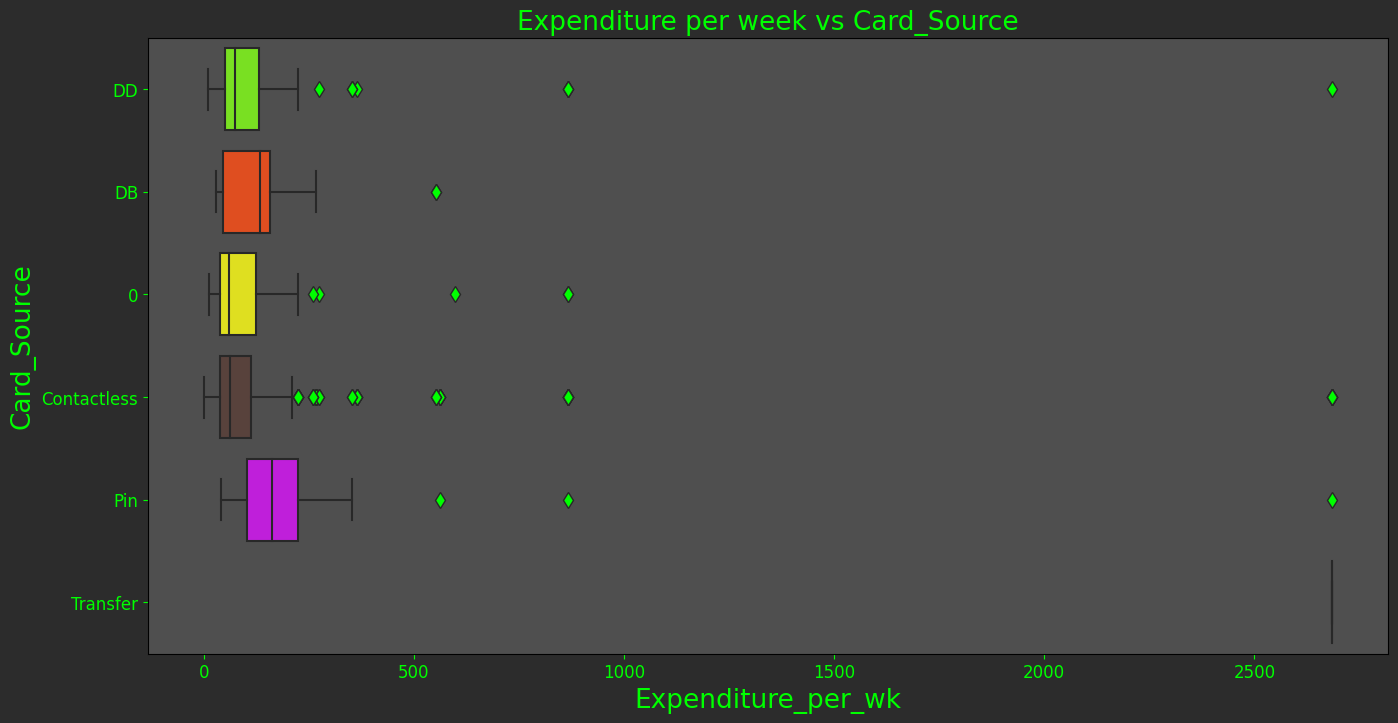

In [47]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#4F4F4F')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Flierprops = dict(markerfacecolor='lime', markersize=8, linestyle='none')

sb.boxplot(data=raw0,
           x='Expenditure_per_wk', 
           y='Card_Source',
           flierprops=Flierprops
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Expenditure per week vs Card_Source", fontsize=19)

plt.show()

<p>
The boxplots above show that the majority of the Card_Source have very similar dispersion for Expenditure_per_wk <br> with low expenditure per week and the outliers originate from Transfer and Pin CardSource,<br>
these are the payment to Laptops with linux, and PC World.
Note, Pin has a slightly higher dispersion, this is because higher expenditures on a card require chip and pin<br>
where as contactless only take small payments up to about £45.
</p>

<h3 style="color: green;">Expenditure_per_wk vs Week_day_name</h3>

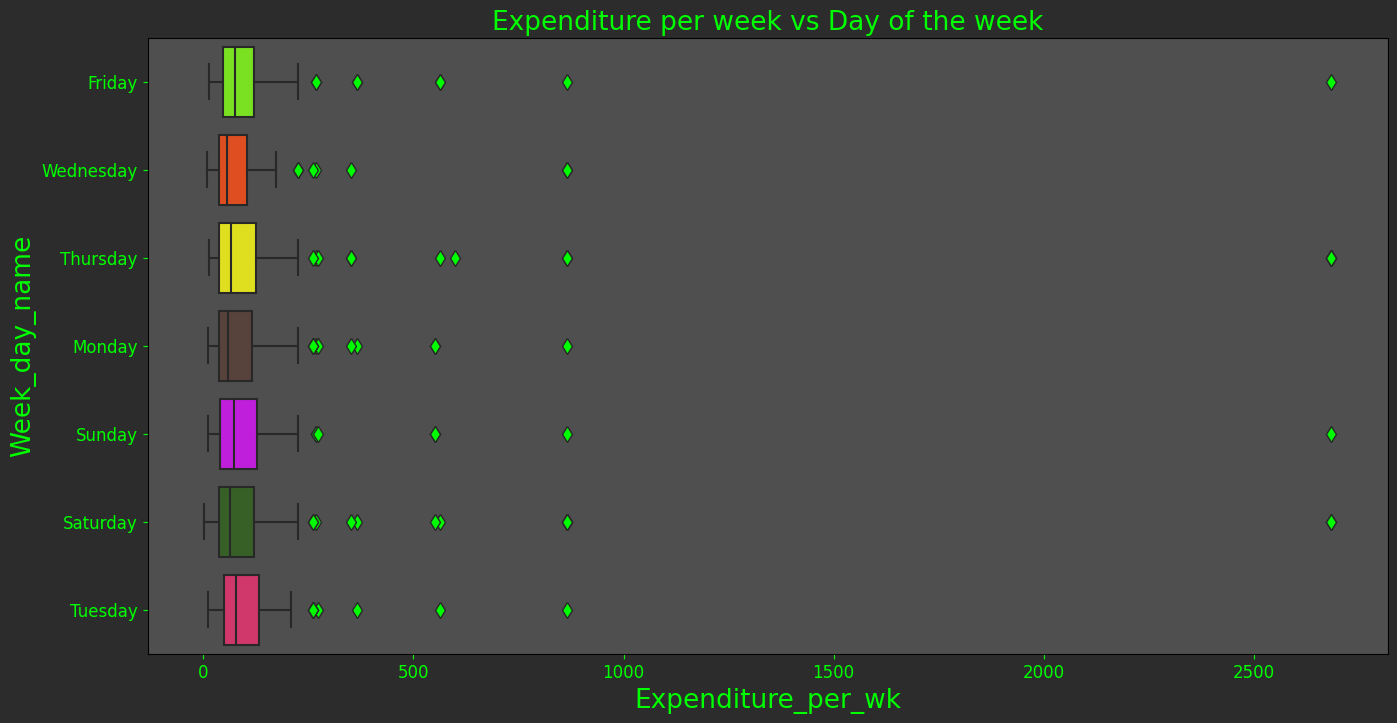

In [48]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#4F4F4F')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Flierprops = dict(markerfacecolor='lime', markersize=8, linestyle='none')

sb.boxplot(data=raw0,
           x='Expenditure_per_wk', 
           y='Week_day_name',
           flierprops=Flierprops
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Expenditure per week vs Day of the week", fontsize=19)

plt.show()

<p>
The boxplots above show an approximately equal dispersion of Expenditure_per_wk across weekdays.<br>
    
The outlier presence indicates that on the week that the outlier fell on, I shopped on each of the days that the outlier is present.
</p>

<h3 style="color: green;">Expenditure_per_wk vs Part_of_day</h3>

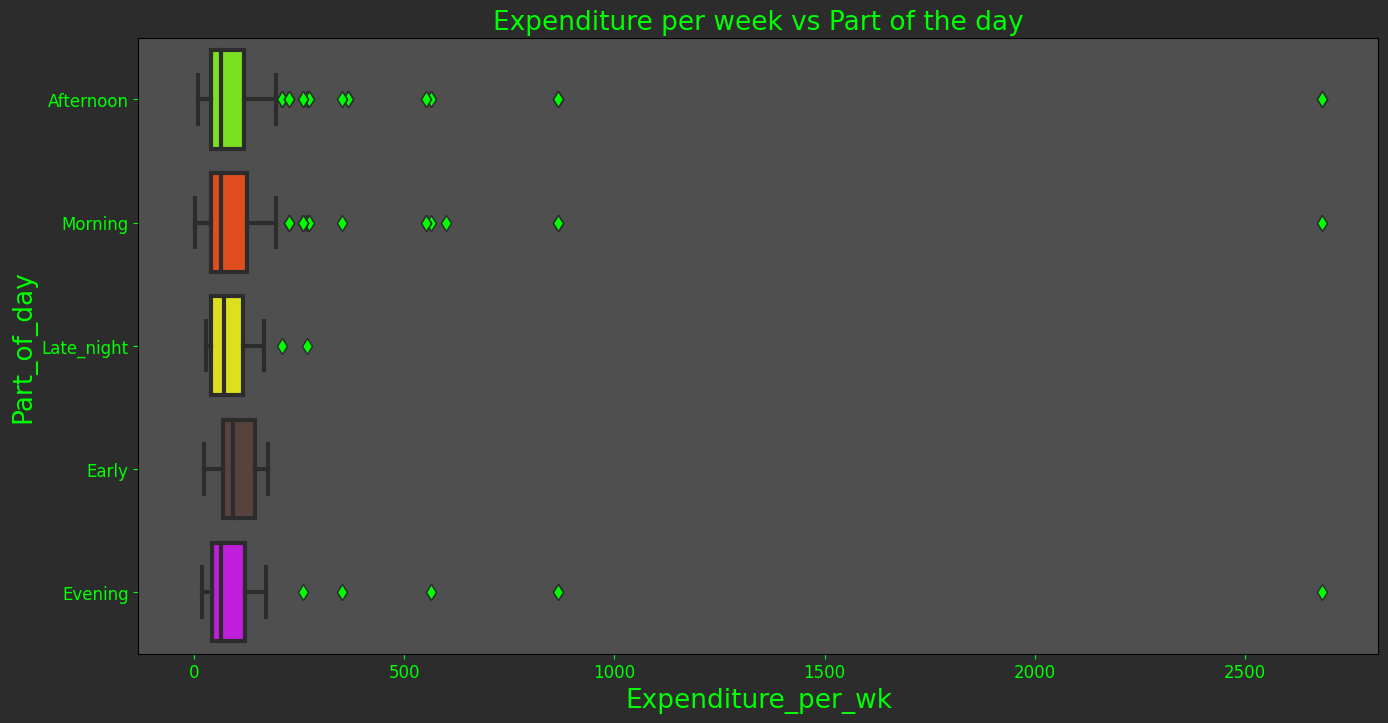

In [49]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax.patch.set_facecolor('#4F4F4F')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Flierprops = dict(markerfacecolor='lime', markersize=8, linestyle='none')

sb.boxplot(data=raw0,
           x='Expenditure_per_wk', 
           y='Part_of_day',
           flierprops=Flierprops,
           whis=1,
           linewidth=3
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Expenditure per week vs Part of the day", fontsize=19)
plt.show()

<p>
The boxplots above show, visually, an approximately equal dispersion of Expenditure_per_wk across different parts of the day.<br>
However, Evening has extremely low median i.e. 50% smaller Expenditure_per_wk while the other 50% are spread over a larger range.<br> Note, other parts of the day exhibit the same dispersion characteristics but to a lesser extent.
</p>

<h1 style="color: green;">Summary of EDA</h1>

<p>
The target, Expenditure_per_wk, and Total_Price have outliers. These outliers will be capped at reasonable values to ensure regular expenditures are included disregarding their classification as outliers.<br>


The majority of numeric features exhibit a right skewed distribution with a dominant value of 0.<br>
In considering boosting the effieciency and speed in training, these features will be descritized.<br>
This will result in shallower trees speeding up the algorithm.<br>

With respect to outliers, other than features derived from Total_Price, the majority of the features<br>
are dominated by 0, hence the effect of 0 on statistical measures is greater than the effect of values<br>
farther from 0 i.e. the real outlier is the value 0.<br>
<b style="color: green;">If this is not clear to you, please ask and I will explain :)</b>


<b>AVG_exp_item_per_wk</b> has a really strong correlation with the target so it is suspicious	
It maybe a good idea to drop this feature. This feature is the mean expenditure for the product type for the week in question.





</p>